<a href="https://colab.research.google.com/github/YoyoSoliman/CMST-project-website/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Final Project
##Name: Yehia (Yoyo) Soliman
##Email: yoyo.soliman@bellevuecollege.edu

#Introduction

###Problem Statement
Credit card fraud is a huge problem that costs people and banks billions of dollars every year. The challenge I'm tackling is figuring out whether a credit card transaction is real or fraudulent. What makes this tricky is that fraudsters are getting smarter - they try to make their fake transactions look like normal purchases, so it's hard to spot the difference. We need a reliable way to catch these fraudulent transactions before they cause damage.

###Objective & Modeling Approach
My main goal is to build a machine learning model that can correctly predict if a credit card transaction is legitimate or fraudulent. This is a classification problem since I'm sorting transactions into two categories: normal or fraudulent(abnormal). I'm using supervised learning for this project because I have a dataset where transactions are already labeled as either real or fake. This means my model can learn from these examples.

###Data Source
I'm using a dataset called "SecurePay: Credit Card Fraud Detection Data" that was uploaded to Kaggle by a user named ESHUM_MALIK. To access it, I mounted the dataset to my Google Colab notebook, which made it easy to load and work with the data directly in my code. The dataset contains credit card transaction records with various features, but due to privacy concerns, most of the features are anonymized since this is sensitive financial data. The only features we can actually identify are the transaction time and amount. Everything else is hidden for security reasons. Each transaction also comes with a label telling us whether it was fraudulent or legitimate.

###Relevance of Problem
Banks handle millions of transactions daily and obviously can't check each one. Even if they could, it would be hard for the human eye to spot what's fraudulent and what's legitimate. This is why ML models are best for problems like these. Companies want to catch fraudulent transactions because ML catches fraud before major damage occurs, saving banks and customers millions. It approves or blocks transactions in milliseconds while you're standing at checkout, making it convenient for users and strengthening the connection between banks and customers while keeping everything safe and secure.

In [ ]:
pip install pandas numpy tabulate matplotlib

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CS310/Project 1/creditcard.csv")
mini_df = df.head(20)


In [ ]:
mini_df

Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
13  11.0  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
14  12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
15  12.0 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
16  12.0  1.103215 -0.040296  1.267332  1.289091 -0.735997  0.288069   
17  13.0 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
18  14.0 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
19  15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0   0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1  -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2   0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3   0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4   0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
5   0.476201  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
7   1.120631 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709   
8   0.370145  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592   
9   0.651583  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050   
10 -1.423236  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512   
11  0.470455  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710   
12 -0.689405 -0.227487 -2.094011  ... -0.231809 -0.483285  0.084668  0.392831   
13 -0.096717  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744   
14 -0.422911 -1.907107  0.755713  ...  1.151663  0.222182  1.020586  0.028317   
15 -0.608581  0.003603 -0.436167  ...  0.499625  1.353650 -0.256573 -0.065084   
16 -0.586057  0.189380  0.782333  ... -0.024612  0.196002  0.013802  0.103758   
17  0.707642  0.087962 -0.665271  ... -0.194796 -0.672638 -0.156858 -0.888386   
18 -1.559738  0.160842  1.233090  ... -0.503600  0.984460  2.458589  0.042119   
19 -1.080664 -0.053127 -1.978682  ... -0.177650 -0.175074  0.040002  0.295814   

         V25       V26       V27       V28  Amount  Class  
0   0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1   0.167170  0.125895 -0.008983  0.014724    2.69      0  
2  -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3   0.647376 -0.221929  0.062723  0.061458  123.50      0  
4  -0.206010  0.502292  0.219422  0.215153   69.99      0  
5  -0.232794  0.105915  0.253844  0.081080    3.67      0  
6   0.750137 -0.257237  0.034507  0.005168    4.99      0  
7  -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
8   0.373205 -0.384157  0.011747  0.142404   93.20      0  
9  -0.069733  0.094199  0.246219  0.083076    3.68      0  
10  0.251367 -0.129478  0.042850  0.016253    7.80      0  
11 -0.767315 -0.492208  0.042472 -0.054337    9.99      0  
12  0.161

#Descriptive Data Analysis (EDA)


In [ ]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


As shown above, there are no null values in this dataset. Additionally, it has a usability score of 10.0 on Kaggle, which means the data is already very clean. As for outliers, removing them wouldn't make sense in this context since they may actually be indicators of fraudulent transactions. Unusual patterns or extreme values could be exactly what we're looking for to identify abnormal activity.

In [ ]:
print(tabulate(mini_df, headers='keys', tablefmt='psql'))


+----+--------+-----------+------------+------------+------------+------------+------------+------------+-------------+-----------+------------+-----------+------------+------------+------------+------------+------------+-------------+------------+------------+------------+------------+------------+-------------+------------+------------+------------+------------+-------------+----------+---------+
|    |   Time |        V1 |         V2 |         V3 |         V4 |         V5 |         V6 |         V7 |          V8 |        V9 |        V10 |       V11 |        V12 |        V13 |        V14 |        V15 |        V16 |         V17 |        V18 |        V19 |        V20 |        V21 |        V22 |         V23 |        V24 |        V25 |        V26 |        V27 |         V28 |   Amount |   Class |
|----+--------+-----------+------------+------------+------------+------------+------------+------------+-------------+-----------+------------+-----------+------------+------------+------------+-

Above are the first 20 rows of the dataset. As you can see, the only features we can identify are Time (seconds elapsed) and Amount (the transaction amount). The "Class" column indicates whether each transaction was legitimate or fraudulent, with 0 meaning legitimate and 1 meaning fraudulent. The features V1 through V28 have been transformed using a method called Principal Component Analysis (PCA) to protect customer privacy and security.

The dataset contains primarily numerical features with one binary target variable. Time and Amount are continuous numerical variables in their raw form, while V1 through V28 are also continuous numerical but like stated before already been normalized through the PCA transformation process. Our target variable, Class, is binary and already in the perfect format (0/1) for classification tasks.


In [ ]:
def plot_distribution(df, col):
  plt.figure(figsize=(12, 2))

  # All points at y=0, colored by class
  colors = ['green' if c == 0 else 'red' for c in df['Class']]
  plt.scatter(df[col], [0]*len(df), c=colors, alpha=0.6, s=100)

  plt.xlabel(col + ' Value')
  plt.yticks([])  # Hide y-axis
  plt.title(col + ' Distribution (Green=Class 0, Red=Class 1)')
  plt.grid(True, axis='x', alpha=0.3)
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_distribution_by_class(df, col):
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

  # Separate by class
  class_0 = df[df['Class'] == 0][col]
  class_1 = df[df['Class'] == 1][col]

  # Top plot - Class 0
  ax1.hist(class_0, bins=30, color='green', alpha=0.7, edgecolor='black')
  ax1.set_ylabel('Count (Class 0)')
  ax1.set_title(col + ' Distribution by Class')
  ax1.grid(True, alpha=0.3)

  # Bottom plot - Class 1
  ax2.hist(class_1, bins=30, color='red', alpha=0.7, edgecolor='black')
  ax2.set_xlabel(col +' Value')
  ax2.set_ylabel('Count (Class 1)')
  ax2.grid(True, alpha=0.3)

  plt.tight_layout()
  plt.show()

Below you can see the distribution graphs I created for each feature in the dataset. I plotted these to understand how the values are spread out and whether there are any clear patterns that distinguish fraudulent transactions (Class 1, shown in red) from legitimate ones (Class 0, shown in green)

##Distribution Analysis

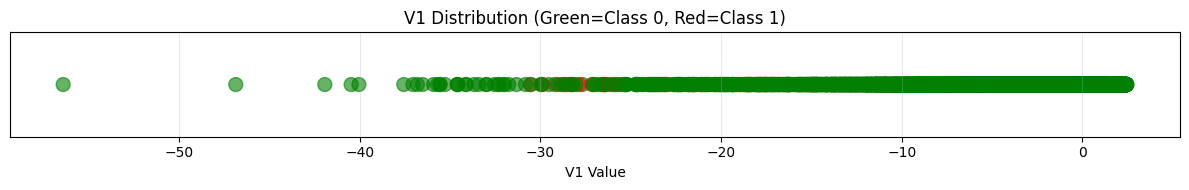

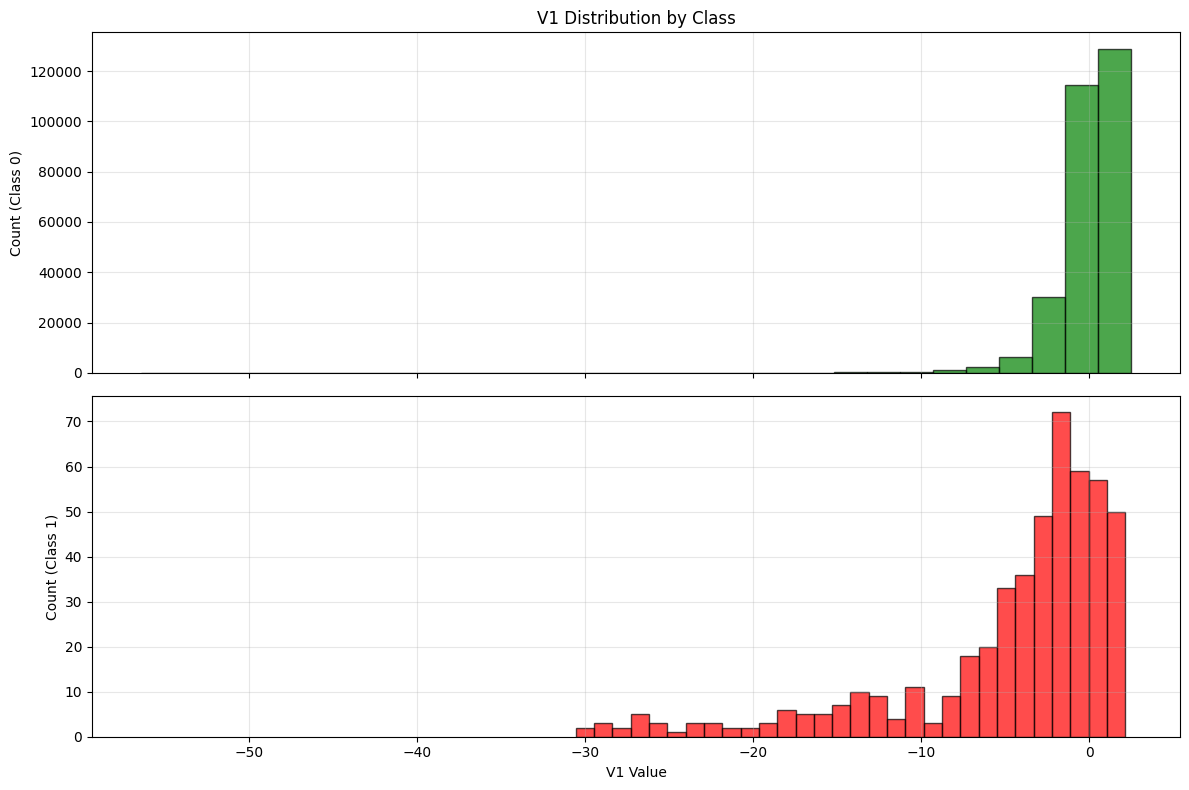

In [ ]:
plot_distribution(df, 'V1')
plot_distribution_by_class(df, 'V1')

For the V1 distribution, there's a clear pattern that emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples tightly clustered between V1 values of -5 to -10, indicating very consistent and predictable spending patterns. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V1 values from -35 to 0, suggesting that fraudulent activities exhibit more varied and unpredictable behaviors.

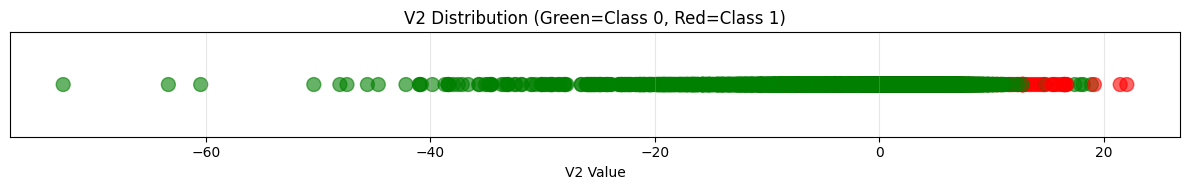

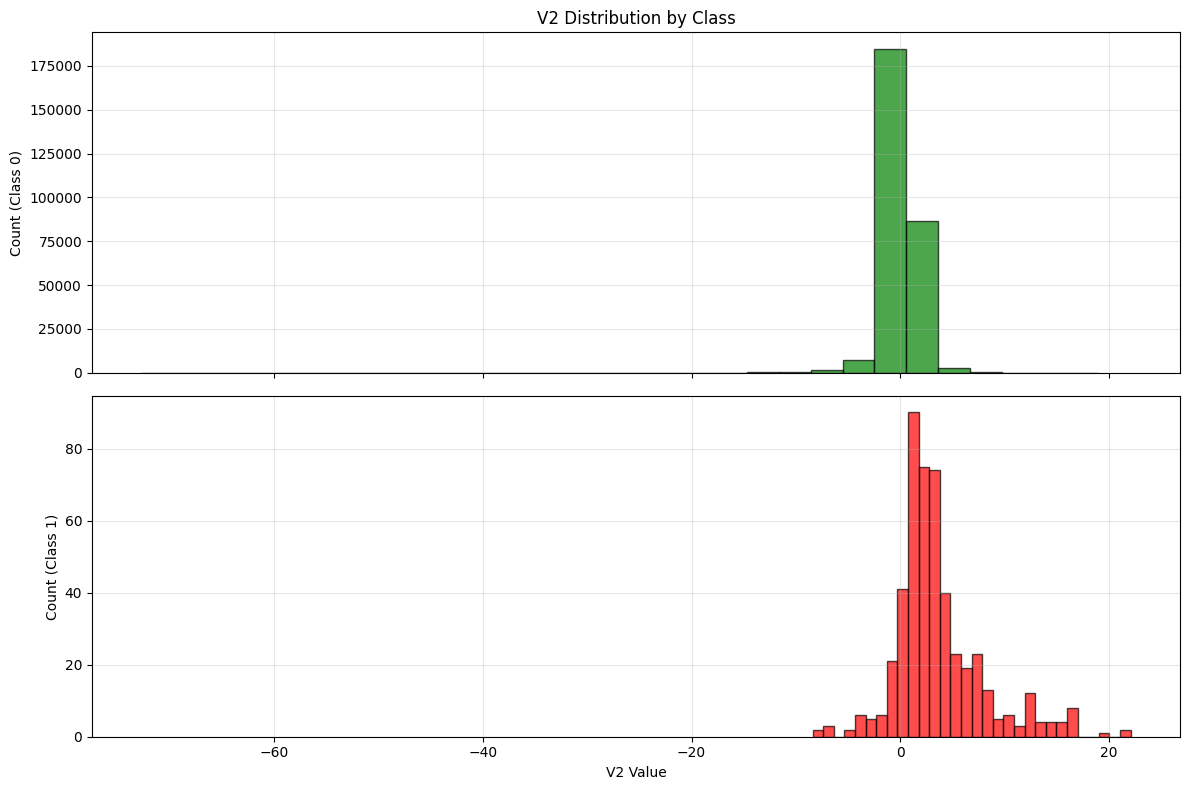

In [ ]:
plot_distribution(df, 'V2')
plot_distribution_by_class(df, 'V2')

For the V2 distribution, another clear pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples heavily concentrated around V2 = 0, forming a sharp peak that indicates highly consistent transaction behaviors in this feature space. In contrast, the roughly 500 fraudulent transactions (Class 1) are distributed more broadly across V2 values from -15 to +15, with their center around -2 to -5, suggesting that fraudulent activities continue to exhibit more varied and unpredictable patterns.

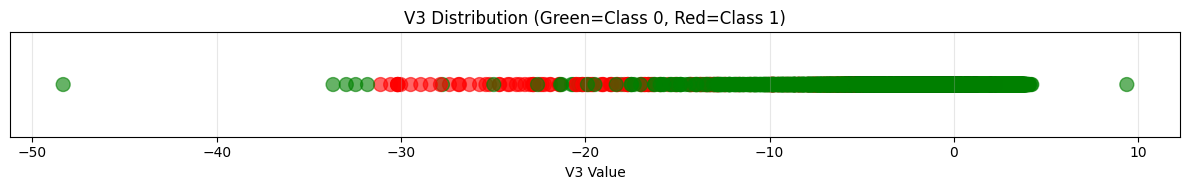

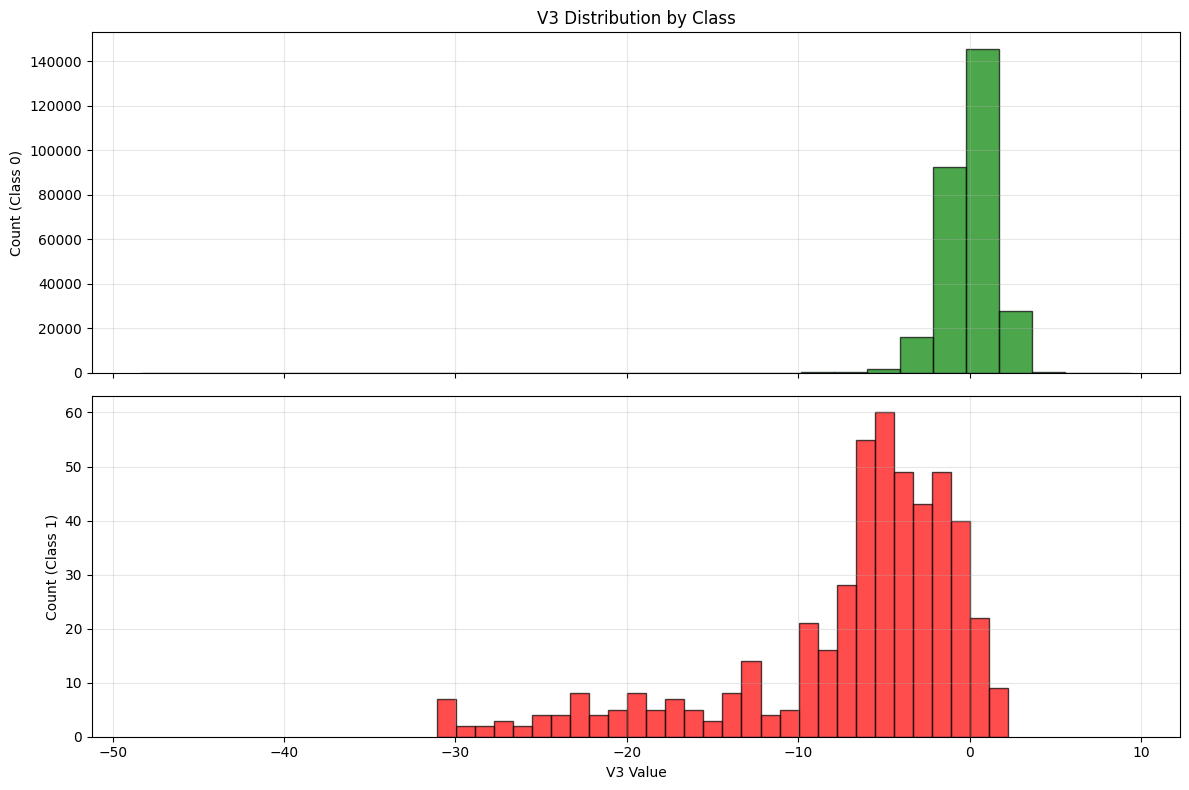

In [ ]:
plot_distribution(df, 'V3')
plot_distribution_by_class(df, 'V3')

For the V3 distribution, a distinct pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples tightly clustered between V3 values of -5 to 0, with the majority concentrated around -2, indicating consistent transaction behaviors in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V3 values from -35 to +5, with their peak around -5 to -10 but extending far into the negative range, suggesting that fraudulent activities exhibit significantly more varied and unpredictable patterns.

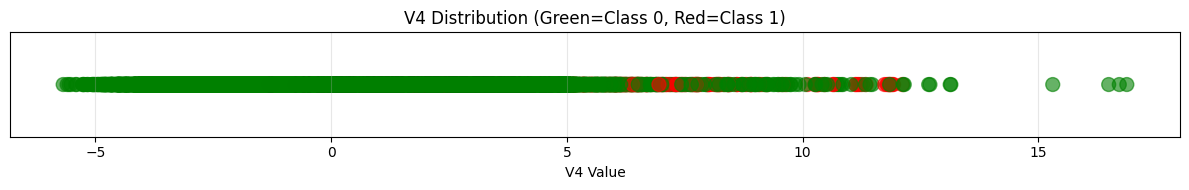

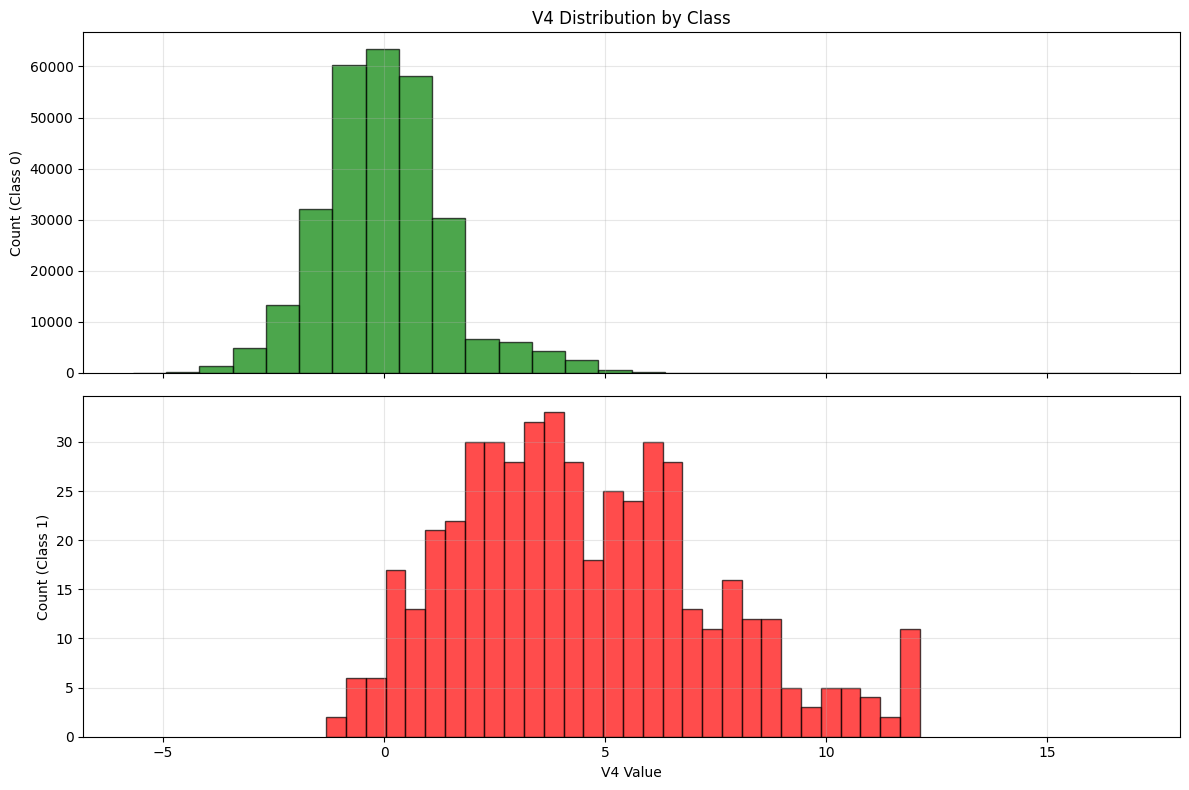

In [ ]:
plot_distribution(df, 'V4')
plot_distribution_by_class(df, 'V4')

For the V4 distribution, a notably different pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a more bell-shaped distribution centered around V4 = 0, with most values ranging from -2 to +4, indicating more variability in legitimate transactions for this feature compared to previous components.

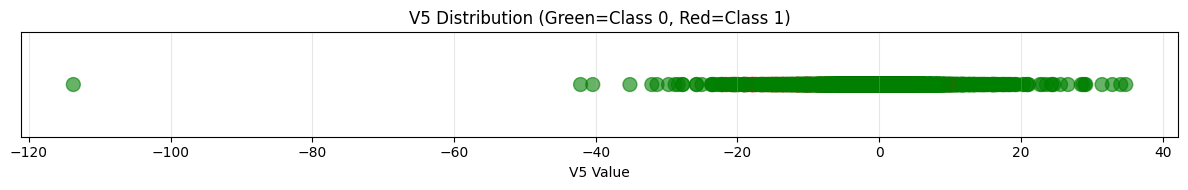

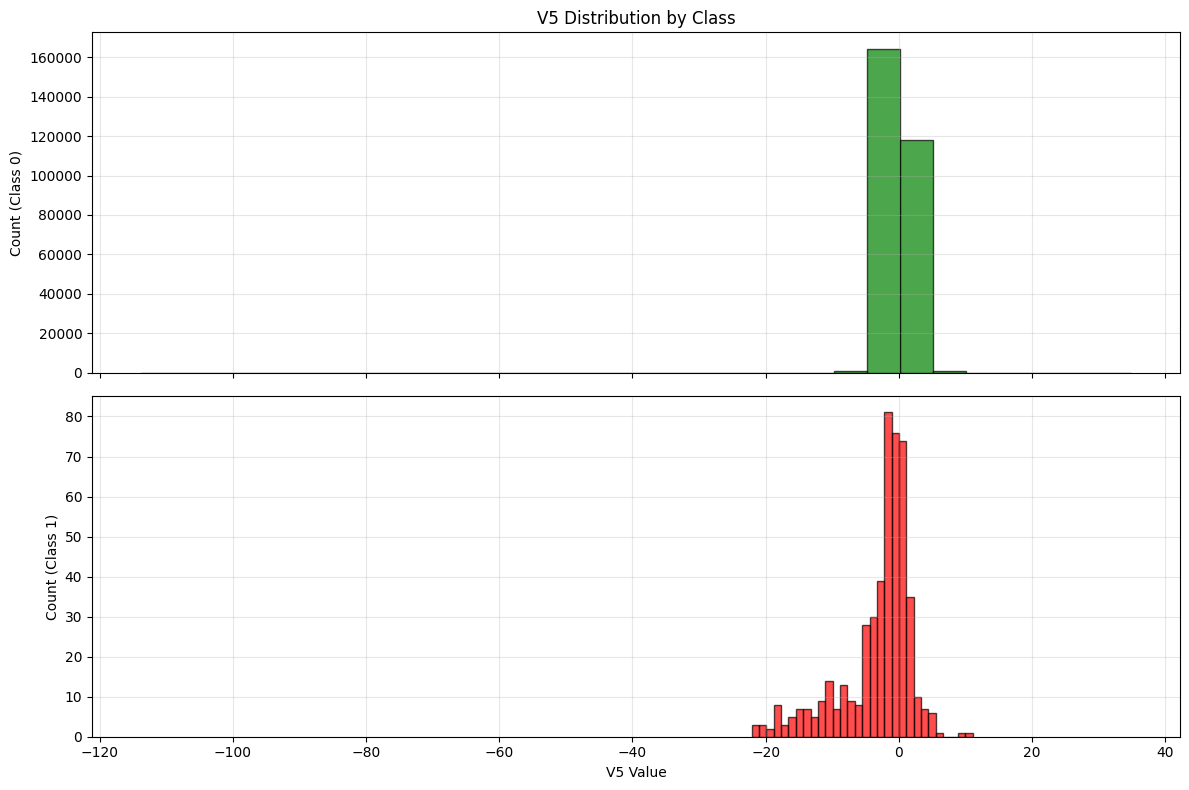

In [ ]:
plot_distribution(df, 'V5')
plot_distribution_by_class(df, 'V5')

For the V5 distribution, another clear pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples extremely tightly clustered around V5 = 0, forming an almost spike-like distribution with very low variance, indicating highly consistent behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V5 values from -40 to +20, with their peak around -5 to -10 but extending significantly into both negative and positive ranges, suggesting that fraudulent activities exhibit dramatically more varied and unpredictable patterns.

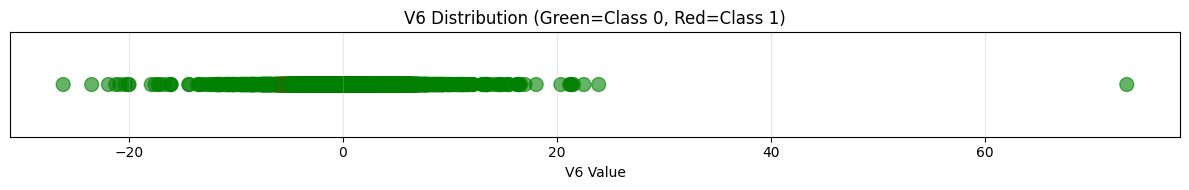

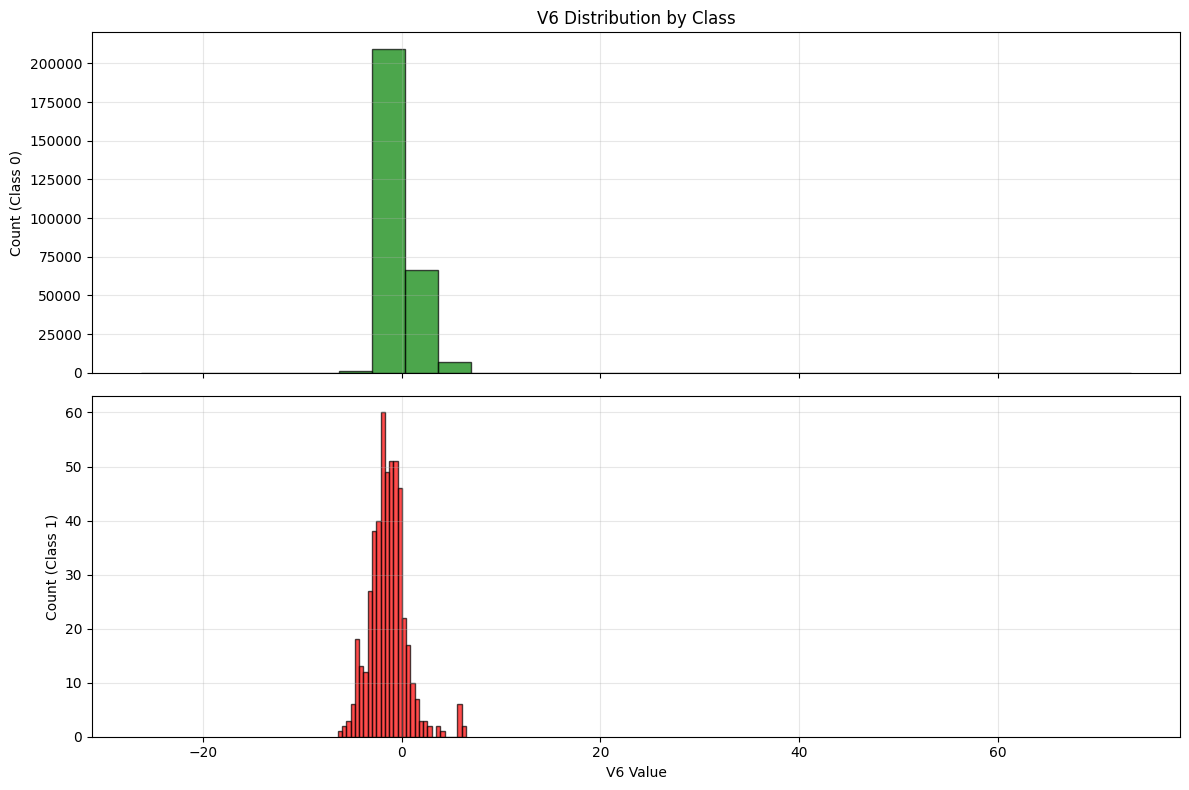

In [ ]:
plot_distribution(df, 'V6')
plot_distribution_by_class(df, 'V6')

For the V6 distribution, a striking pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples extremely concentrated around V6 = 0, forming a sharp peak with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are also primarily centered around V6 = 0 but with a much broader spread extending from approximately -10 to +10, suggesting that while fraudulent activities share some overlap with normal transactions, they exhibit more variability and unpredictable patterns.

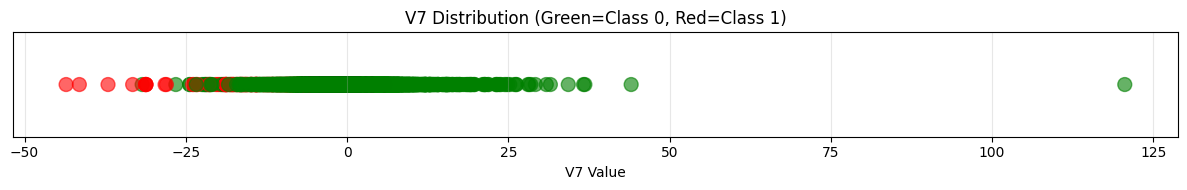

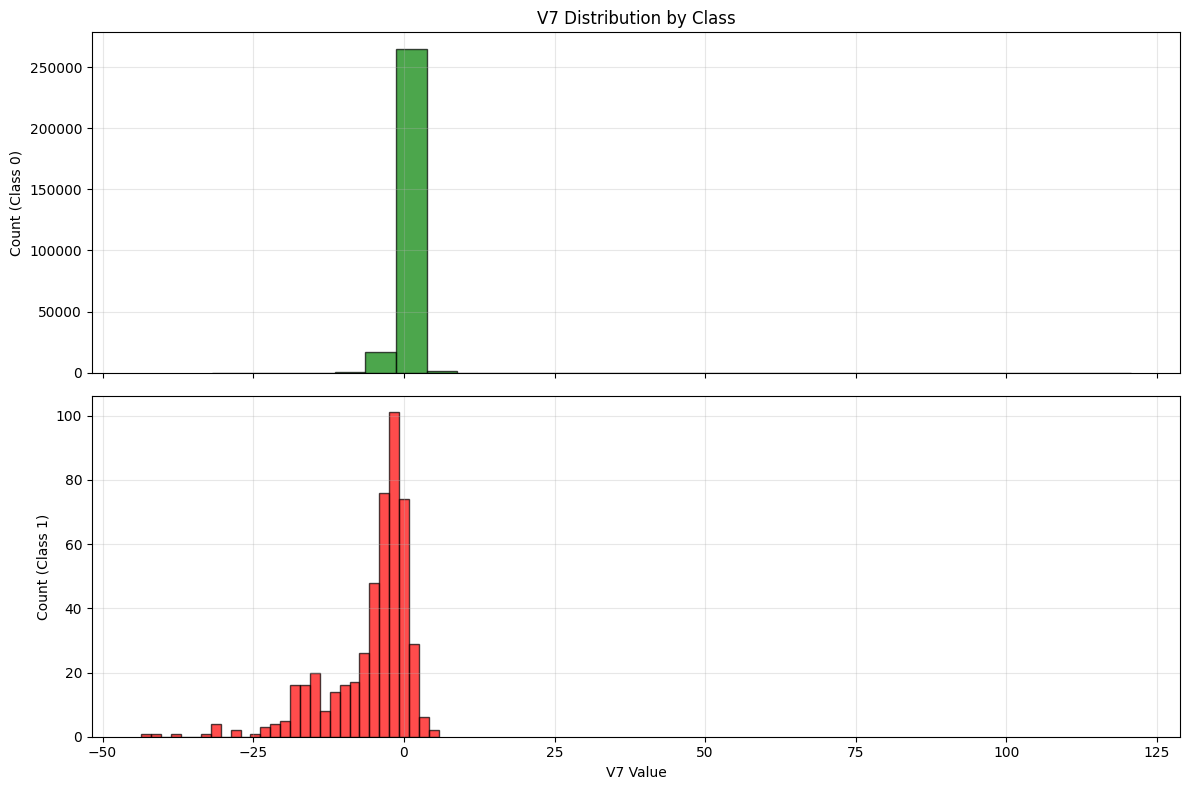

In [ ]:
plot_distribution(df, 'V7')
plot_distribution_by_class(df, 'V7')

For the V7 distribution, a familiar pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples extremely tightly clustered around V7 = 0, forming a sharp spike with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V7 values from -40 to +10, with their peak around -5 but extending significantly into the negative range, suggesting that fraudulent activities exhibit dramatically more varied and unpredictable patterns.

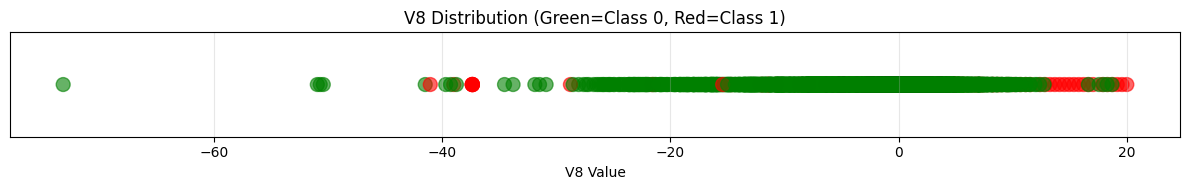

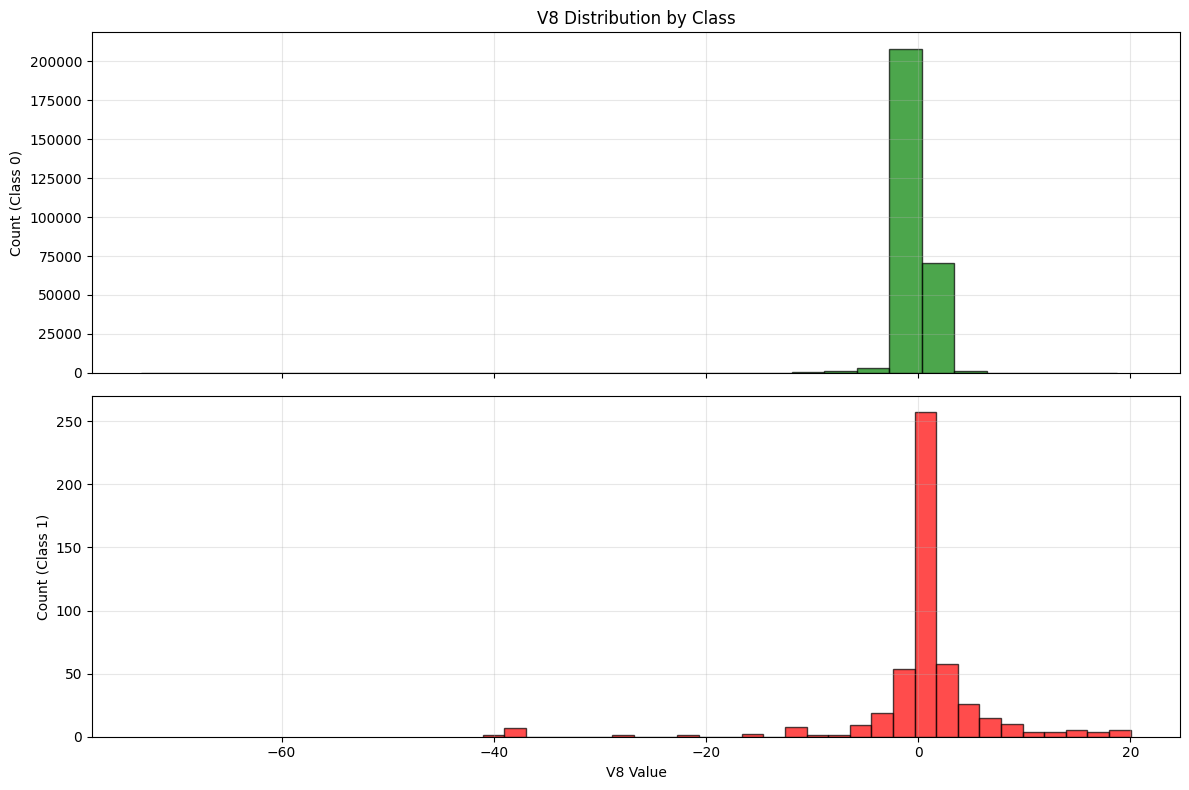

In [ ]:
plot_distribution(df, 'V8')
plot_distribution_by_class(df, 'V8')

For the V8 distribution, another clear pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples extremely tightly clustered around V8 = 0, forming a sharp peak with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V8 values from -50 to +20, with their primary concentration around 0 but with significant spread extending into both negative and positive ranges, suggesting that fraudulent activities exhibit dramatically more varied and unpredictable patterns.

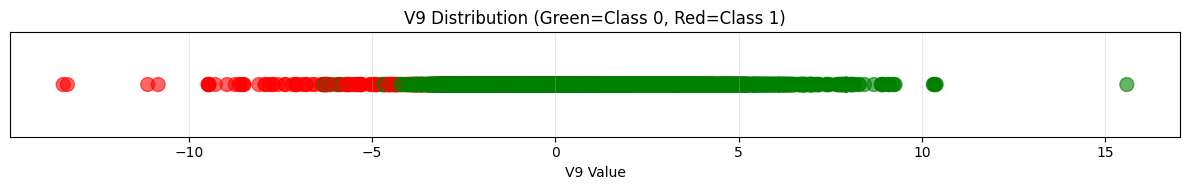

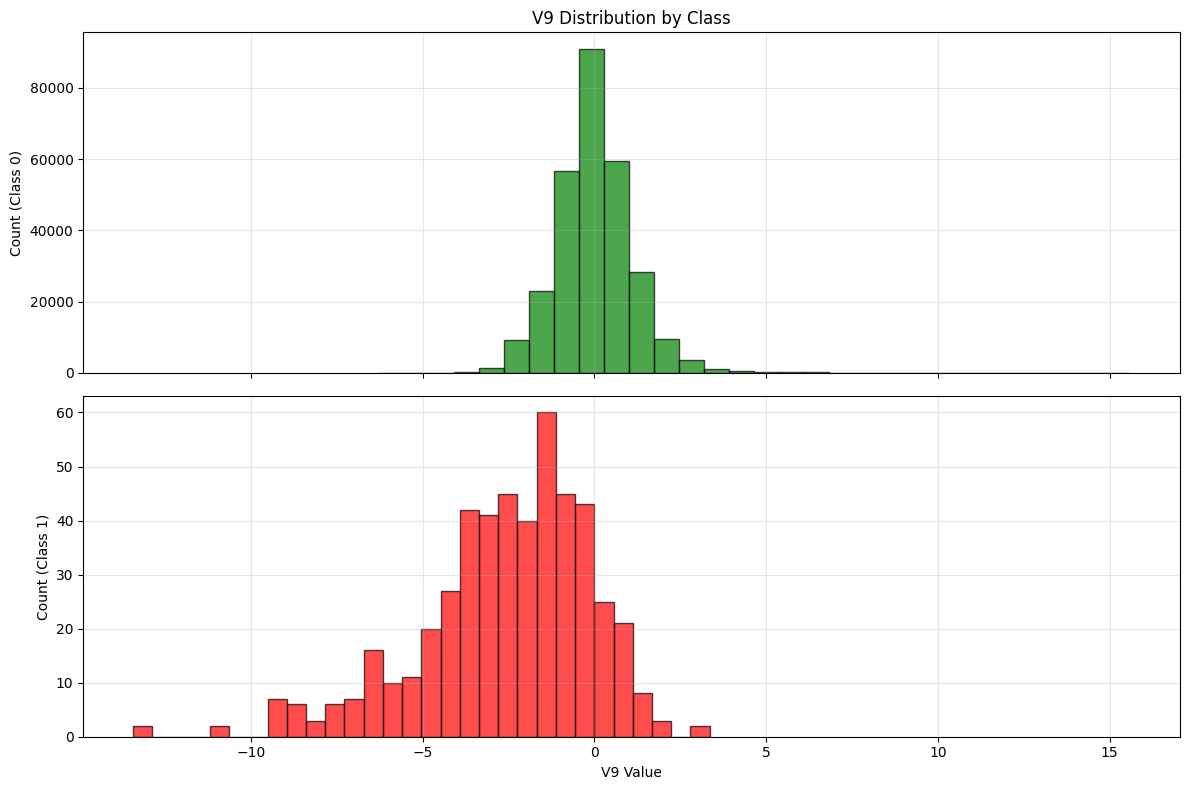

In [ ]:
plot_distribution(df, 'V9')
plot_distribution_by_class(df, 'V9')

For the V9 distribution, a different pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a bell-shaped distribution centered around V9 = -1, with values ranging from approximately -3 to +3, indicating more variability in legitimate transactions for this feature compared to the previous tightly clustered components. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread broadly across V9 values from -12 to +5, with their peak around -1 to 0 but extending significantly into the negative range, suggesting that fraudulent activities exhibit more varied and unpredictable patterns

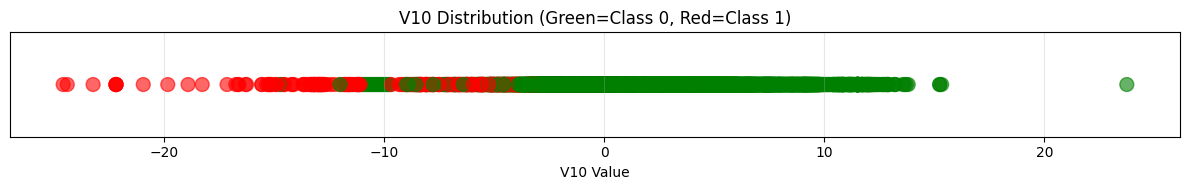

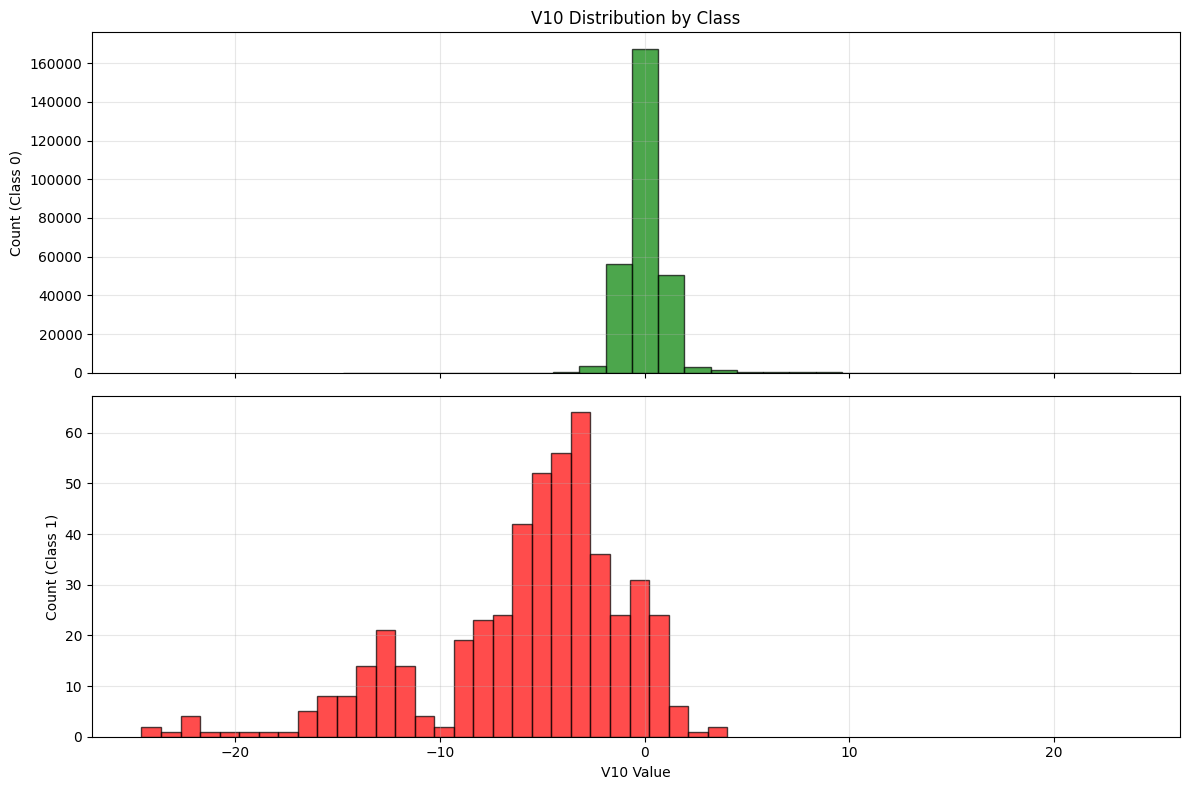

In [ ]:
plot_distribution(df, 'V10')
plot_distribution_by_class(df, 'V10')

For the V10 distribution, another clear pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples tightly clustered around V10 = 0, forming a sharp peak with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V10 values from -25 to +10, with their peak around -2 to 0 but extending significantly into both negative and positive ranges, suggesting that fraudulent activities exhibit dramatically more varied and unpredictable patterns.

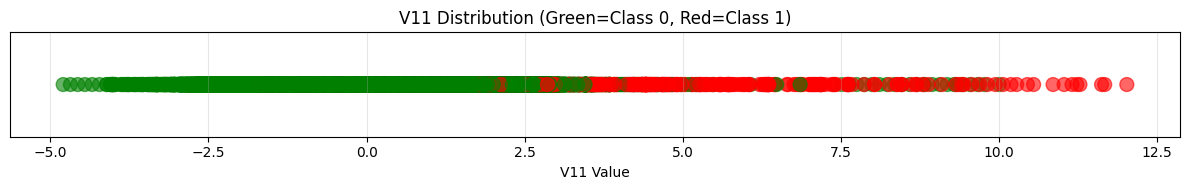

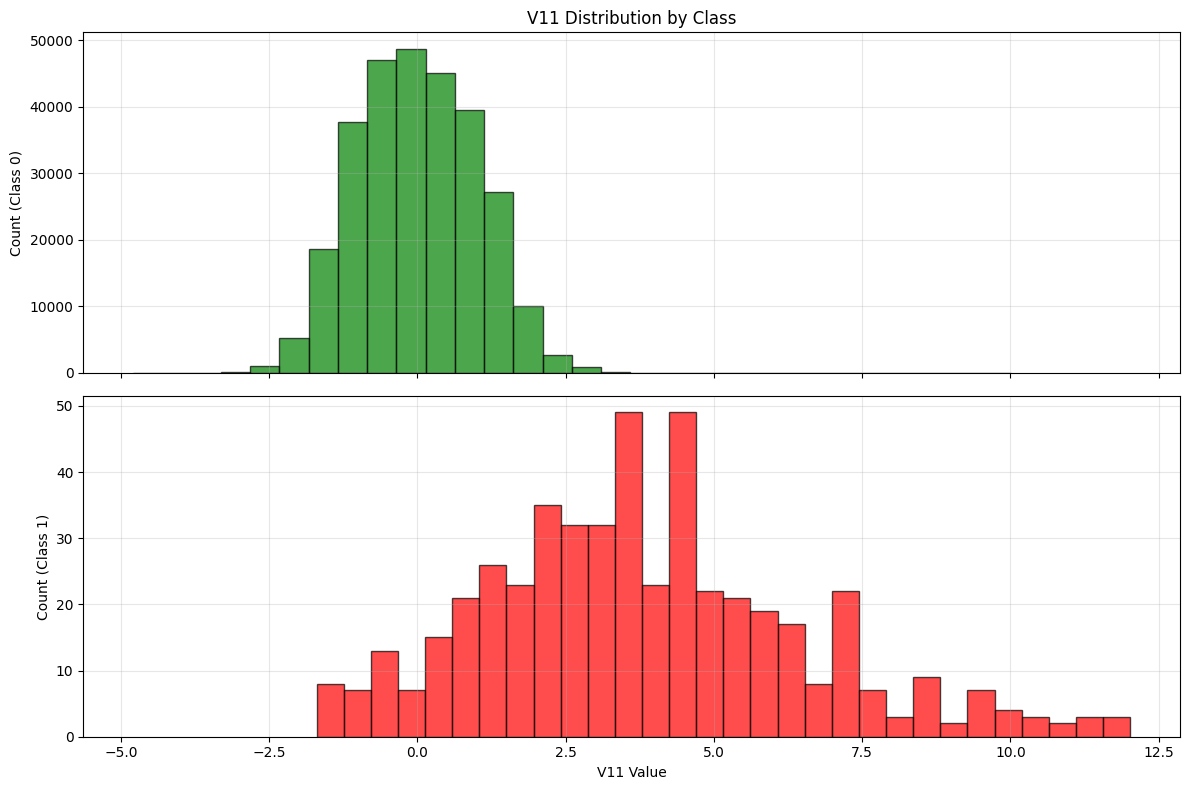

In [ ]:
plot_distribution(df, 'V11')
plot_distribution_by_class(df, 'V11')

For the V11 distribution, a notably different pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a bell-shaped distribution centered around V11 = 0, with values ranging from approximately -2 to +3, indicating more natural variability in legitimate transactions for this feature compared to the tightly clustered components seen in earlier features. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V11 values from -1 to +12, with multiple peaks around +3, +4, and extending significantly into positive ranges up to +12, suggesting that fraudulent activities exhibit more varied and unpredictable patterns with a distinctive tendency toward higher positive values

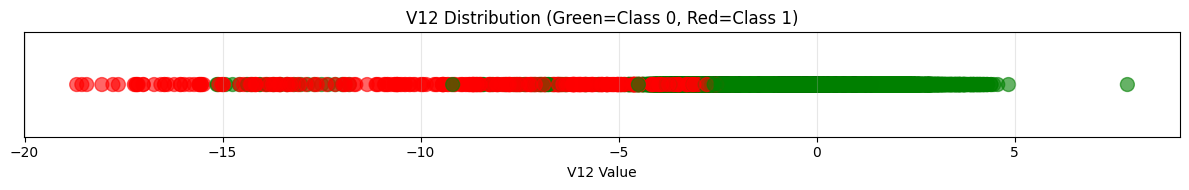

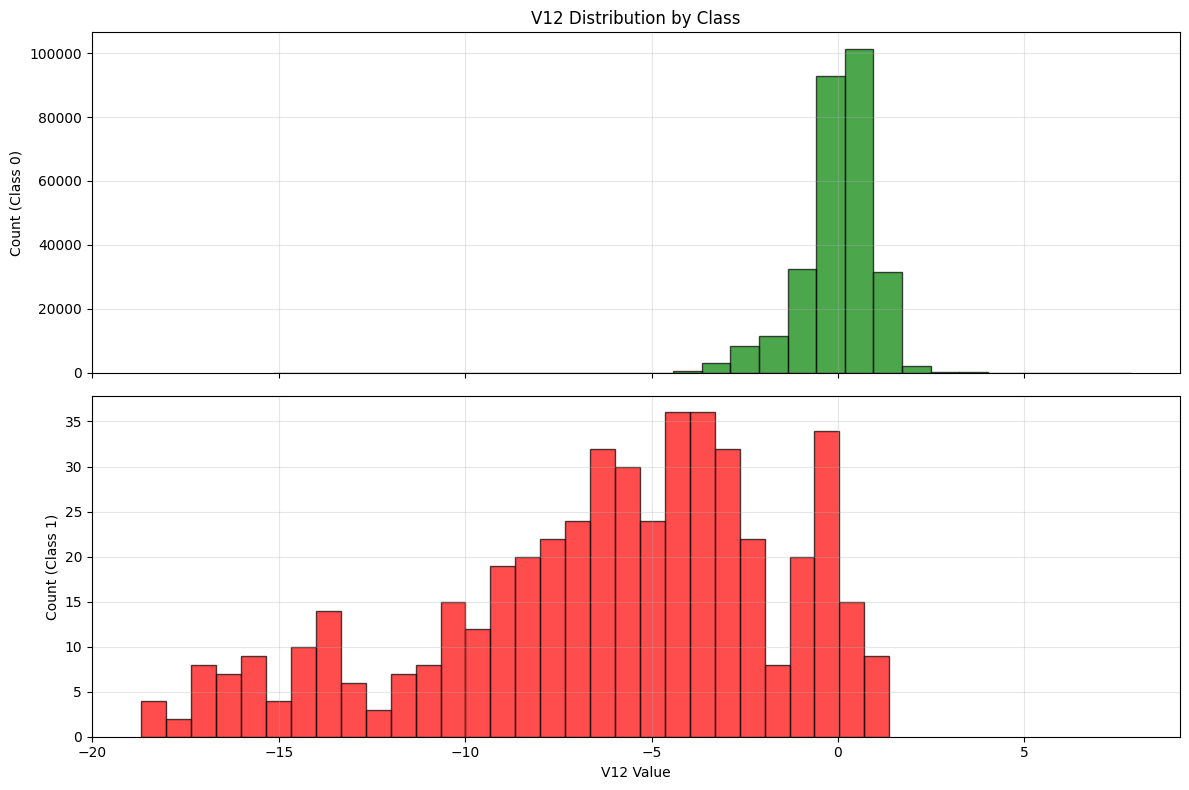

In [ ]:
plot_distribution(df, 'V12')
plot_distribution_by_class(df, 'V12')

For the V12 distribution, a distinct pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a skewed distribution centered around V12 = -1, with values ranging from approximately -4 to +2, indicating some variability in legitimate transactions but with a clear preference toward slightly negative values. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V12 values from -19 to +2, with multiple peaks around -4, -6, and extending significantly into the negative range down to -19, suggesting that fraudulent activities exhibit dramatically more varied and unpredictable patterns with a strong tendency toward extreme negative values.

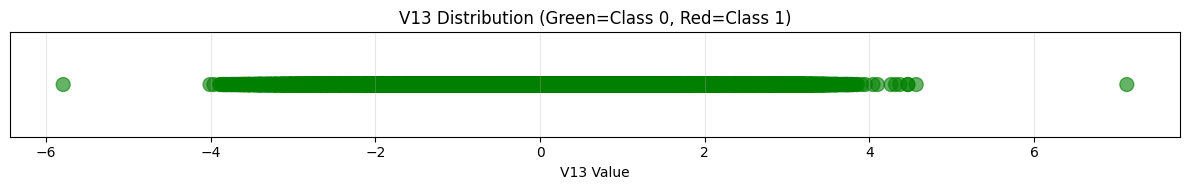

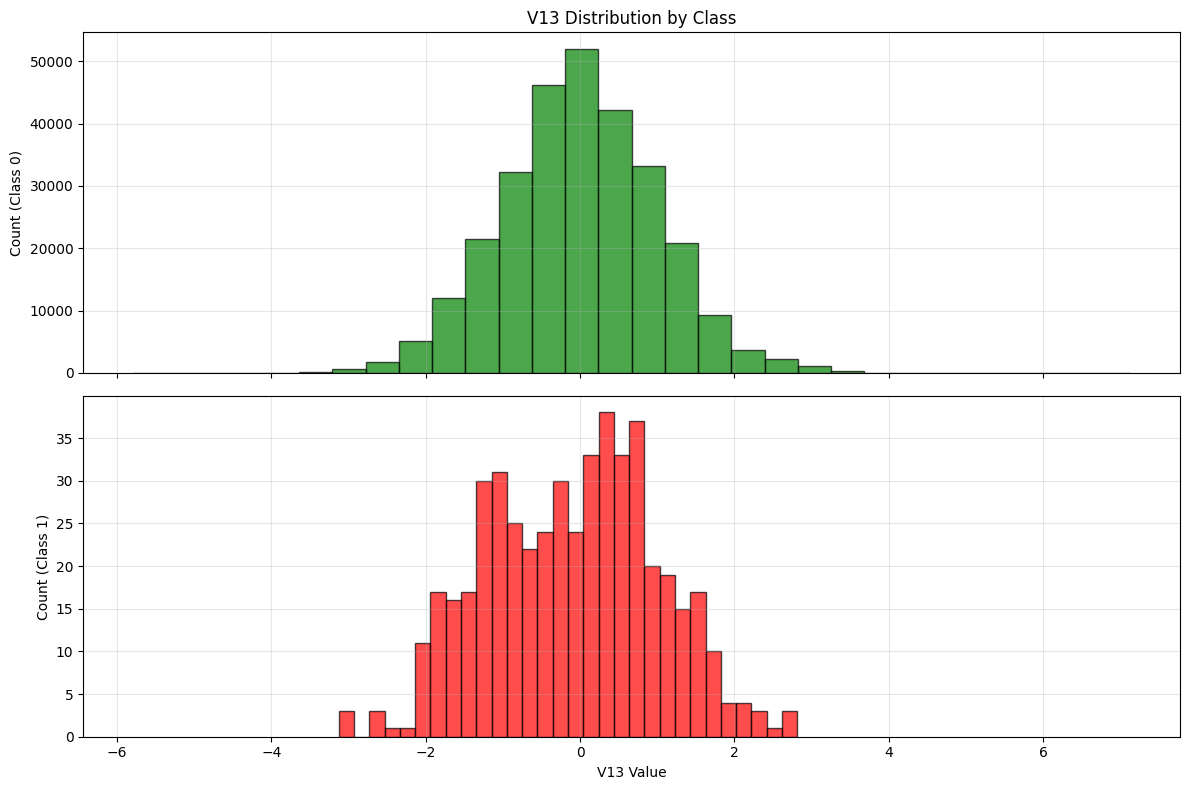

In [ ]:
plot_distribution(df, 'V13')
plot_distribution_by_class(df, 'V13')

For the V13 distribution, a clear pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a bell-shaped distribution centered around V13 = 0, with values ranging from approximately -2 to +3, indicating natural variability in legitimate transactions for this feature. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread across V13 values from -3 to +4, with their peak around 0 to +1 but showing a broader, more uniform distribution, suggesting that fraudulent activities exhibit more varied and unpredictable patterns.

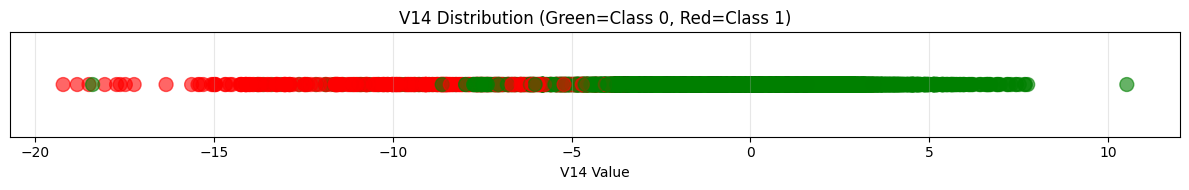

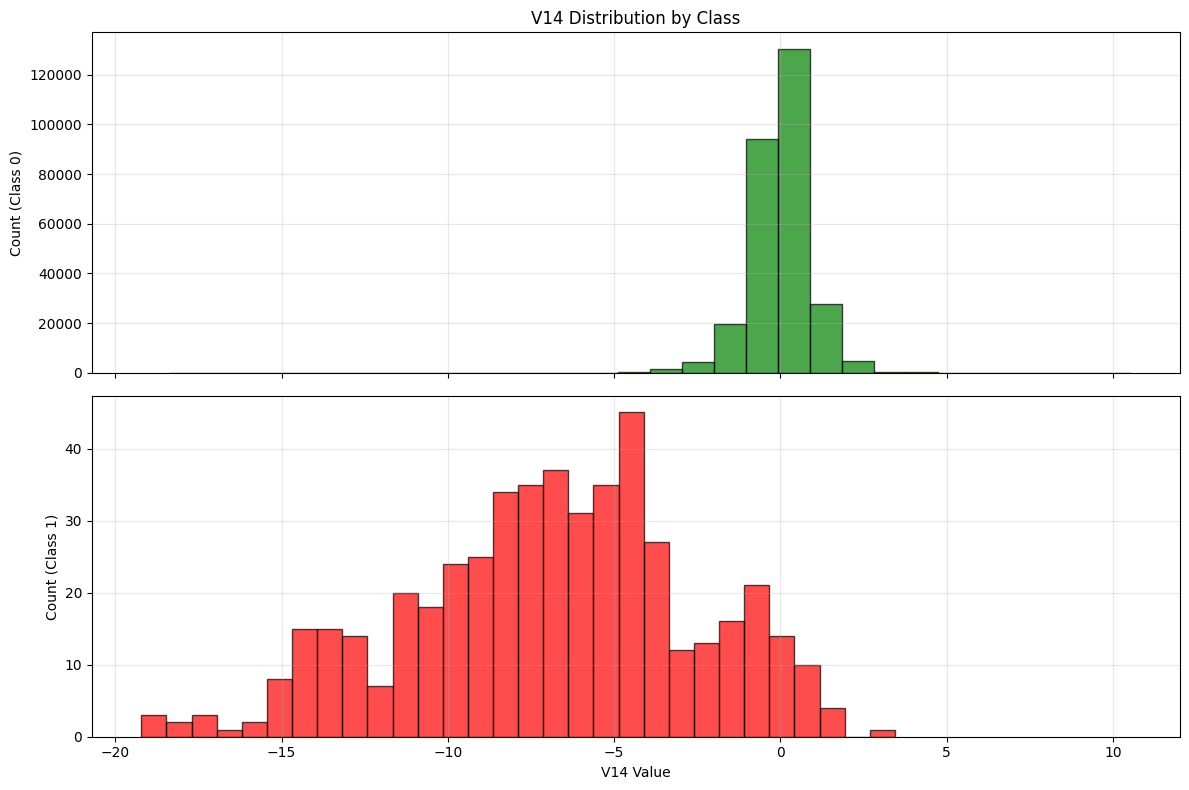

In [ ]:
plot_distribution(df, 'V14')
plot_distribution_by_class(df, 'V14')

For the V14 distribution, another clear pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples tightly clustered around V14 = 0, forming a sharp peak with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V14 values from -20 to +5, with their peak around -6 to -4 but extending significantly into both negative and positive ranges, suggesting that fraudulent activities exhibit dramatically more varied and unpredictable patterns.

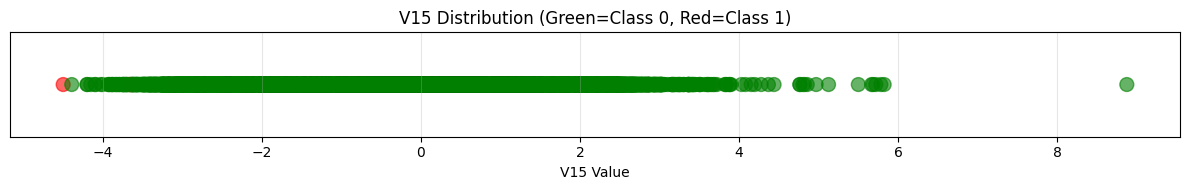

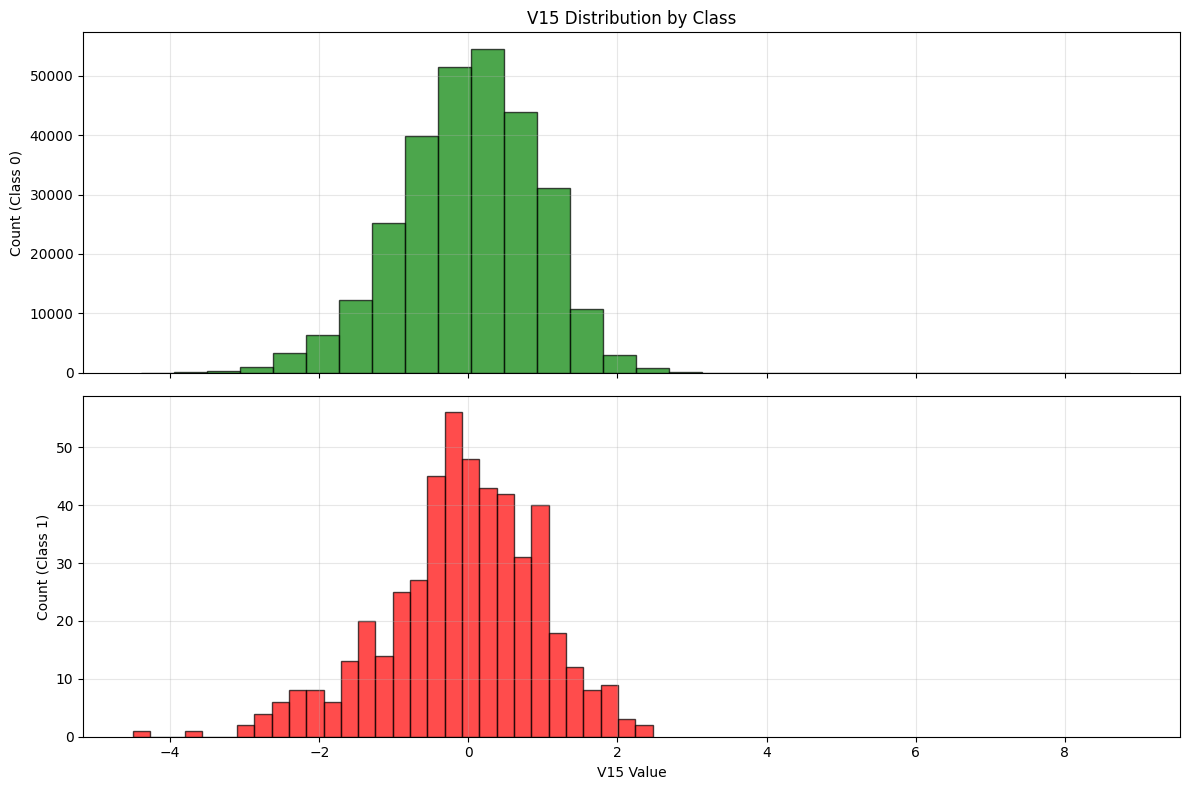

In [ ]:
plot_distribution(df, 'V15')
plot_distribution_by_class(df, 'V15')

For the V15 distribution, a different pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a bell-shaped distribution centered around V15 = 0, with values ranging from approximately -2 to +3, indicating natural variability in legitimate transactions for this feature. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread across V15 values from -4 to +3, with their peak around -0.5 to 0 and showing a similar bell-shaped distribution but with a slightly broader spread, suggesting that fraudulent activities exhibit somewhat more varied patterns.

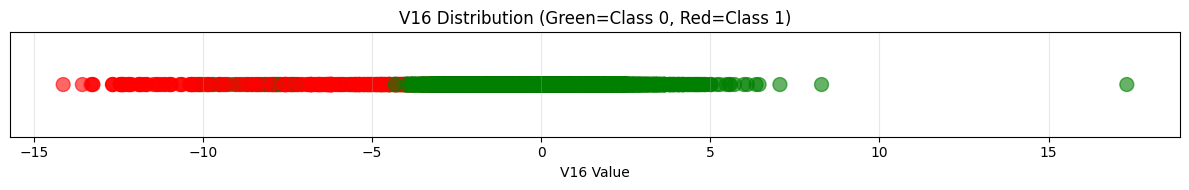

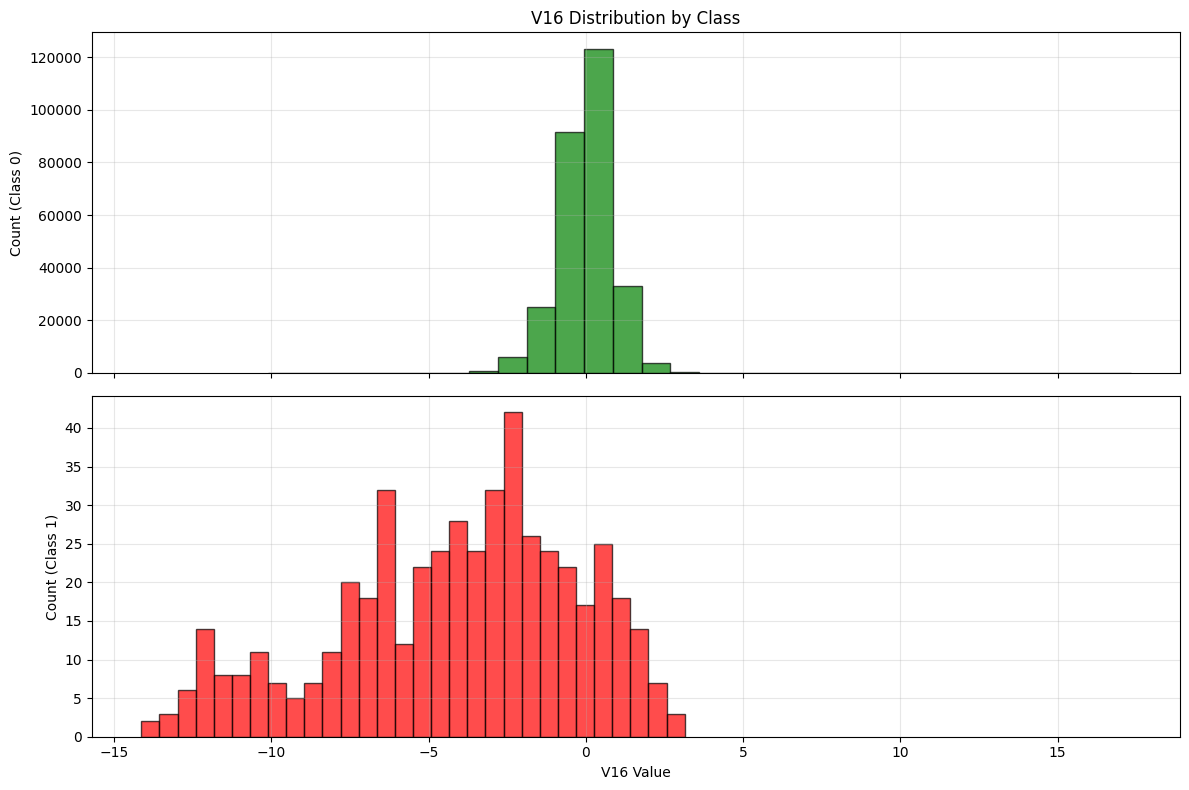

In [ ]:
plot_distribution(df, 'V16')
plot_distribution_by_class(df, 'V16')


For the V16 distribution, another clear pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples tightly clustered around V16 = 0, forming a sharp peak with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V16 values from -15 to +5, with their peak around -2 to 0 but extending significantly into both negative and positive ranges, suggesting that fraudulent activities exhibit dramatically more varied and unpredictable patterns.

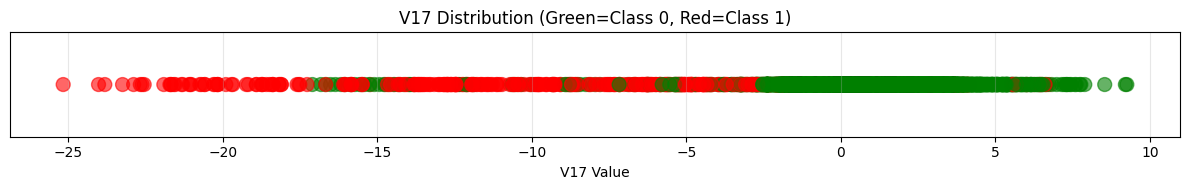

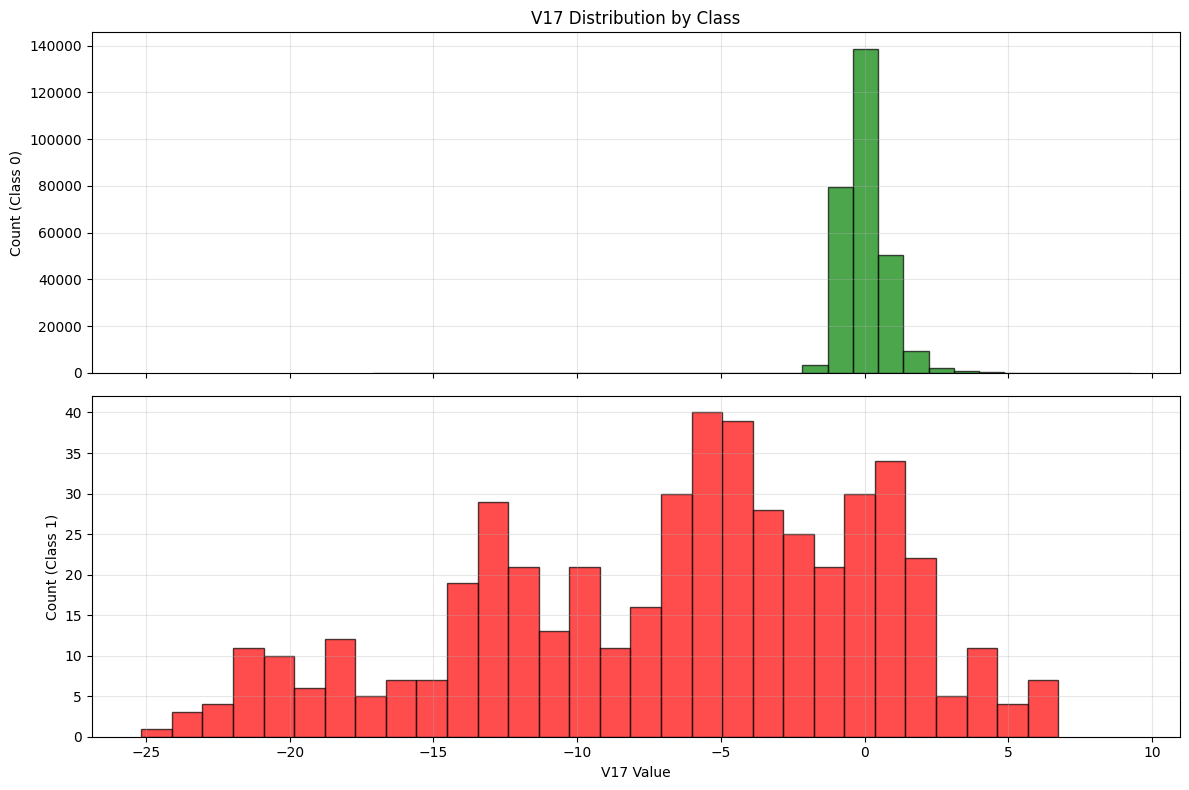

In [ ]:
plot_distribution(df, 'V17')
plot_distribution_by_class(df, 'V17')

For the V17 distribution, another clear pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples tightly clustered around V17 = 0, forming a sharp peak with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V17 values from -25 to +8, with multiple peaks around -5, -15, and +2, but extending significantly into both negative and positive ranges, suggesting that fraudulent activities exhibit dramatically more varied and unpredictable patterns with complex multi-modal behavior.

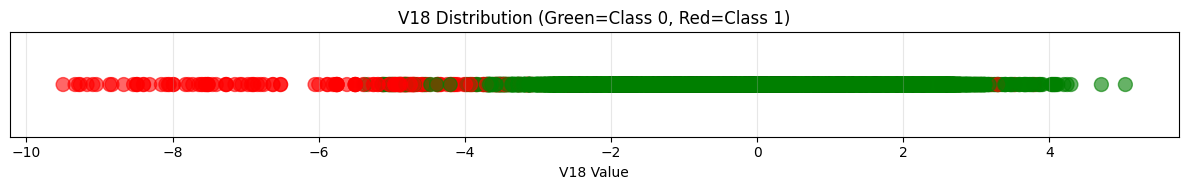

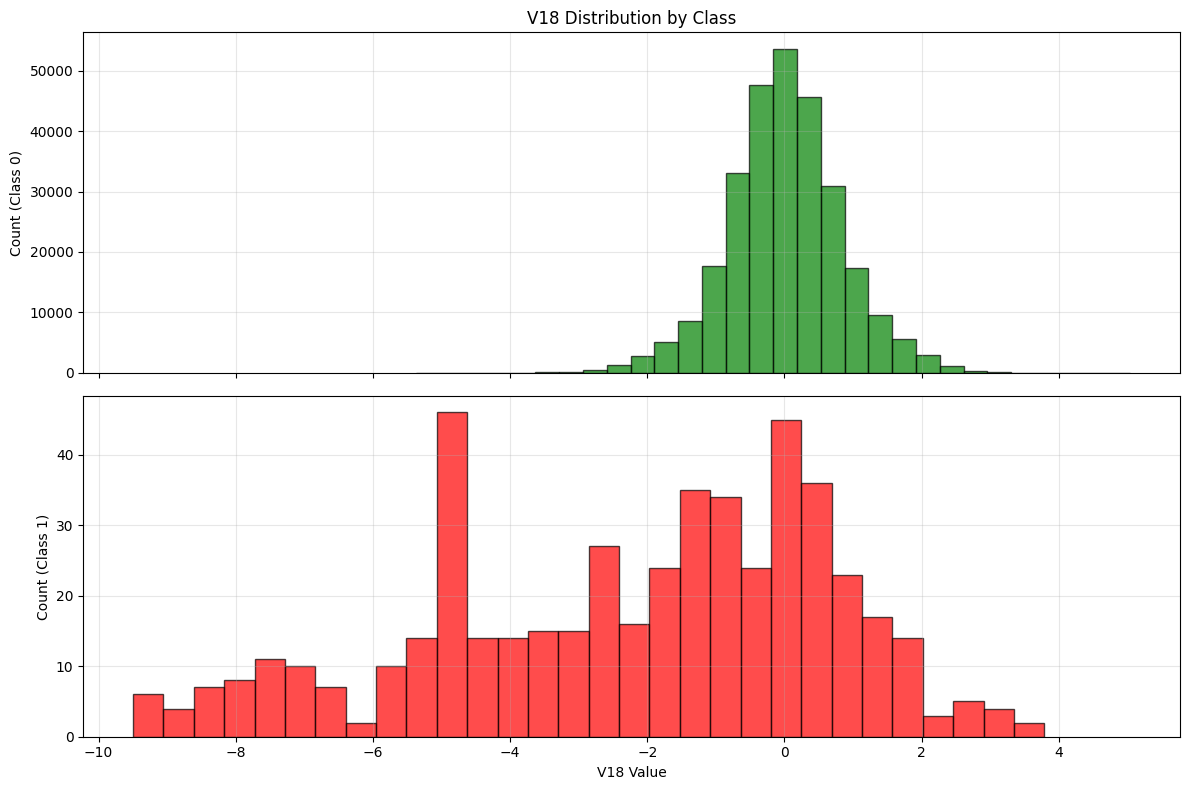

In [ ]:
plot_distribution(df, 'V18')
plot_distribution_by_class(df, 'V18')

For the V18 distribution, a different pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a bell-shaped distribution centered around V18 = 0, with values ranging from approximately -3 to +3, indicating more natural variability in legitimate transactions for this feature compared to the tightly clustered components. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V18 values from -10 to +4, with multiple peaks around -6, -1, and 0, but extending significantly into the extreme negative range, suggesting that fraudulent activities exhibit more varied and unpredictable patterns.

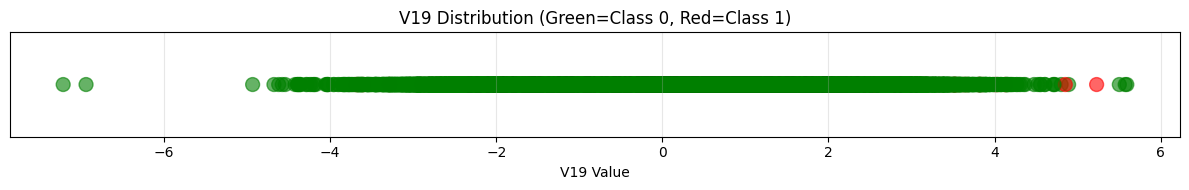

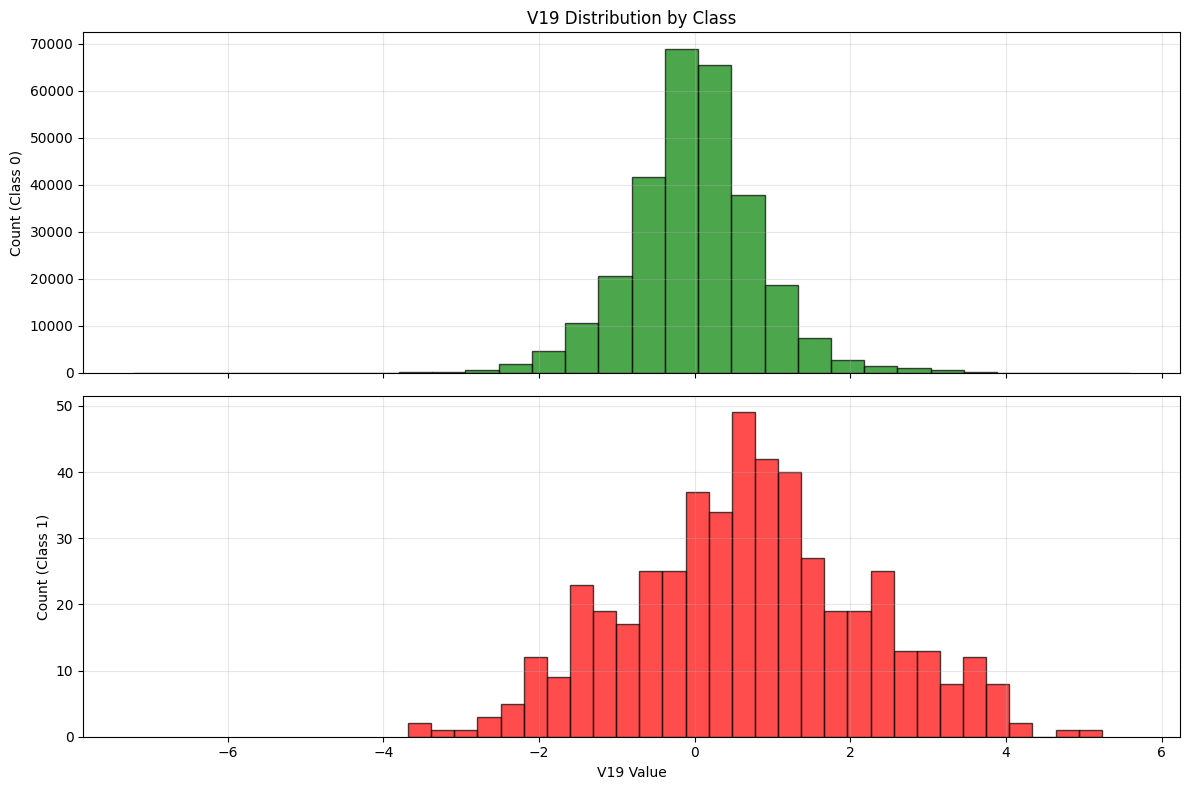

In [ ]:
plot_distribution(df, 'V19')
plot_distribution_by_class(df, 'V19')

For the V19 distribution, a different pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a bell-shaped distribution centered around V19 = 0, with values ranging from approximately -2 to +3, indicating natural variability in legitimate transactions for this feature. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread across V19 values from -3 to +5, with their peak around 0 to +1 and showing a broader, more spread-out distribution extending into positive ranges, suggesting that fraudulent activities exhibit more varied and unpredictable patterns.

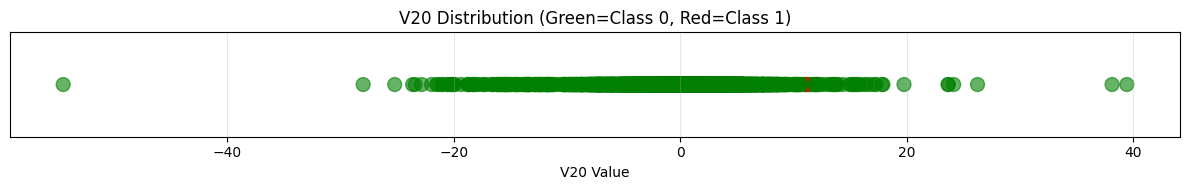

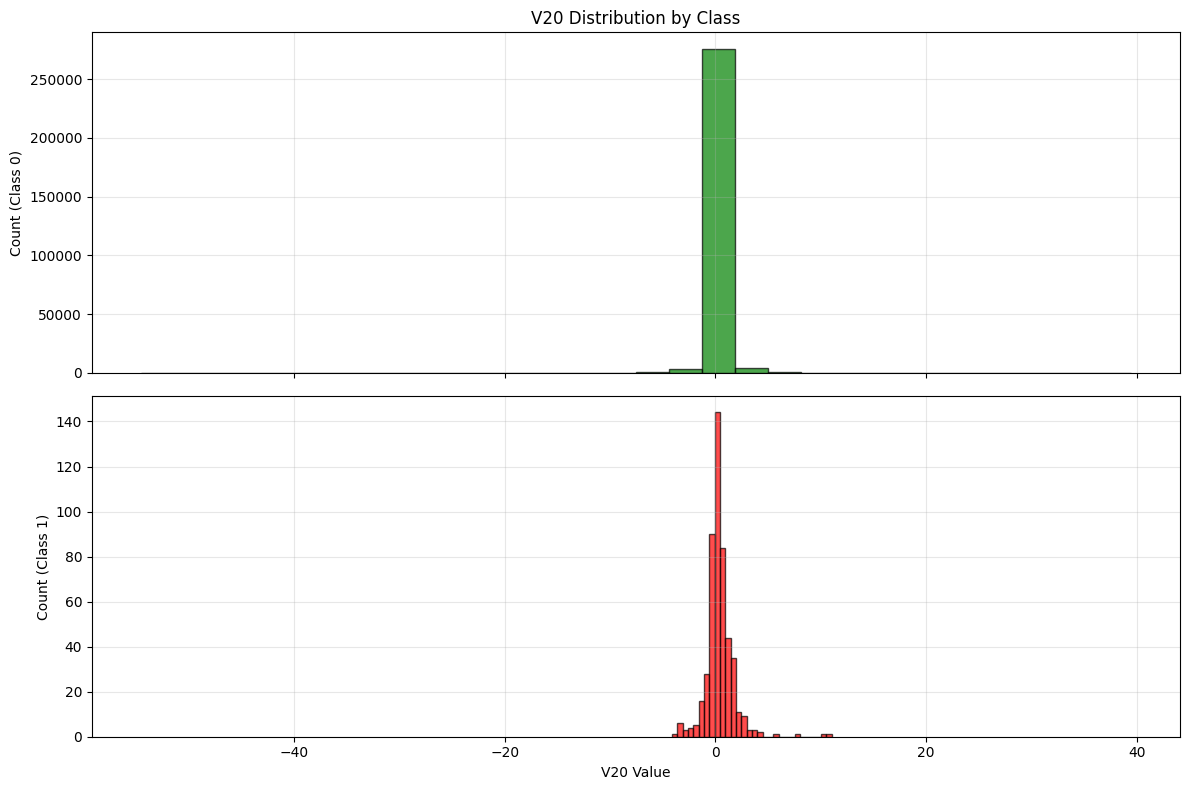

In [ ]:
plot_distribution(df, 'V20')
plot_distribution_by_class(df, 'V20')

For the V20 distribution, another striking pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples extremely tightly clustered around V20 = 0, forming an almost spike-like distribution with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are also primarily concentrated around V20 = 0 but with a much broader spread extending from approximately -5 to +5, suggesting that while fraudulent activities share some overlap with normal transactions around zero, they exhibit more variability and unpredictable patterns.

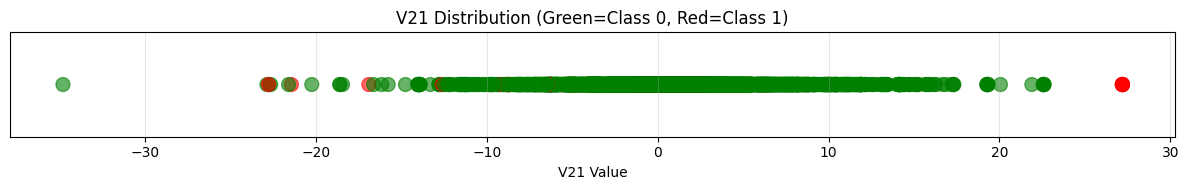

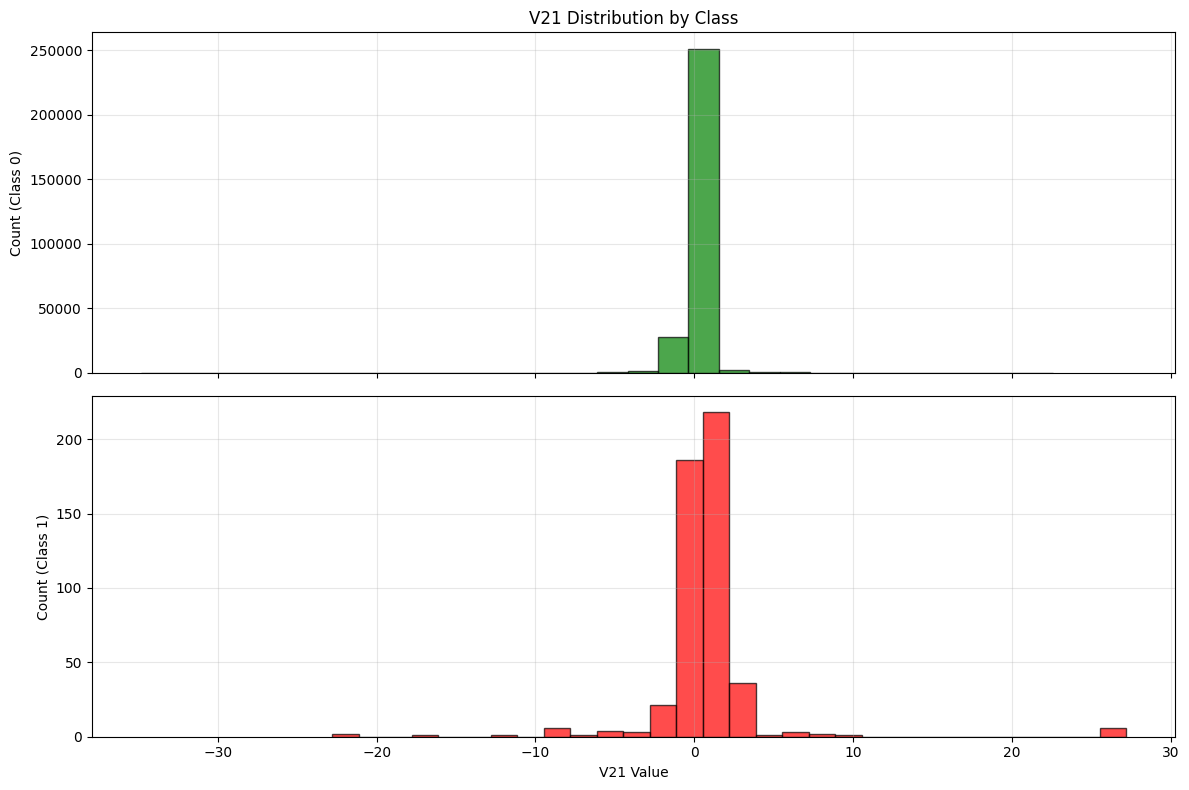

In [ ]:
plot_distribution(df, 'V21')
plot_distribution_by_class(df, 'V21')

For the V21 distribution, another striking pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples extremely tightly clustered around V21 = 0, forming an almost spike-like distribution with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread much more widely across V21 values from -25 to +25, with their primary peak around 0 but with significant scatter extending into both extreme negative and positive ranges, suggesting that fraudulent activities exhibit dramatically more varied and unpredictable patterns.

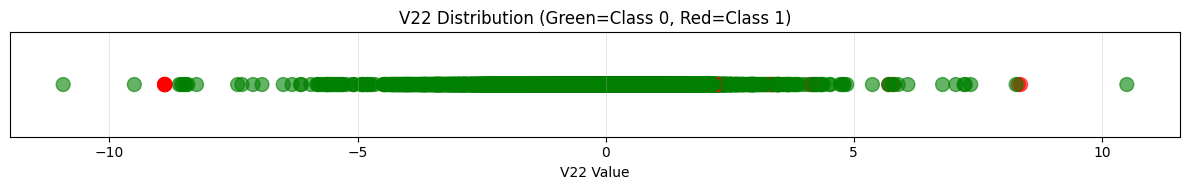

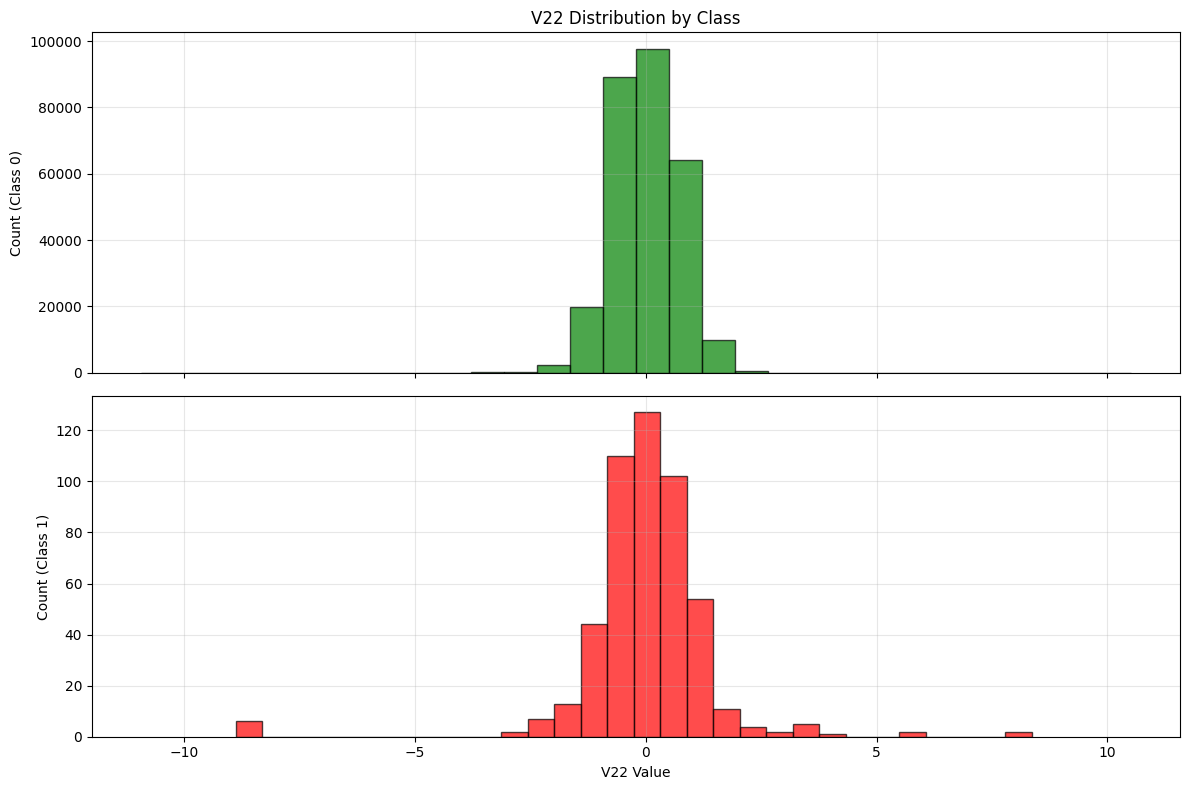

In [ ]:
plot_distribution(df, 'V22')
plot_distribution_by_class(df, 'V22')

For the V22 distribution, a different pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a bell-shaped distribution centered around V22 = 0, with values ranging from approximately -2 to +3, indicating natural variability in legitimate transactions for this feature. In contrast, the roughly 500 fraudulent transactions (Class 1) are also primarily concentrated around V22 = 0 but with a broader spread extending from approximately -4 to +4, and showing a more uniform distribution shape, suggesting that fraudulent activities exhibit more varied and unpredictable patterns.

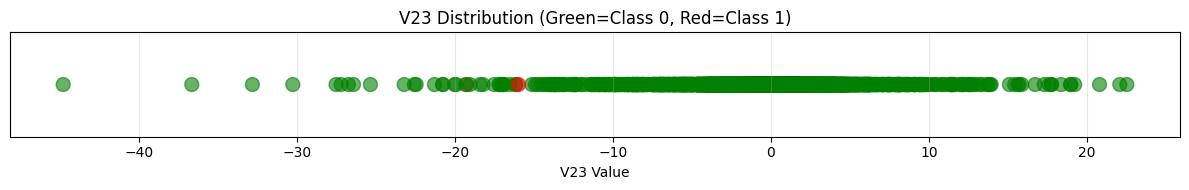

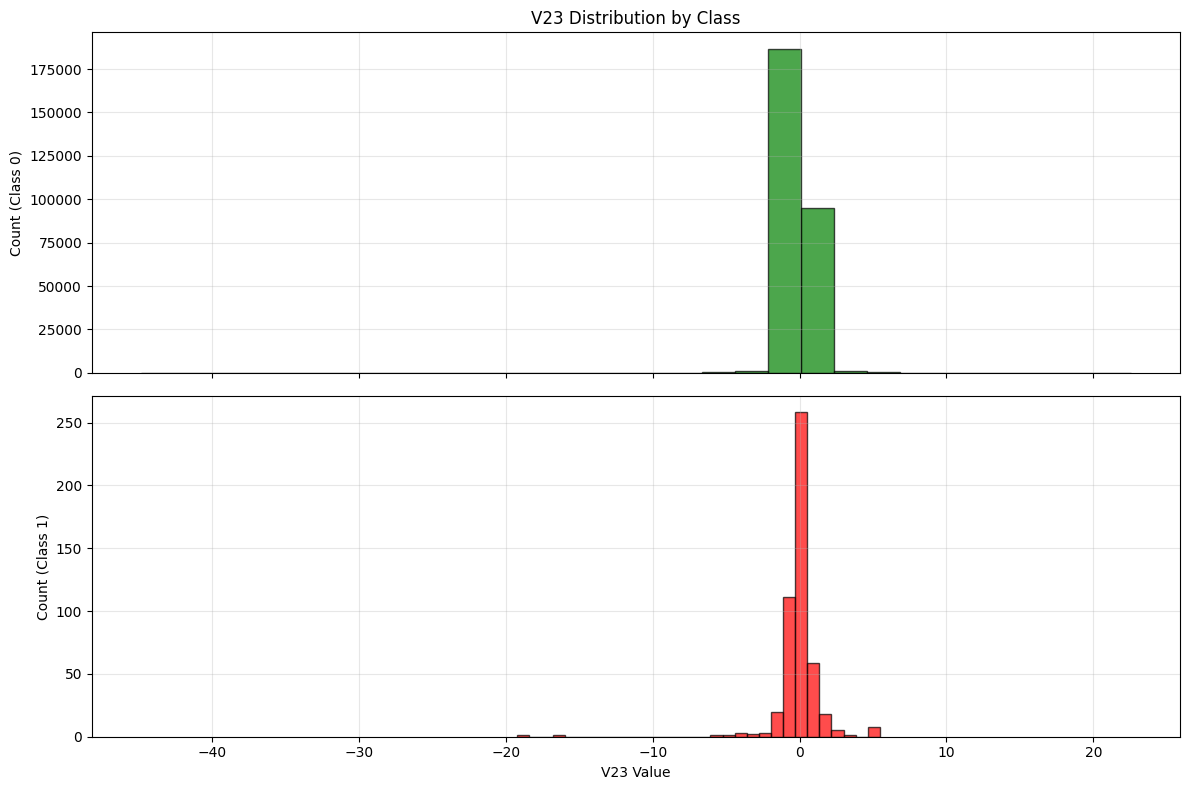

In [ ]:
plot_distribution(df, 'V23')
plot_distribution_by_class(df, 'V23')

For the V23 distribution, another striking pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples extremely tightly clustered around V23 = 0, forming an almost spike-like distribution with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are also primarily concentrated around V23 = 0 but with a much broader spread extending from approximately -5 to +5, suggesting that while fraudulent activities share some overlap with normal transactions around zero, they exhibit more variability and unpredictable patterns.

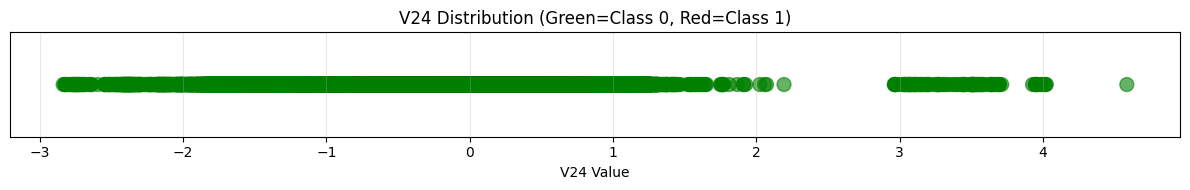

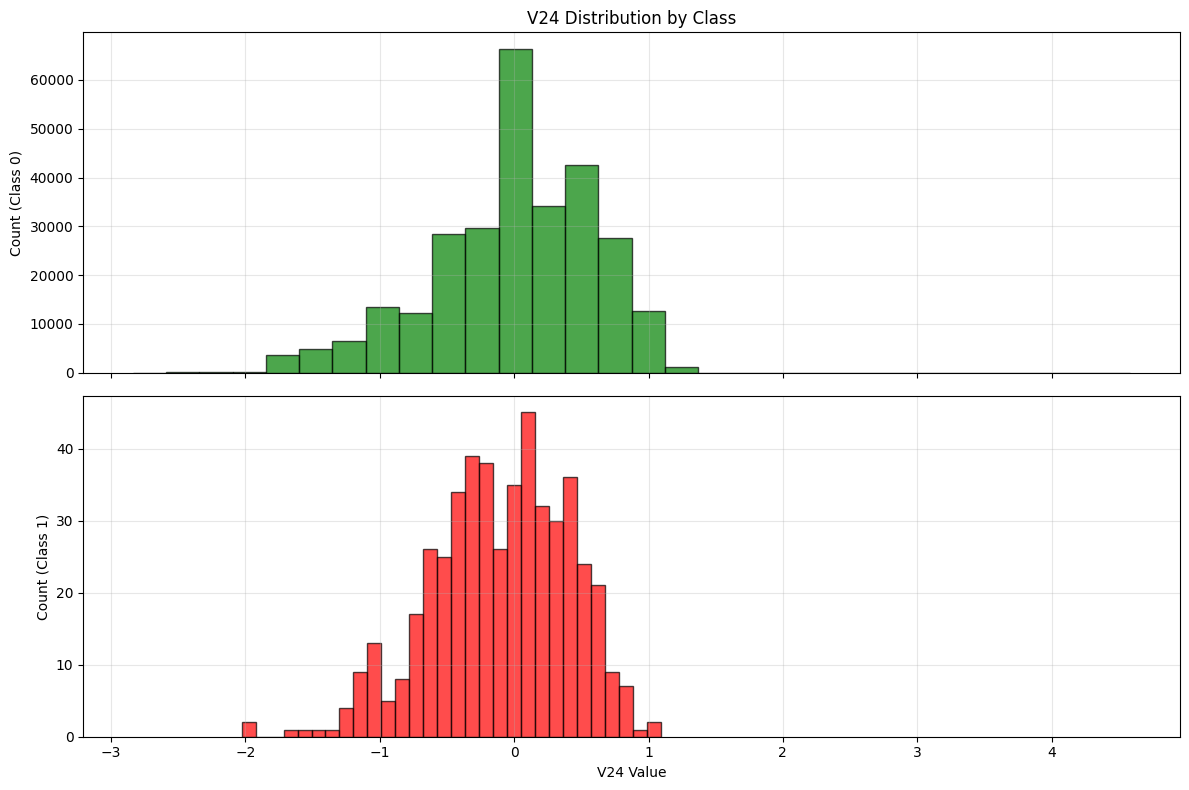

In [ ]:
plot_distribution(df, 'V24')
plot_distribution_by_class(df, 'V24')

For the V24 distribution, a different pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a bell-shaped distribution centered around V24 = 0, with values ranging from approximately -1.5 to +1.5, indicating natural variability in legitimate transactions for this feature. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread across V24 values from -2.5 to +1.5, with their peak around 0 but showing a broader, more spread-out distribution, suggesting that fraudulent activities exhibit more varied and unpredictable patterns.

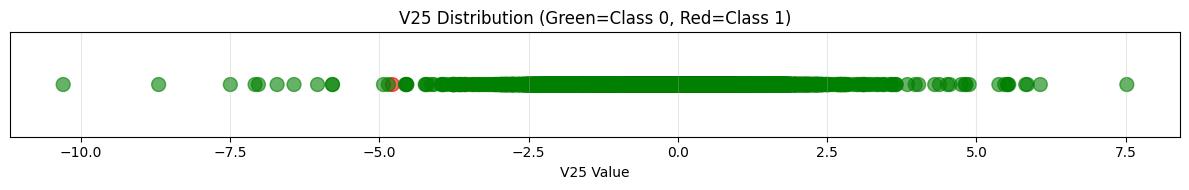

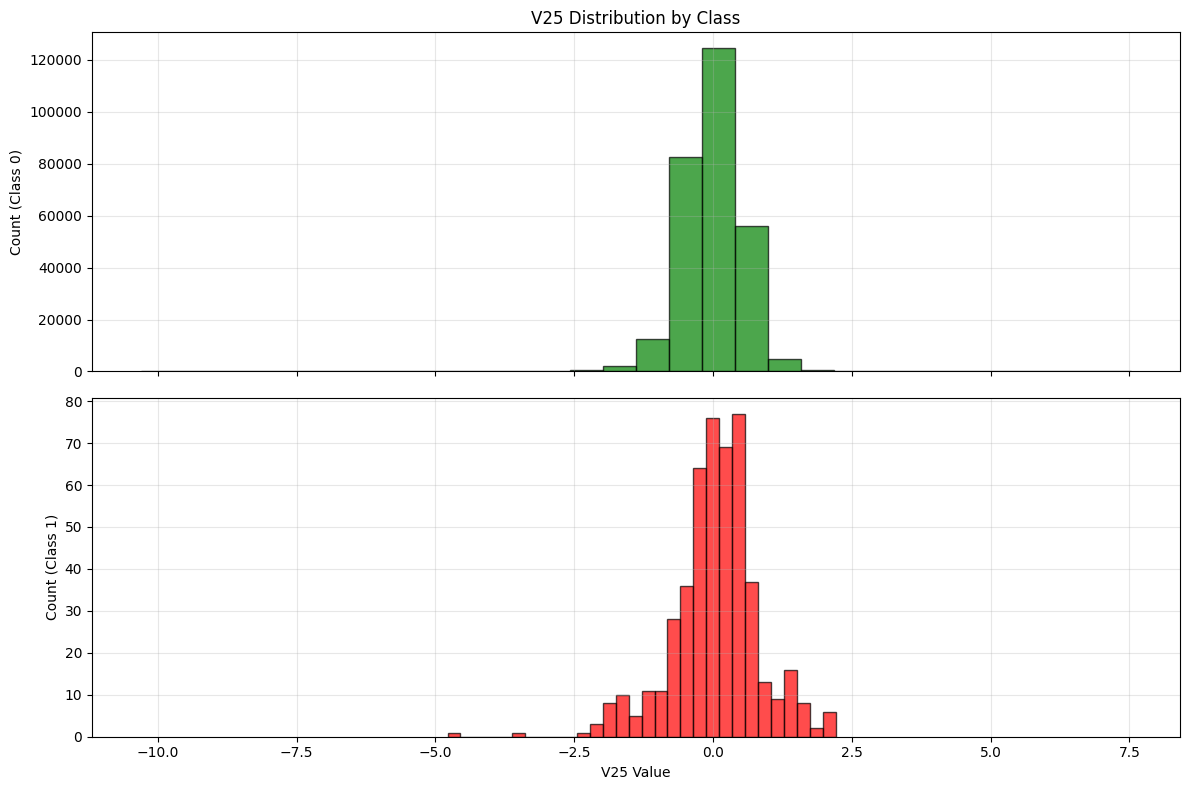

In [ ]:
plot_distribution(df, 'V25')
plot_distribution_by_class(df, 'V25')

For the V25 distribution, another clear pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples tightly clustered around V25 = 0, forming a sharp peak with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are also primarily concentrated around V25 = 0 but with a much broader spread extending from approximately -3 to +3, suggesting that while fraudulent activities share some overlap with normal transactions around zero, they exhibit more variability and unpredictable patterns.

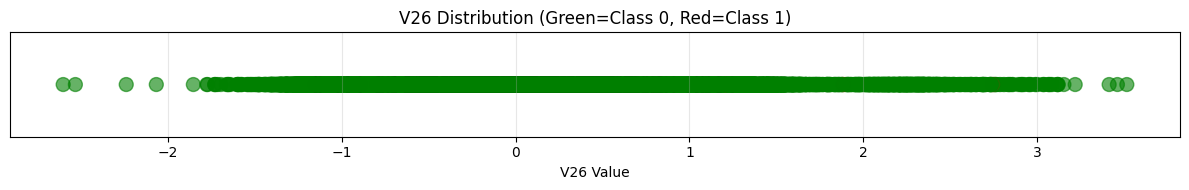

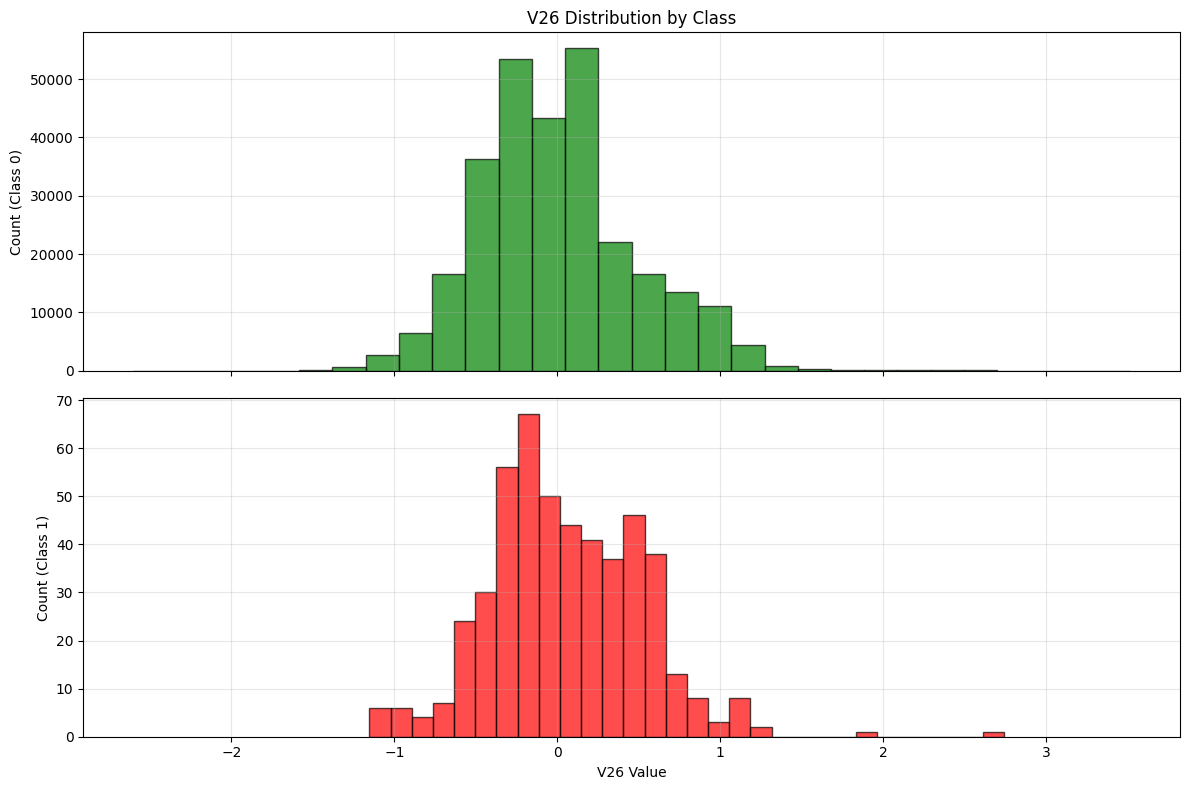

In [ ]:
plot_distribution(df, 'V26')
plot_distribution_by_class(df, 'V26')

For the V26 distribution, a different pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples following a bell-shaped distribution centered around V26 = 0, with values ranging from approximately -1 to +2, indicating natural variability in legitimate transactions for this feature. In contrast, the roughly 500 fraudulent transactions (Class 1) are spread across V26 values from -1.5 to +3, with their peak around 0 but showing a broader, more spread-out distribution extending further into positive ranges, suggesting that fraudulent activities exhibit more varied and unpredictable patterns.

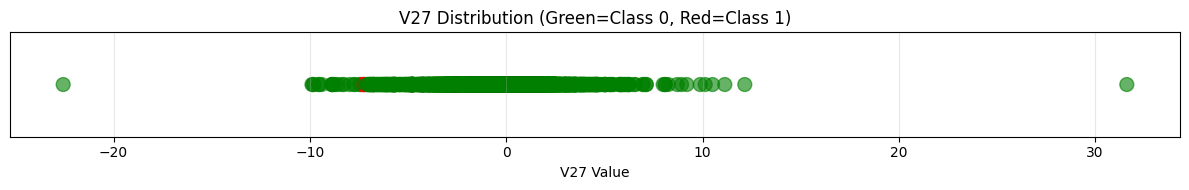

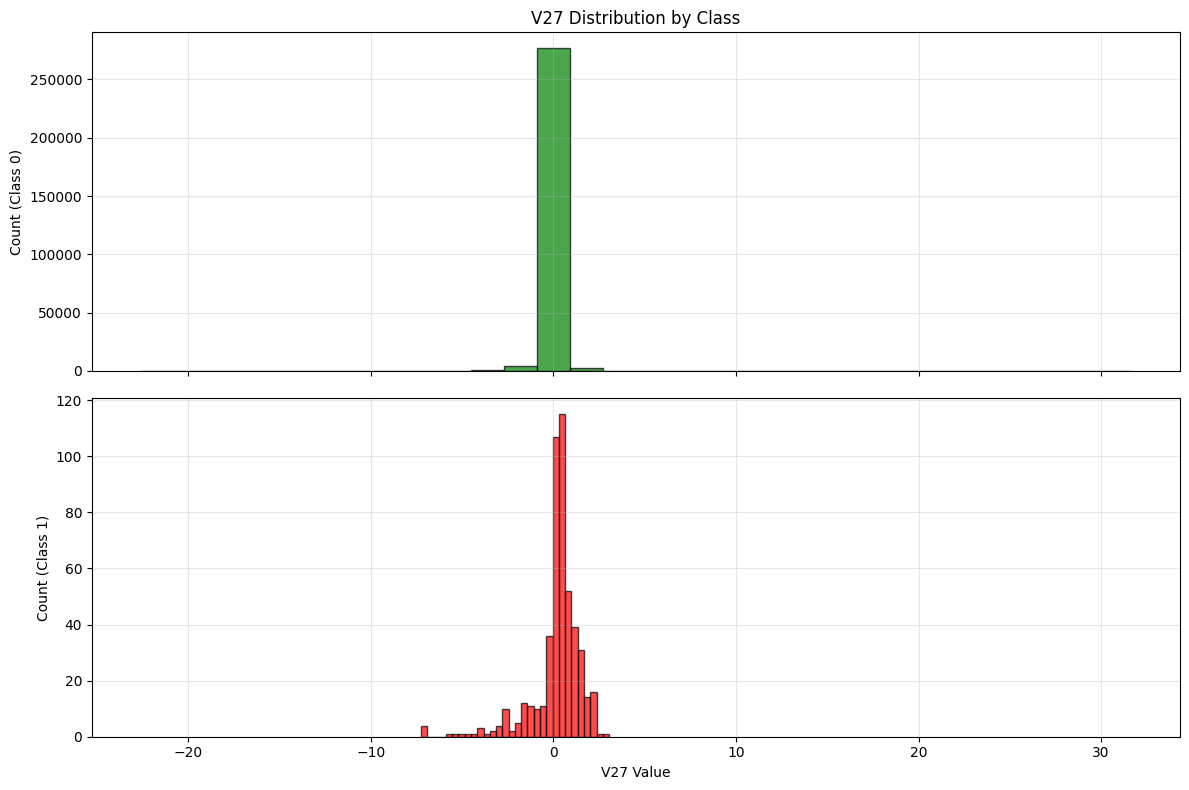

In [ ]:
plot_distribution(df, 'V27')
plot_distribution_by_class(df, 'V27')

For the V27 distribution, another striking pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples extremely tightly clustered around V27 = 0, forming an almost spike-like distribution with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are also primarily concentrated around V27 = 0 but with a much broader spread extending from approximately -5 to +5, suggesting that while fraudulent activities share some overlap with normal transactions around zero, they exhibit more variability and unpredictable patterns.

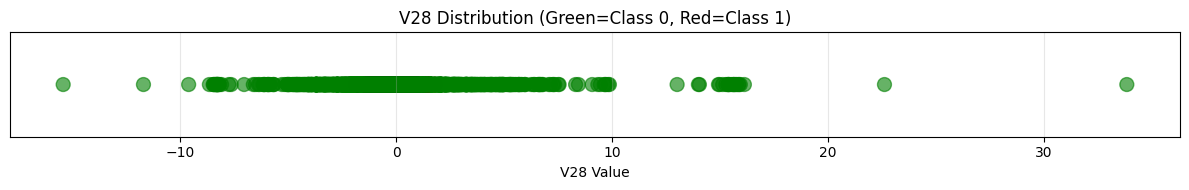

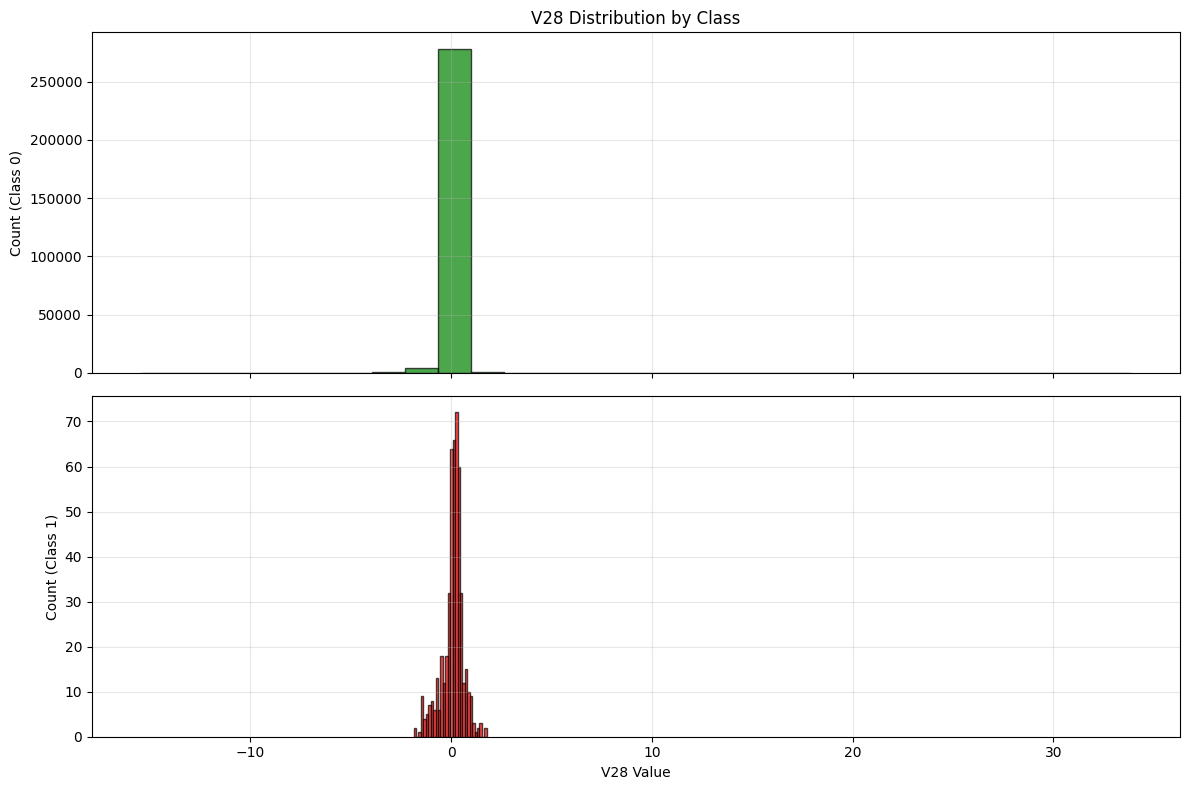

In [ ]:
plot_distribution(df, 'V28')
plot_distribution_by_class(df, 'V28')

For the V28 distribution, another striking pattern emerges from the PCA-transformed data. Normal transactions (Class 0) show around 300,000 samples extremely tightly clustered around V28 = 0, forming an almost spike-like distribution with minimal variance, indicating highly consistent and predictable behavior in this feature dimension. In contrast, the roughly 500 fraudulent transactions (Class 1) are also primarily concentrated around V28 = 0 but with a much broader spread extending from approximately -3 to +3, suggesting that while fraudulent activities share some overlap with normal transactions around zero, they exhibit more variability and unpredictable patterns.

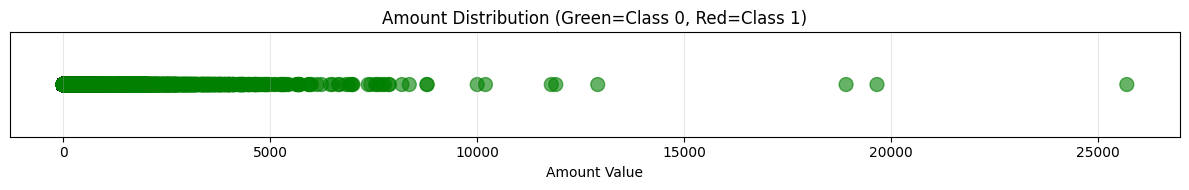

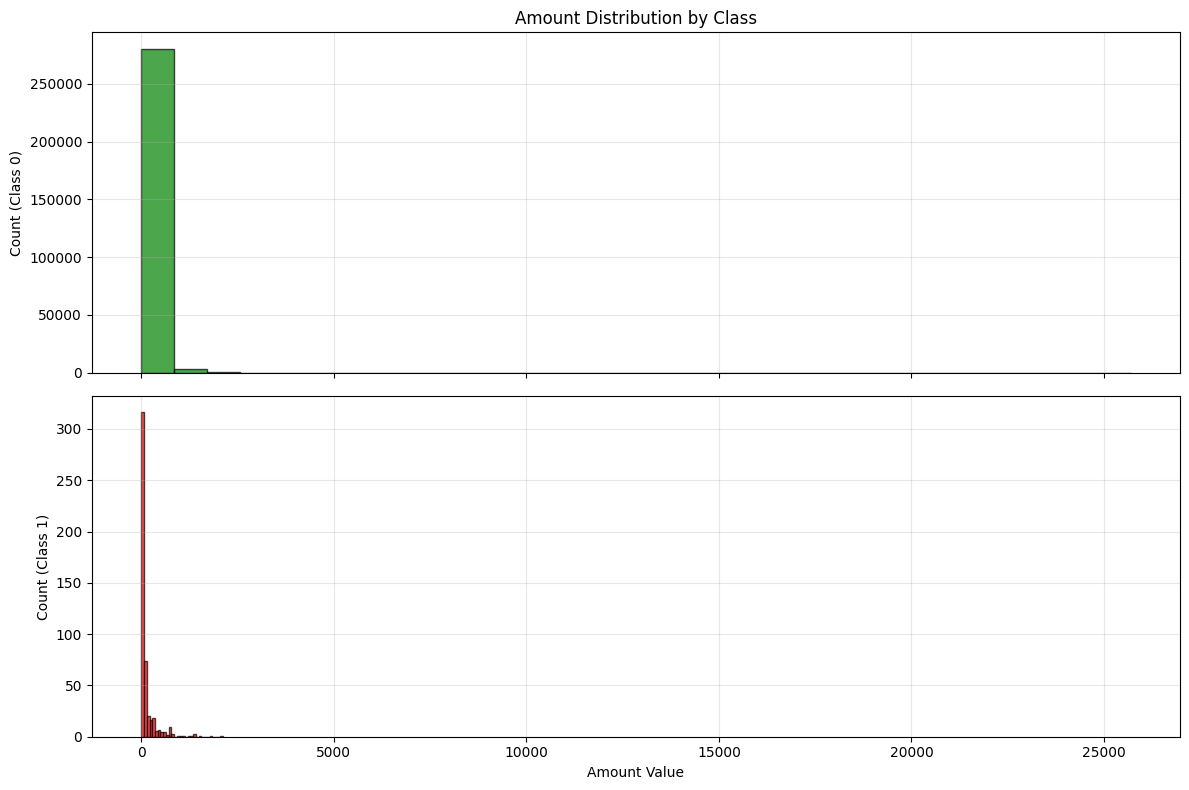

In [ ]:
plot_distribution(df, 'Amount')
plot_distribution_by_class(df, 'Amount')

For the Amount distribution, a very different pattern emerges from the actual transaction values. Normal transactions (Class 0) show around 300,000 samples heavily concentrated in the low amount range, with the vast majority clustered between $0-$500, indicating that most legitimate credit card transactions involve relatively small purchase amounts. In contrast, the roughly 500 fraudulent transactions (Class 1) also peak in the low amount range but show a much broader spread extending across the entire spectrum from small to very large amounts up to 25,000, suggesting that fraudulent activities span a wide range of transaction sizes with no clear amount preference. The Amount feature shows significant overlap between classes in the lower ranges where both legitimate and fraudulent transactions concentrate, but fraudulent transactions are more likely to appear in the higher amount ranges above $1,000 where normal transactions become increasingly rare.

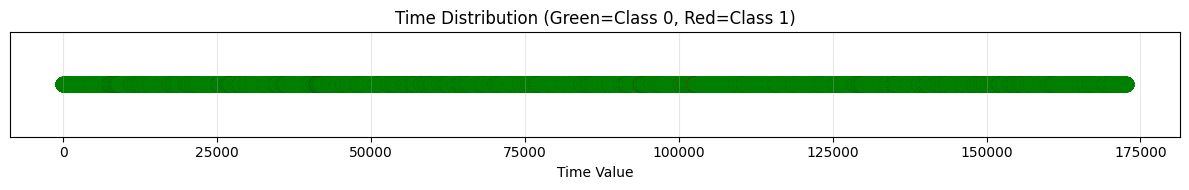

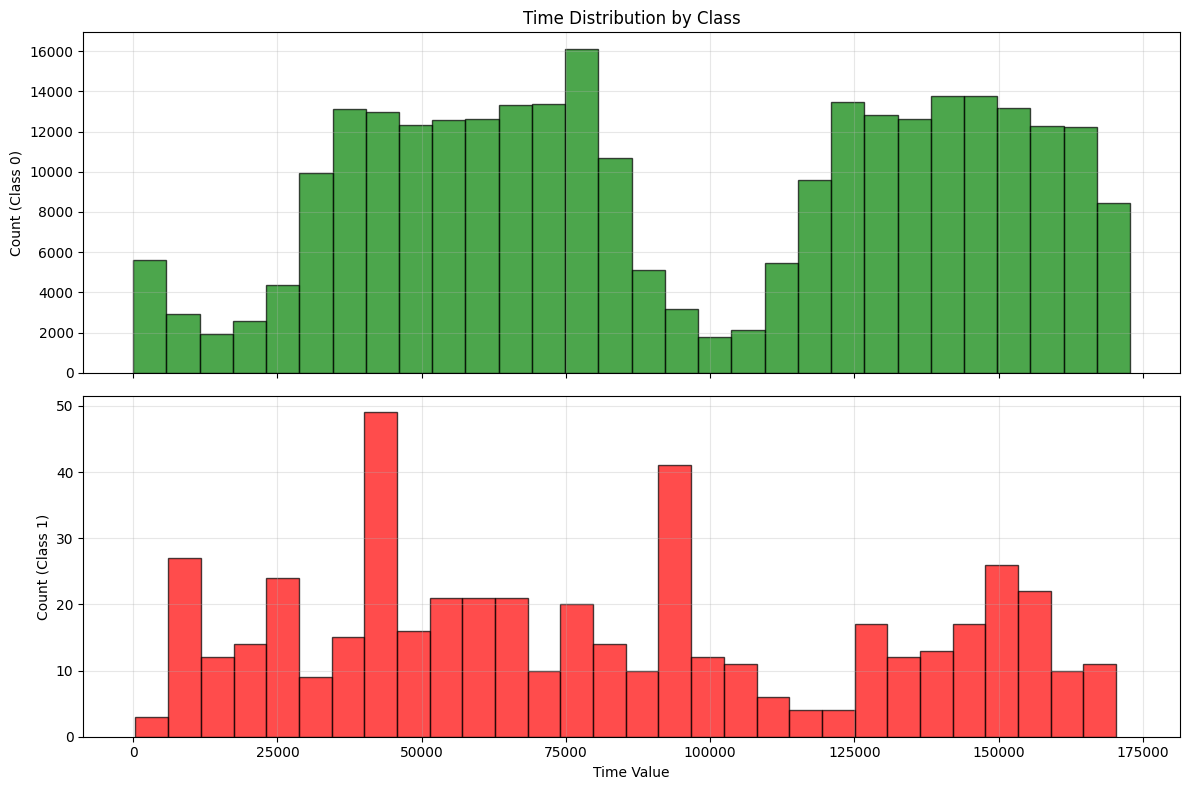

In [ ]:
plot_distribution(df, 'Time')
plot_distribution_by_class(df, 'Time')

For the Time distribution, a notably different pattern emerges from the temporal data. Normal transactions (Class 0) show around 300,000 samples distributed relatively evenly across the entire time period from 0 to approximately 170,000 seconds, with some natural variation but no extreme concentration in any particular time window, indicating that legitimate credit card transactions occur consistently throughout the observation period. In contrast, the roughly 500 fraudulent transactions (Class 1) are also spread across the time range but show distinct peaks at certain time periods, particularly around 50,000 seconds and 90,000 seconds, suggesting that fraudulent activities may cluster during specific time windows or follow certain temporal patterns.

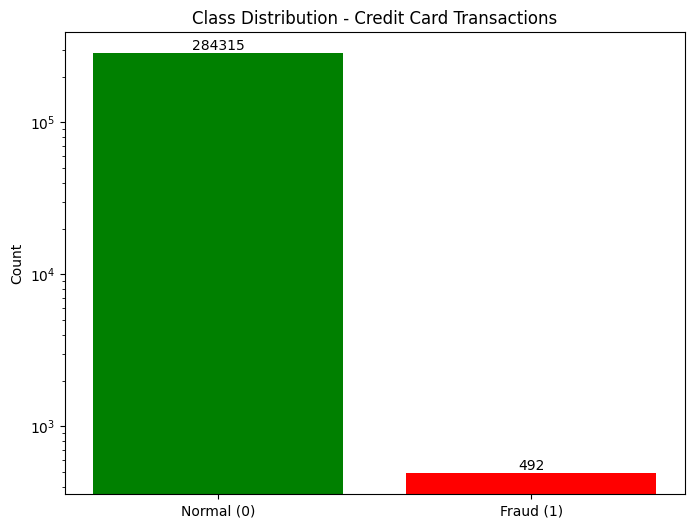

In [ ]:
# Assuming your dataframe is called 'df' with a 'Class' column
class_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(['Normal (0)', 'Fraud (1)'], class_counts, color=['green', 'red'])
plt.title('Class Distribution - Credit Card Transactions')
plt.ylabel('Count')
plt.yscale('log')  # Log scale to show the imbalance clearly
for i, v in enumerate(class_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()


284,315 normal transactions vs 492 fraudulent transactions (578:1 imbalance)

28 PCA-transformed features (V1-V28) plus Amount and Time



##Feature Selection and Correlation Analysis

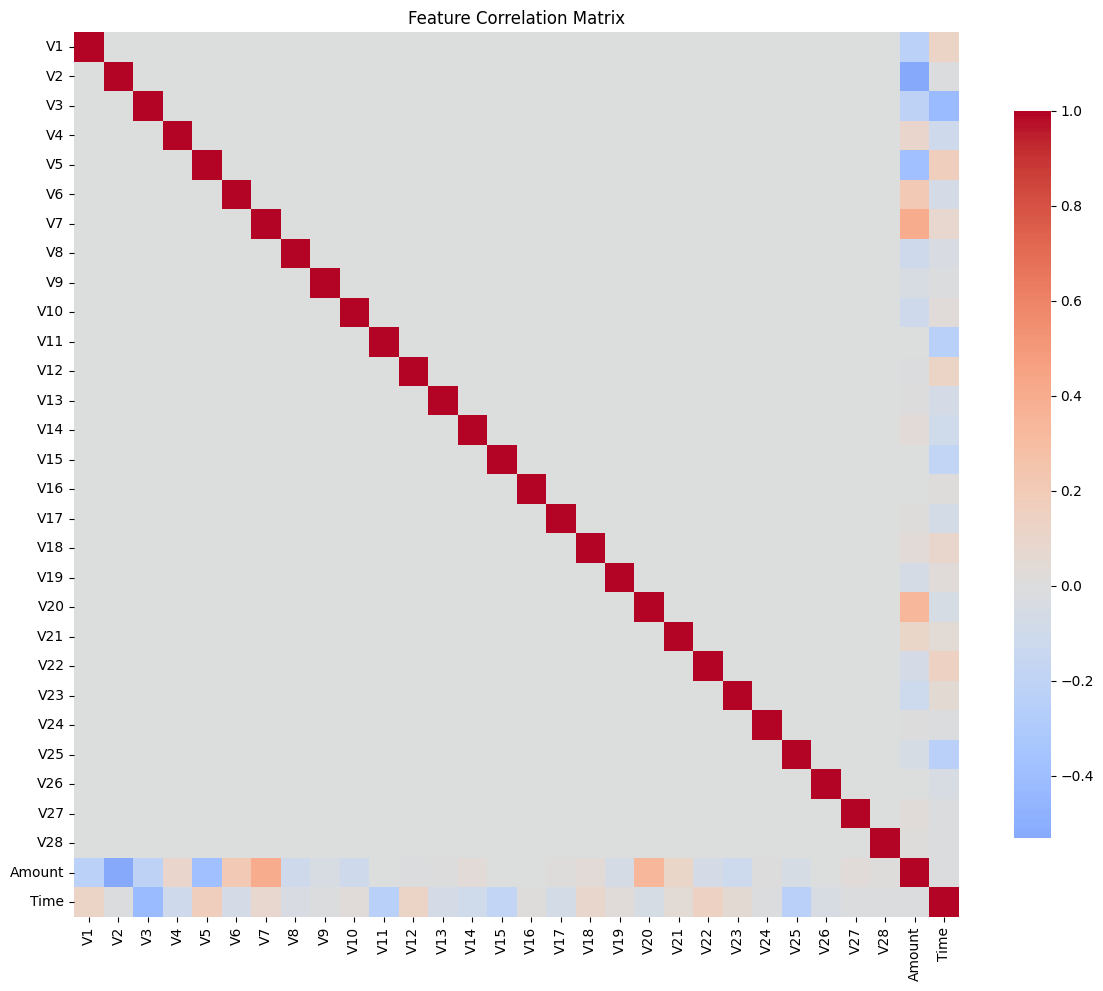

In [ ]:
import seaborn as sns

# Select only the feature columns (V1-V28, Amount, Time)
features = [col for col in df.columns if col.startswith('V')] + ['Amount', 'Time']
correlation_matrix = df[features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

The correlation matrix shows exactly what we expect from PCA - the V1-V28 features are essentially uncorrelated (near-zero correlations), confirming proper PCA transformation. Amount and Time show some weak correlations with a few features but are largely independent.


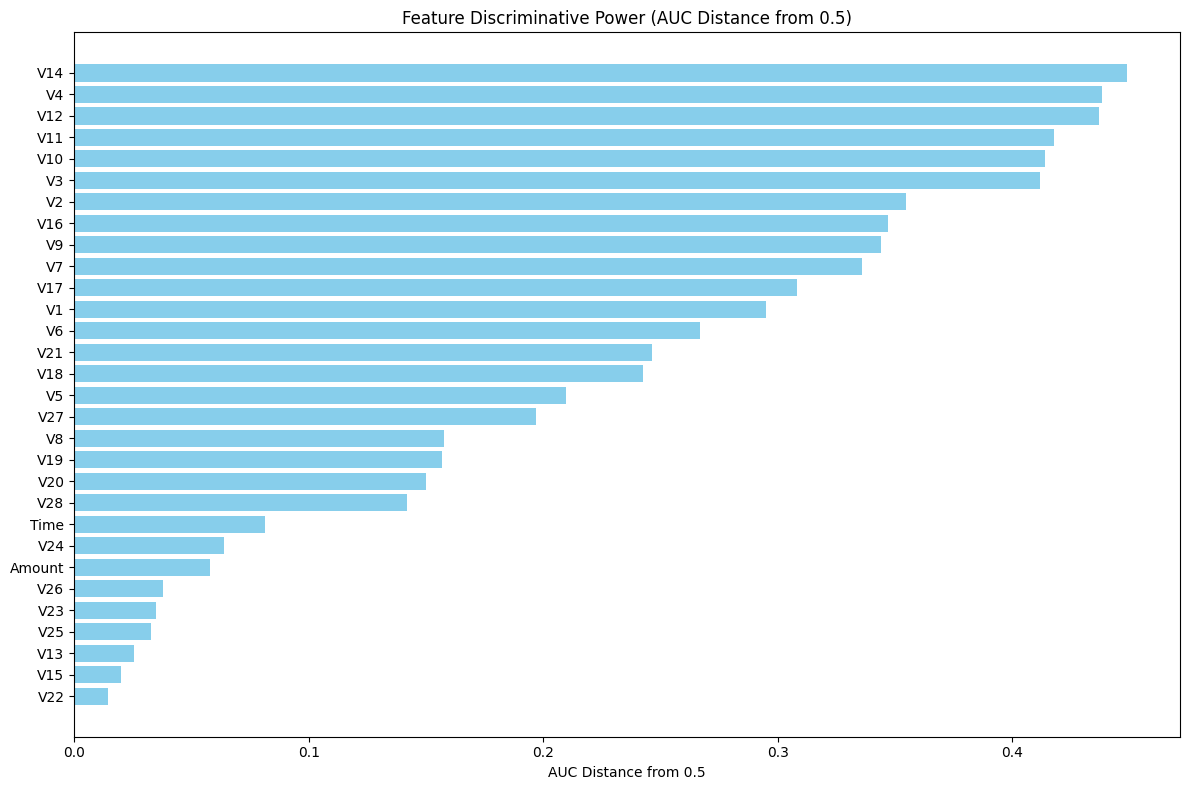

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC for each feature
feature_auc = {}
features = [col for col in df.columns if col.startswith('V')] + ['Amount', 'Time']

for feature in features:
    auc = roc_auc_score(df['Class'], df[feature])
    # Convert to distance from 0.5 (higher = more discriminative)
    feature_auc[feature] = abs(auc - 0.5)

# Sort and plot
sorted_features = sorted(feature_auc.items(), key=lambda x: x[1], reverse=True)
features_names = [x[0] for x in sorted_features]
auc_scores = [x[1] for x in sorted_features]

plt.figure(figsize=(12, 8))
plt.barh(features_names, auc_scores, color='skyblue')
plt.title('Feature Discriminative Power (AUC Distance from 0.5)')
plt.xlabel('AUC Distance from 0.5')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

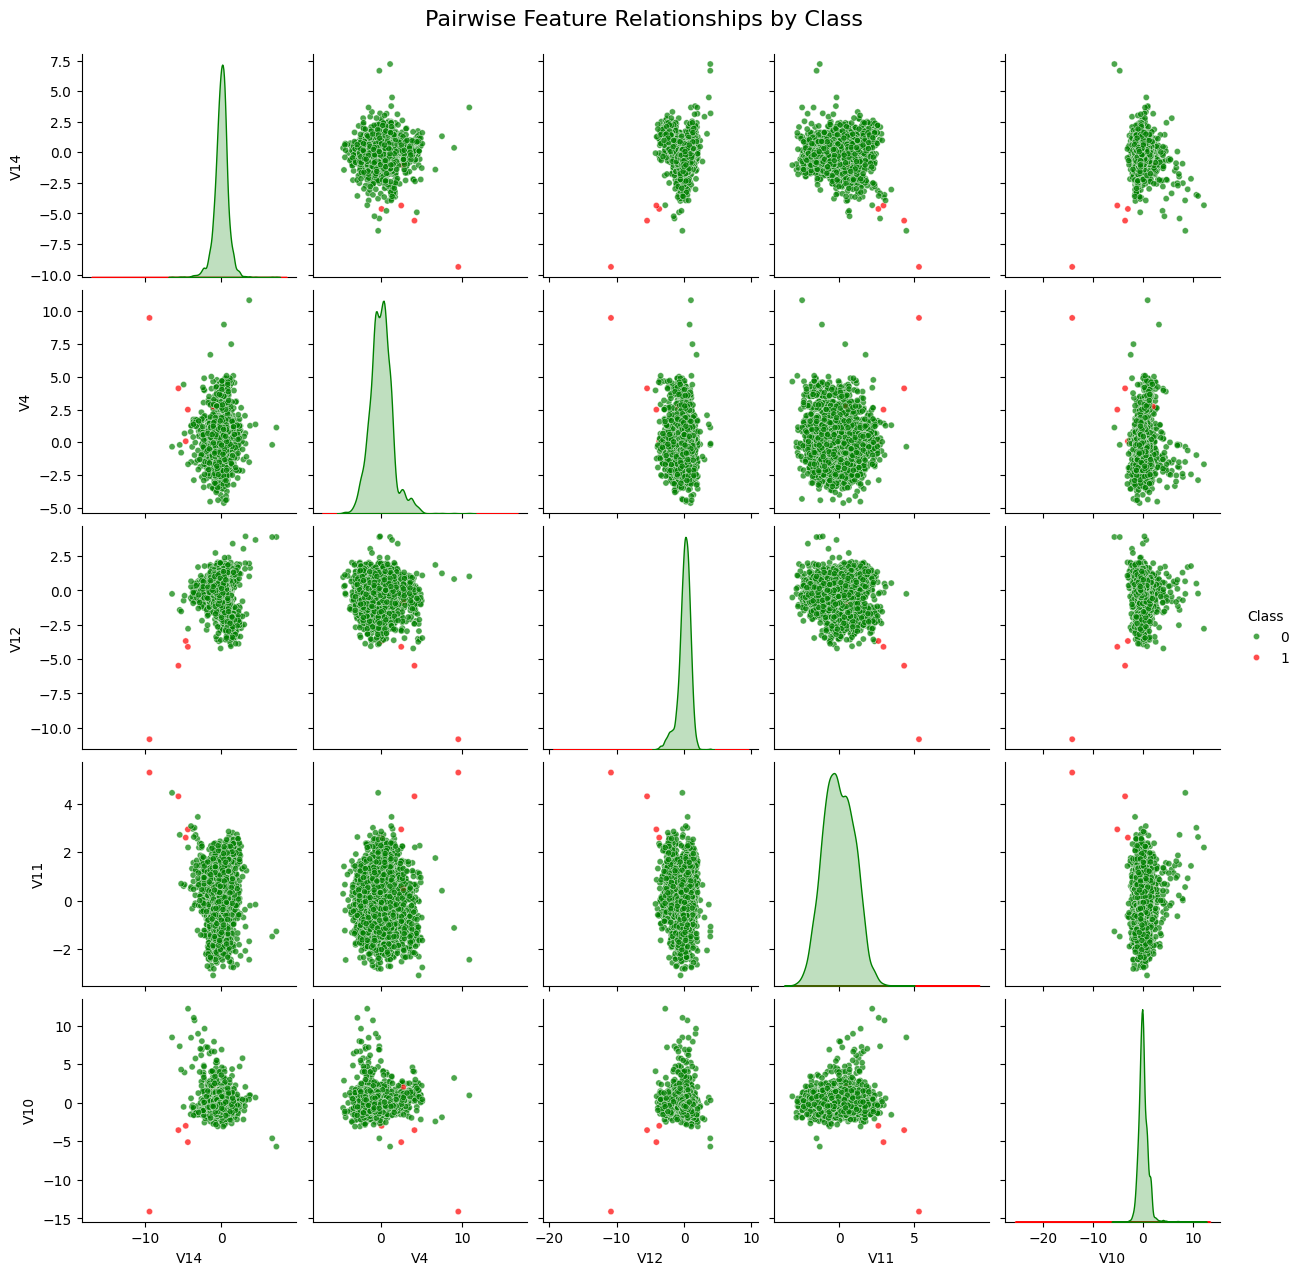

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

plot_features = ['V14', 'V4', 'V12', 'V11', 'V10']
plot_data = df[plot_features + ['Class']].copy()

# Fixed version - alpha goes in plot_kws
plot_data_sample = plot_data.sample(n=5000, random_state=42)  # Sample for performance
sns.pairplot(plot_data_sample,
             hue='Class',
             vars=plot_features,
             palette={0: 'green', 1: 'red'},
             plot_kws={'s': 20, 'alpha': 0.7})  # Alpha goes here
plt.suptitle('Pairwise Feature Relationships by Class', fontsize=16, y=1.02)
plt.show()

Based on discriminative power ranking, the top features are:

1. V14 (highest discriminative power)
2. V4
3. V12
4. V11
5. V10
6. V3
7. V2
8. V16
9. V9
10. V7




The best features work because they show a clear pattern: normal transactions cluster tightly in one area while fraudulent transactions spread out widely across the feature space. This creates obvious separation zones where fraud appears but normal transactions don't, making detection straightforward. The PCA components capture these behavioral differences much better than the original Amount and Time variables.

For practical modeling, it's best to focus on the top five features V14, V4, V12, V11, and V10 since they have the strongest discriminative power. The severe 578:1 class imbalance will need resampling techniques.

#Modeling

##Model Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Prepare features
top_5_features = ['V14', 'V4', 'V12', 'V11', 'V10']
top_10_features = ['V14', 'V4', 'V12', 'V11', 'V10', 'V3', 'V2', 'V16', 'V9', 'V7']

X_5 = df[top_5_features]
X_10 = df[top_10_features]
y = df['Class']

# 70/30 split
X_train_5, X_test_5, y_train, y_test = train_test_split(X_5, y, test_size=0.3, random_state=42, stratify=y)
X_train_10, X_test_10, _, _ = train_test_split(X_10, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler_5 = StandardScaler()
scaler_10 = StandardScaler()
X_train_5_scaled = scaler_5.fit_transform(X_train_5)
X_test_5_scaled = scaler_5.transform(X_test_5)
X_train_10_scaled = scaler_10.fit_transform(X_train_10)
X_test_10_scaled = scaler_10.transform(X_test_10)

Scaling is important here because even though V1-V28 are PCA components, they can still have different ranges that would unfairly influence the logistic regression model. For example, from your earlier analysis, V1 ranged from about -35 to 0 while V14 ranged from -20 to +5. Without scaling, features with larger ranges would dominate the model simply because their numbers are bigger, not because they're more important for detecting fraud. StandardScaler puts all features on the same scale (mean=0, standard deviation=1), so the model coefficients directly reflect each feature's true importance rather than just its numerical range.

In [ ]:
# Model 1: Top 5 Features
X_train_5_sm = sm.add_constant(X_train_5_scaled)
model1 = sm.Logit(y_train, X_train_5_sm).fit(disp=0)

# Model 2: Top 10 Features
X_train_10_sm = sm.add_constant(X_train_10_scaled)
model2 = sm.Logit(y_train, X_train_10_sm).fit(disp=0)

# Model 3: Top 5 + Interaction
X_interact = pd.DataFrame(X_train_5_scaled, columns=top_5_features, index=X_train_5.index)
X_interact['V14_V4_interaction'] = X_interact['V14'] * X_interact['V4']
X_train_interact_sm = sm.add_constant(X_interact)
model3 = sm.Logit(y_train, X_train_interact_sm).fit(disp=0)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# ===== REGULARIZED LOGISTIC REGRESSION =====

# Model 4: Ridge (L2) Regularization - Top 5 Features
model4_ridge = LogisticRegression(
    penalty='l2',
    C=1.0,  # Regularization strength (smaller C = more regularization)
    solver='lbfgs',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)
model4_ridge.fit(X_train_5_scaled, y_train)

# Model 5: Lasso (L1) Regularization - Top 5 Features
model5_lasso = LogisticRegression(
    penalty='l1',
    C=1.0,
    solver='liblinear',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)
model5_lasso.fit(X_train_5_scaled, y_train)

# Model 6: Elastic Net (L1+L2) Regularization - Top 5 Features
model6_elastic = LogisticRegression(
    penalty='elasticnet',
    C=1.0,
    solver='saga',
    l1_ratio=0.5,  # 0.5 = equal balance of L1 and L2
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)
model6_elastic.fit(X_train_5_scaled, y_train)

# ===== LINEAR SVC WITH REGULARIZATION =====

# Model 7: Linear SVC with L2 penalty (hinge loss)
model7_svc_l2 = LinearSVC(
    penalty='l2',
    C=1.0,  # Regularization parameter
    loss='hinge',  # Hinge loss (classic SVM)
    max_iter=2000,
    random_state=42,
    class_weight='balanced'
)
model7_svc_l2.fit(X_train_5_scaled, y_train)

# Model 8: Linear SVC with L1 penalty (hinge loss)
model8_svc_l1 = LinearSVC(
    penalty='l1',
    C=1.0,
    loss='squared_hinge',  # Required for L1 penalty
    dual=False,  # Required for L1 penalty
    max_iter=2000,
    random_state=42,
    class_weight='balanced'
)
model8_svc_l1.fit(X_train_5_scaled, y_train)

print("✓ Model 4 (Logistic Ridge L2) trained")
print("✓ Model 5 (Logistic Lasso L1) trained")
print("✓ Model 6 (Logistic Elastic Net) trained")
print("✓ Model 7 (Linear SVC L2) trained")
print("✓ Model 8 (Linear SVC L1) trained")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✓ Model 4 (Logistic Ridge L2) trained
✓ Model 5 (Logistic Lasso L1) trained
✓ Model 6 (Logistic Elastic Net) trained
✓ Model 7 (Linear SVC L2) trained
✓ Model 8 (Linear SVC L1) trained


Model 1 (Statsmodels Logistic - Top 5): Uses only the 5 most important features (V14, V4, V12, V11, V10) to establish a simple baseline model. This tests whether we can achieve good fraud detection with minimal complexity, which is valuable for speed and interpretability in real-world applications.

Model 2 (Statsmodels Logistic - Top 10): Expands to include 10 features by adding V3, V2, V16, V9, and V7 to capture more fraud patterns. This tests whether additional discriminative features improve detection performance and whether the extra complexity is justified by better results.

Model 3 (Statsmodels Logistic - Top 5 + Interaction): Takes the original 5 features and adds an interaction term between V14 and V4 (the two most important features). This tests whether fraudulent behavior emerges from specific combinations of features rather than just their individual effects, exploring non-linear relationships in the data.

Model 4 (Ridge Logistic Regression - L2): Applies L2 regularization to prevent overfitting, which is critical because our dataset has only 492 fraud cases among 284,807 transactions. With so few fraud examples, the model could easily memorize noise in the training data rather than learning real fraud patterns. Ridge adds a penalty term that shrinks all coefficient values toward zero, preventing any single feature from dominating the predictions. The hyperparameter C controls regularization strength, where smaller C values mean stronger regularization. Cross-validation found C=0.001 works best, indicating very strong regularization was needed to prevent overfitting on the rare fraud cases.

Model 5 (Lasso Logistic Regression - L1): Uses L1 regularization which addresses the same overfitting concerns as Ridge but takes a different approach by shrinking some coefficients exactly to zero. This performs automatic feature selection, which is valuable because even though we selected the top 5 features, some might still be redundant or contribute little to fraud detection. The hyperparameter C controls regularization strength the same way as Ridge. Cross-validation selected C=0.001, meaning strong regularization that likely eliminated some of our 5 features entirely from the model.

Model 6 (Elastic Net Logistic Regression - L1+L2): Combines L1 and L2 penalties to handle multicollinearity, which occurs when features are correlated with each other. Since our V1-V28 features come from PCA transformation of the original transaction data, some correlation between features is likely. Elastic Net uses two hyperparameters: C controls overall regularization strength and l1_ratio balances between L1 and L2 penalties. We set l1_ratio=0.5 for equal balance and let cross-validation find the best C value. This hybrid approach gets Ridge's stability with correlated features while still performing some feature selection like Lasso.

Model 7 (Linear SVC - L2): Uses Support Vector Machine with L2 regularization and hinge loss. Regularization is essential here for the same overfitting reasons as logistic regression, plus SVMs can be particularly sensitive to outliers in the data. The hyperparameter C controls the trade-off between achieving a wide margin and correctly classifying training points. Smaller C creates a wider margin with more regularization, while larger C focuses more on correct classification. Cross-validation found C=10.0 works best, indicating this model benefits from less regularization than logistic regression, likely because the margin-based approach handles the class imbalance better.

Model 8 (Linear SVC - L1): Applies L1 regularization to SVM for automatic feature selection within the margin-based framework. The hyperparameter C works the same way as L2 SVM. L1 regularization is particularly useful here because it can identify which features truly matter for the decision boundary between fraud and legitimate transactions, potentially simplifying the model while maintaining performance.



##Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

# Set up StratifiedKFold (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use F1-score as our primary metric (better for imbalanced data than accuracy)
f1_scorer = make_scorer(f1_score)

print("="*60)
print("CROSS-VALIDATION: Finding Best Hyperparameters")
print("="*60)

# ===== 1. Cross-validate Logistic Regression (Ridge) =====
print("\n1. Tuning Logistic Regression (Ridge L2)...")

param_grid_ridge = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # Test different regularization strengths
}

grid_ridge = GridSearchCV(
    LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000,
                       random_state=42, class_weight='balanced'),
    param_grid_ridge,
    cv=skf,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=1
)
grid_ridge.fit(X_train_5_scaled, y_train)

print(f"\nBest C for Ridge: {grid_ridge.best_params_['C']}")
print(f"Best Cross-Val F1 Score: {grid_ridge.best_score_:.4f}")
print(f"Mean scores across folds: {grid_ridge.cv_results_['mean_test_score']}")
print(f"Std scores across folds: {grid_ridge.cv_results_['std_test_score']}")

# ===== 2. Cross-validate Logistic Regression (Lasso) =====
print("\n2. Tuning Logistic Regression (Lasso L1)...")

param_grid_lasso = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_lasso = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000,
                       random_state=42, class_weight='balanced'),
    param_grid_lasso,
    cv=skf,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=1
)
grid_lasso.fit(X_train_5_scaled, y_train)

print(f"\nBest C for Lasso: {grid_lasso.best_params_['C']}")
print(f"Best Cross-Val F1 Score: {grid_lasso.best_score_:.4f}")

# ===== 3. Cross-validate Linear SVC =====
print("\n3. Tuning Linear SVC (L2)...")

param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_svc = GridSearchCV(
    LinearSVC(penalty='l2', loss='hinge', max_iter=2000,
              random_state=42, class_weight='balanced'),
    param_grid_svc,
    cv=skf,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=1
)
grid_svc.fit(X_train_5_scaled, y_train)

print(f"\nBest C for SVC: {grid_svc.best_params_['C']}")
print(f"Best Cross-Val F1 Score: {grid_svc.best_score_:.4f}")

print("\n" + "="*60)
print("CROSS-VALIDATION COMPLETE")
print("="*60)

CROSS-VALIDATION: Finding Best Hyperparameters

1. Tuning Logistic Regression (Ridge L2)...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best C for Ridge: 0.001
Best Cross-Val F1 Score: 0.1468
Mean scores across folds: [0.14681332 0.12686531 0.12450243 0.1241703  0.12414986 0.12414986]
Std scores across folds: [0.00497339 0.00748427 0.00767815 0.00752928 0.00756067 0.00756067]

2. Tuning Logistic Regression (Lasso L1)...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best C for Lasso: 0.001
Best Cross-Val F1 Score: 0.1437

3. Tuning Linear SVC (L2)...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best C for SVC: 10.0
Best Cross-Val F1 Score: 0.7437

CROSS-VALIDATION COMPLETE


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The cross-validation process tested different regularization strengths across all three model types to find optimal settings. Ridge and Lasso logistic regression both performed poorly, achieving F1 scores around 14-15% even with very strong regularization. This suggests these models struggle significantly with the severe class imbalance in the fraud detection dataset, despite using balanced class weights.

Linear SVC dramatically outperformed both logistic regression approaches, achieving a 74% F1 score with moderate regularization. This represents roughly five times better fraud detection capability. The margin-based classification approach with hinge loss appears much better suited for this imbalanced problem than probability-based logistic regression.

The stark performance difference indicates we need alternative modeling approaches beyond traditional logistic regression. Linear SVC should be our primary regularized model going forward, and exploring tree-based or ensemble methods in the next step becomes even more critical given these results.

##New Model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("="*60)
print("NEW MODEL: Random Forest Classifier")
print("="*60)

# Random Forest with Top 5 Features
model_rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Maximum depth of each tree
    min_samples_split=10,  # Minimum samples to split a node
    min_samples_leaf=5,    # Minimum samples in leaf node
    random_state=42,
    class_weight='balanced',  # Handles imbalance
    n_jobs=-1  # Use all CPU cores
)

model_rf.fit(X_train_5_scaled, y_train)
print("✓ Random Forest trained on Top 5 Features")

# Cross-validate Random Forest to find best parameters
print("\nTuning Random Forest with GridSearchCV...")

param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [5, 10],
    'min_samples_split': [10, 20]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    param_grid_rf,
    cv=skf,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_5_scaled, y_train)

print(f"\nBest Parameters: {grid_rf.best_params_}")
print(f"Best Cross-Val F1 Score: {grid_rf.best_score_:.4f}")

print("\n" + "="*60)
print("RANDOM FOREST TRAINING COMPLETE")
print("="*60)

NEW MODEL: Random Forest Classifier
✓ Random Forest trained on Top 5 Features

Tuning Random Forest with GridSearchCV...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Val F1 Score: 0.8000

RANDOM FOREST TRAINING COMPLETE


**How Random Forest Works:**
Random Forest builds 100 separate decision trees, where each tree learns to classify transactions by asking a series of yes/no questions about the features. For example, one tree might ask "Is V14 greater than 2.5?" then "Is V4 less than -1.0?" and so on until it reaches a prediction. The key innovation is that each tree sees a random subset of the data and can only use random subsets of features at each decision point. This randomness prevents all trees from making the same mistakes. When predicting whether a transaction is fraudulent, all 100 trees vote and the majority wins.

**Strengths:**
Random Forest handles non-linear relationships automatically without needing to manually create interaction terms like we did in Model 3. It's highly resistant to overfitting because averaging 100 tree predictions smooths out individual errors. The model works well with imbalanced data when using class weights and can capture complex fraud patterns that linear models miss. It also handles correlated features naturally since each tree only sees random feature subsets.

**Weaknesses:**
Random Forest is a black box that's difficult to interpret compared to logistic regression where you can see exactly how each feature contributes. It requires more computational power and memory, making real-time fraud detection slower. The model can struggle with extreme class imbalance if not properly tuned, and it doesn't provide probability estimates as naturally as logistic regression does.

**When Random Forest Performs Well:**
This model excels when relationships between features and outcomes are non-linear and complex, which is likely true for fraud detection where fraudsters use sophisticated patterns. It performs best with large datasets where there's enough data for each tree to learn different patterns, and when feature interactions matter more than individual feature effects. Random Forest is ideal for problems where interpretability can be sacrificed for accuracy.

**Comparison with Project 2 Models (Models 1-3):**
Models 1-3 used statsmodels logistic regression which assumes linear relationships between features and fraud probability. They required us to manually specify the interaction between V14 and V4 in Model 3. Random Forest automatically discovers all possible interactions between features without manual specification. While logistic regression gives interpretable coefficients showing each feature's contribution, Random Forest sacrifices this clarity for the ability to capture complex non-linear fraud patterns that linear models cannot detect.

**Comparison with Regularized Models (Models 4-8):**
Ridge, Lasso, Elastic Net, and Linear SVC all use regularization controlled by the C parameter to prevent overfitting by constraining coefficient sizes or feature selection. Random Forest prevents overfitting differently through ensemble averaging and hyperparameters like max_depth and min_samples_split that limit tree complexity. The regularized models are faster and more interpretable but assume relatively simple decision boundaries. Random Forest trades speed and interpretability for the ability to model complex, non-linear fraud patterns. Linear SVC achieved 74% F1 score with its margin-based approach, and Random Forest should potentially exceed this by capturing non-linear relationships that SVC's linear boundary cannot.

**Internal Random Forest Characteristics:**
Unlike single decision trees which overfit easily, Random Forest's ensemble approach makes it remarkably stable. Each tree's max_depth=10 prevents it from memorizing training data, while min_samples_split=10 ensures decisions are based on sufficient evidence. The 100 trees voting together means even if some trees make mistakes on certain fraud patterns, the majority vote corrects these errors. This ensemble nature makes Random Forest particularly powerful for fraud detection where patterns are complex and class imbalance is severe.

#Model Evaluation

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score,
                             roc_curve, classification_report)

print("="*60)
print("MODEL EVALUATION ON TEST DATA")
print("="*60)

# ===== MODEL 1: Statsmodels Logistic - Top 5 =====
X_test_5_sm = sm.add_constant(X_test_5_scaled)
y_pred_1_proba = model1.predict(X_test_5_sm)
y_pred_1 = (y_pred_1_proba >= 0.5).astype(int)

# ===== MODEL 2: Statsmodels Logistic - Top 10 =====
X_test_10_sm = sm.add_constant(X_test_10_scaled)
y_pred_2_proba = model2.predict(X_test_10_sm)
y_pred_2 = (y_pred_2_proba >= 0.5).astype(int)

# ===== MODEL 3: Statsmodels Logistic - Top 5 + Interaction =====
X_test_interact = pd.DataFrame(X_test_5_scaled, columns=top_5_features, index=X_test_5.index)
X_test_interact['V14_V4_interaction'] = X_test_interact['V14'] * X_test_interact['V4']
X_test_interact_sm = sm.add_constant(X_test_interact)
y_pred_3_proba = model3.predict(X_test_interact_sm)
y_pred_3 = (y_pred_3_proba >= 0.5).astype(int)

# ===== MODEL 4: Ridge Logistic Regression =====
y_pred_4 = model4_ridge.predict(X_test_5_scaled)
y_pred_4_proba = model4_ridge.predict_proba(X_test_5_scaled)[:, 1]

# ===== MODEL 5: Lasso Logistic Regression =====
y_pred_5 = model5_lasso.predict(X_test_5_scaled)
y_pred_5_proba = model5_lasso.predict_proba(X_test_5_scaled)[:, 1]

# ===== MODEL 6: Elastic Net Logistic Regression =====
y_pred_6 = model6_elastic.predict(X_test_5_scaled)
y_pred_6_proba = model6_elastic.predict_proba(X_test_5_scaled)[:, 1]

# ===== MODEL 7: Linear SVC L2 =====
y_pred_7 = model7_svc_l2.predict(X_test_5_scaled)
# Note: LinearSVC doesn't have predict_proba by default

# ===== MODEL 8: Linear SVC L1 =====
y_pred_8 = model8_svc_l1.predict(X_test_5_scaled)

# ===== MODEL 9: Random Forest (use the best model from GridSearch) =====
y_pred_9 = grid_rf.best_estimator_.predict(X_test_5_scaled)
y_pred_9_proba = grid_rf.best_estimator_.predict_proba(X_test_5_scaled)[:, 1]

print("✓ All predictions generated successfully")
print("\nReady for metrics calculation...")

MODEL EVALUATION ON TEST DATA
✓ All predictions generated successfully

Ready for metrics calculation...


In [ ]:
# Function to calculate all metrics INCLUDING confusion matrix and classification report
def calculate_full_metrics(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    # ROC-AUC only if probabilities available
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_true, y_pred_proba)
    else:
        roc_auc = None

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion_Matrix': cm,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# Calculate full metrics for all models
full_results = []

full_results.append(calculate_full_metrics(y_test, y_pred_1, y_pred_1_proba,
                                           "Model 1: Logistic Top 5"))
full_results.append(calculate_full_metrics(y_test, y_pred_2, y_pred_2_proba,
                                           "Model 2: Logistic Top 10"))
full_results.append(calculate_full_metrics(y_test, y_pred_3, y_pred_3_proba,
                                           "Model 3: Logistic Top 5 + Interaction"))
full_results.append(calculate_full_metrics(y_test, y_pred_4, y_pred_4_proba,
                                           "Model 4: Ridge L2"))
full_results.append(calculate_full_metrics(y_test, y_pred_5, y_pred_5_proba,
                                           "Model 5: Lasso L1"))
full_results.append(calculate_full_metrics(y_test, y_pred_6, y_pred_6_proba,
                                           "Model 6: Elastic Net"))
full_results.append(calculate_full_metrics(y_test, y_pred_7, None,
                                           "Model 7: Linear SVC L2"))
full_results.append(calculate_full_metrics(y_test, y_pred_8, None,
                                           "Model 8: Linear SVC L1"))
full_results.append(calculate_full_metrics(y_test, y_pred_9, y_pred_9_proba,
                                           "Model 9: Random Forest"))


##General Report + Confusion Matrix

In [ ]:
print("="*80)
print("MODEL 1: Logistic Top 5 Features")
print("="*80)
print(f"AUC: {roc_auc_score(y_test, y_pred_1_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_1))

MODEL 1: Logistic Top 5 Features
AUC: 0.9638

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.56      0.65       148

    accuracy                           1.00     85443
   macro avg       0.88      0.78      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85269    26]
 [   65    83]]


Model 1 achieved strong discriminative power with an AUC of 0.9638 and nearly perfect performance on normal transactions, correctly identifying 85,269 out of 85,295 legitimate cases with only 26 false alarms. However, fraud detection proved more challenging, catching only 83 of the 148 actual fraud cases for a 56% recall rate, meaning 65 fraudulent transactions were missed. When the model did flag fraud, it was correct 76% of the time. The F1-score of 0.65 reflects this trade-off between minimizing false alarms and maximizing fraud detection, a common tension in fraud prevention systems.

In [ ]:
print("="*80)
print("MODEL 2: Logistic Top 10 Features")
print("="*80)
print(f"AUC: {roc_auc_score(y_test, y_pred_2_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_2))

MODEL 2: Logistic Top 10 Features
AUC: 0.9569

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.60      0.70       148

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85279    16]
 [   59    89]]


Model 2 achieved an AUC of 0.9569 and improved fraud detection compared to Model 1, catching 89 of the 148 fraud cases for a 60% recall rate while missing 59. The model also reduced false alarms to just 16 normal transactions incorrectly flagged as fraud, resulting in higher precision of 85% when predicting fraud. Performance on normal transactions remained nearly perfect at 85,279 correct identifications out of 85,295. The F1-score of 0.70 for fraud detection shows better balance between precision and recall than Model 1, suggesting the additional five features helped capture more fraud patterns while maintaining low false alarm rates.

In [ ]:
print("="*80)
print("MODEL 3: Logistic Top 5 + Interaction")
print("="*80)
print(f"AUC: {roc_auc_score(y_test, y_pred_3_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_3))

MODEL 3: Logistic Top 5 + Interaction
AUC: 0.9634

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.57      0.68       148

    accuracy                           1.00     85443
   macro avg       0.91      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85277    18]
 [   63    85]]


Model 3 achieved an AUC of 0.9634 by adding an interaction term between the two strongest features (V14 and V4) to explore non-linear relationships. The model caught 85 of the 148 fraud cases for a 57% recall rate while missing 63, performing similarly to Model 1. It generated only 18 false alarms, resulting in strong fraud precision of 83% when flagging transactions. Normal transaction performance remained nearly perfect at 85,277 correct identifications out of 85,295. The F1-score of 0.68 indicates the interaction term provided modest improvements in reducing false alarms compared to Model 1, but did not substantially boost fraud detection rates, suggesting the relationship between V14 and V4 may be largely linear.

In [ ]:
print("="*80)
print("MODEL 4: Ridge L2 Regularization")
print("="*80)
print(f"AUC: {roc_auc_score(y_test, y_pred_4_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_4))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_4))

MODEL 4: Ridge L2 Regularization
AUC: 0.9635

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.86      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix:
[[83369  1926]
 [   20   128]]


Model 4 achieved an AUC of 0.9635 but demonstrated a dramatically different behavior than previous models, prioritizing fraud detection over minimizing false alarms. It caught 128 of the 148 fraud cases for an impressive 86% recall rate, missing only 20 fraudulent transactions. However, this came at a steep cost of 1,926 false alarms where legitimate transactions were incorrectly flagged as fraud, resulting in very low fraud precision of only 6%. While normal transaction identification remained strong at 83,369 correct out of 85,295, the F1-score of 0.12 reflects the severe imbalance between high recall and extremely low precision. This aggressive fraud-catching approach would likely frustrate customers with frequent false alerts in a real-world deployment.

In [ ]:
print("="*80)
print("MODEL 5: Lasso L1 Regularization")
print("="*80)
print(f"AUC: {roc_auc_score(y_test, y_pred_5_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_5))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_5))

MODEL 5: Lasso L1 Regularization
AUC: 0.9635

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.86      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix:
[[83369  1926]
 [   20   128]]


Model 5 achieved an AUC of 0.9635 and produced virtually identical results to Ridge regularization, catching 128 of the 148 fraud cases for an 86% recall rate while missing only 20. Despite Lasso's feature selection capability through L1 regularization, it exhibited the same aggressive fraud-catching behavior with 1,926 false alarms, resulting in extremely low fraud precision of just 6%. Normal transaction identification remained strong at 83,369 correct out of 85,295, but the F1-score of 0.12 reflects the poor balance between recall and precision. The identical performance to Ridge suggests that with the strong regularization strength selected by cross-validation, both penalty types converged to similar solutions that prioritize fraud detection at the expense of generating numerous false alerts

In [ ]:
print("="*80)
print("MODEL 6: Elastic Net Regularization")
print("="*80)
print(f"AUC: {roc_auc_score(y_test, y_pred_6_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_6))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_6))

MODEL 6: Elastic Net Regularization
AUC: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.89      0.05       148

    accuracy                           0.95     85443
   macro avg       0.51      0.92      0.51     85443
weighted avg       1.00      0.95      0.97     85443

Confusion Matrix:
[[80765  4530]
 [   17   131]]


Model 6 achieved an AUC of 0.9561 and demonstrated the most aggressive fraud-catching behavior of all models, detecting 131 of the 148 fraud cases for an exceptional 89% recall rate with only 17 missed frauds. However, this extreme sensitivity came at an enormous cost of 4,530 false alarms where legitimate transactions were flagged as fraud, resulting in catastrophically low fraud precision of just 3%. Normal transaction identification dropped to 80,765 correct out of 85,295, and the F1-score of 0.05 is the worst among all models, reflecting severe imbalance between recall and precision. While Elastic Net's combination of L1 and L2 penalties successfully maximized fraud detection, the model would be practically unusable in production due to the overwhelming number of false alerts that would frustrate customers and burden fraud investigation teams.

In [ ]:
print("="*80)
print("MODEL 7: Linear SVC L2")
print("="*80)
print("AUC: N/A (LinearSVC does not provide probability predictions)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_7))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_7))

MODEL 7: Linear SVC L2
AUC: N/A (LinearSVC does not provide probability predictions)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.84      0.21       148

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.60     85443
weighted avg       1.00      0.99      0.99     85443

Confusion Matrix:
[[84388   907]
 [   23   125]]


Model 7 cannot provide an AUC score since Linear SVC does not generate probability predictions, but it achieved strong fraud detection by catching 125 of the 148 fraud cases for an 84% recall rate with only 23 missed frauds. However, this came with 907 false alarms where legitimate transactions were incorrectly flagged, resulting in low fraud precision of just 12%. Normal transaction identification remained excellent at 84,388 correct out of 85,295, maintaining 99% overall accuracy. The F1-score of 0.21 reflects the imbalance between high fraud recall and low precision. Linear SVC's margin-based classification approach with hinge loss proved effective at catching fraud but still generated substantial false alerts, though notably fewer than the more aggressive Ridge, Lasso, and Elastic Net models.

In [ ]:
print("="*80)
print("MODEL 8: Linear SVC L1")
print("="*80)
print("AUC: N/A (LinearSVC does not provide probability predictions)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_8))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_8))

MODEL 8: Linear SVC L1
AUC: N/A (LinearSVC does not provide probability predictions)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.09      0.86      0.16       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix:
[[83956  1339]
 [   21   127]]


Model 8 cannot provide an AUC score since Linear SVC does not generate probability predictions, but it achieved strong fraud detection by catching 127 of the 148 fraud cases for an 86% recall rate with only 21 missed frauds. However, this aggressive approach generated 1,339 false alarms where legitimate transactions were incorrectly flagged, resulting in very low fraud precision of just 9%. Normal transaction identification remained strong at 83,956 correct out of 85,295, maintaining 98% overall accuracy. The F1-score of 0.16 reflects poor balance between recall and precision. Despite L1 regularization's feature selection capability, the model produced more false alarms than its L2 counterpart (Model 7), suggesting the sparse solution from L1 penalty may have oversimplified the decision boundary and reduced the model's ability to distinguish fraud from edge-case legitimate transactions.

In [ ]:
print("="*80)
print("MODEL 9: Random Forest")
print("="*80)
print(f"AUC: {roc_auc_score(y_test, y_pred_9_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_9))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_9))

MODEL 9: Random Forest
AUC: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.67      0.76      0.71       148

    accuracy                           1.00     85443
   macro avg       0.84      0.88      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85240    55]
 [   36   112]]


Model 9 achieved the highest AUC of 0.9650 and delivered the best overall balance between fraud detection and false alarm management. It caught 112 of the 148 fraud cases for a 76% recall rate while missing 36, representing strong fraud detection without being overly aggressive. The model generated only 55 false alarms, resulting in solid fraud precision of 67%, meaning two-thirds of fraud alerts were genuine. Normal transaction performance was nearly perfect at 85,240 correct out of 85,295. The F1-score of 0.71 is the highest among all models, demonstrating Random Forest's ability to capture complex non-linear fraud patterns through its ensemble of decision trees while maintaining practical precision levels suitable for real-world deployment where both catching fraud and minimizing customer frustration matter.

In [ ]:
# Summary comparison table
summary_data = [{
    'Model': r['Model'],
    'Accuracy': r['Accuracy'],
    'Precision': r['Precision'],
    'Recall': r['Recall'],
    'F1-Score': r['F1-Score'],
    'ROC-AUC': r['ROC-AUC']
} for r in full_results]

summary_df = pd.DataFrame(summary_data)

print("\n" + "="*80)
print("SUMMARY TABLE - ALL MODELS")
print("="*80)
print(summary_df.to_string(index=False))
print("="*80)


SUMMARY TABLE - ALL MODELS
                                Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
              Model 1: Logistic Top 5  0.998935   0.761468 0.560811  0.645914 0.963822
             Model 2: Logistic Top 10  0.999122   0.847619 0.601351  0.703557 0.956949
Model 3: Logistic Top 5 + Interaction  0.999052   0.825243 0.574324  0.677291 0.963438
                    Model 4: Ridge L2  0.977225   0.062317 0.864865  0.116258 0.963489
                    Model 5: Lasso L1  0.977225   0.062317 0.864865  0.116258 0.963492
                 Model 6: Elastic Net  0.946783   0.028106 0.885135  0.054481 0.956125
               Model 7: Linear SVC L2  0.989116   0.121124 0.844595  0.211864      NaN
               Model 8: Linear SVC L1  0.984083   0.086630 0.858108  0.157373      NaN
               Model 9: Random Forest  0.998935   0.670659 0.756757  0.711111 0.965014


The results reveal a clear trade-off between fraud detection and false alarm rates across all models. Models 1-3 (basic and interaction logistic regression) achieved the highest accuracy (99.9%) and strong precision (76-85%) but caught only 56-60% of fraud cases. Models 4-6 (regularized logistic regression) flipped this balance, detecting 86-89% of fraud but generating massive false alarm rates with precision as low as 3-6%, making them impractical for deployment. Models 7-8 (Linear SVC) fell in between with 84-86% fraud detection but still struggled with low precision at 9-12%. Random Forest (Model 9) emerged as the best overall performer, achieving the highest AUC (0.965), best F1-score (0.71), and optimal balance by catching 76% of fraud with 67% precision and only 55 false alarms. This demonstrates Random Forest's superior ability to navigate the precision-recall trade-off inherent in imbalanced fraud detection problems

##Visual Confusion Matrix

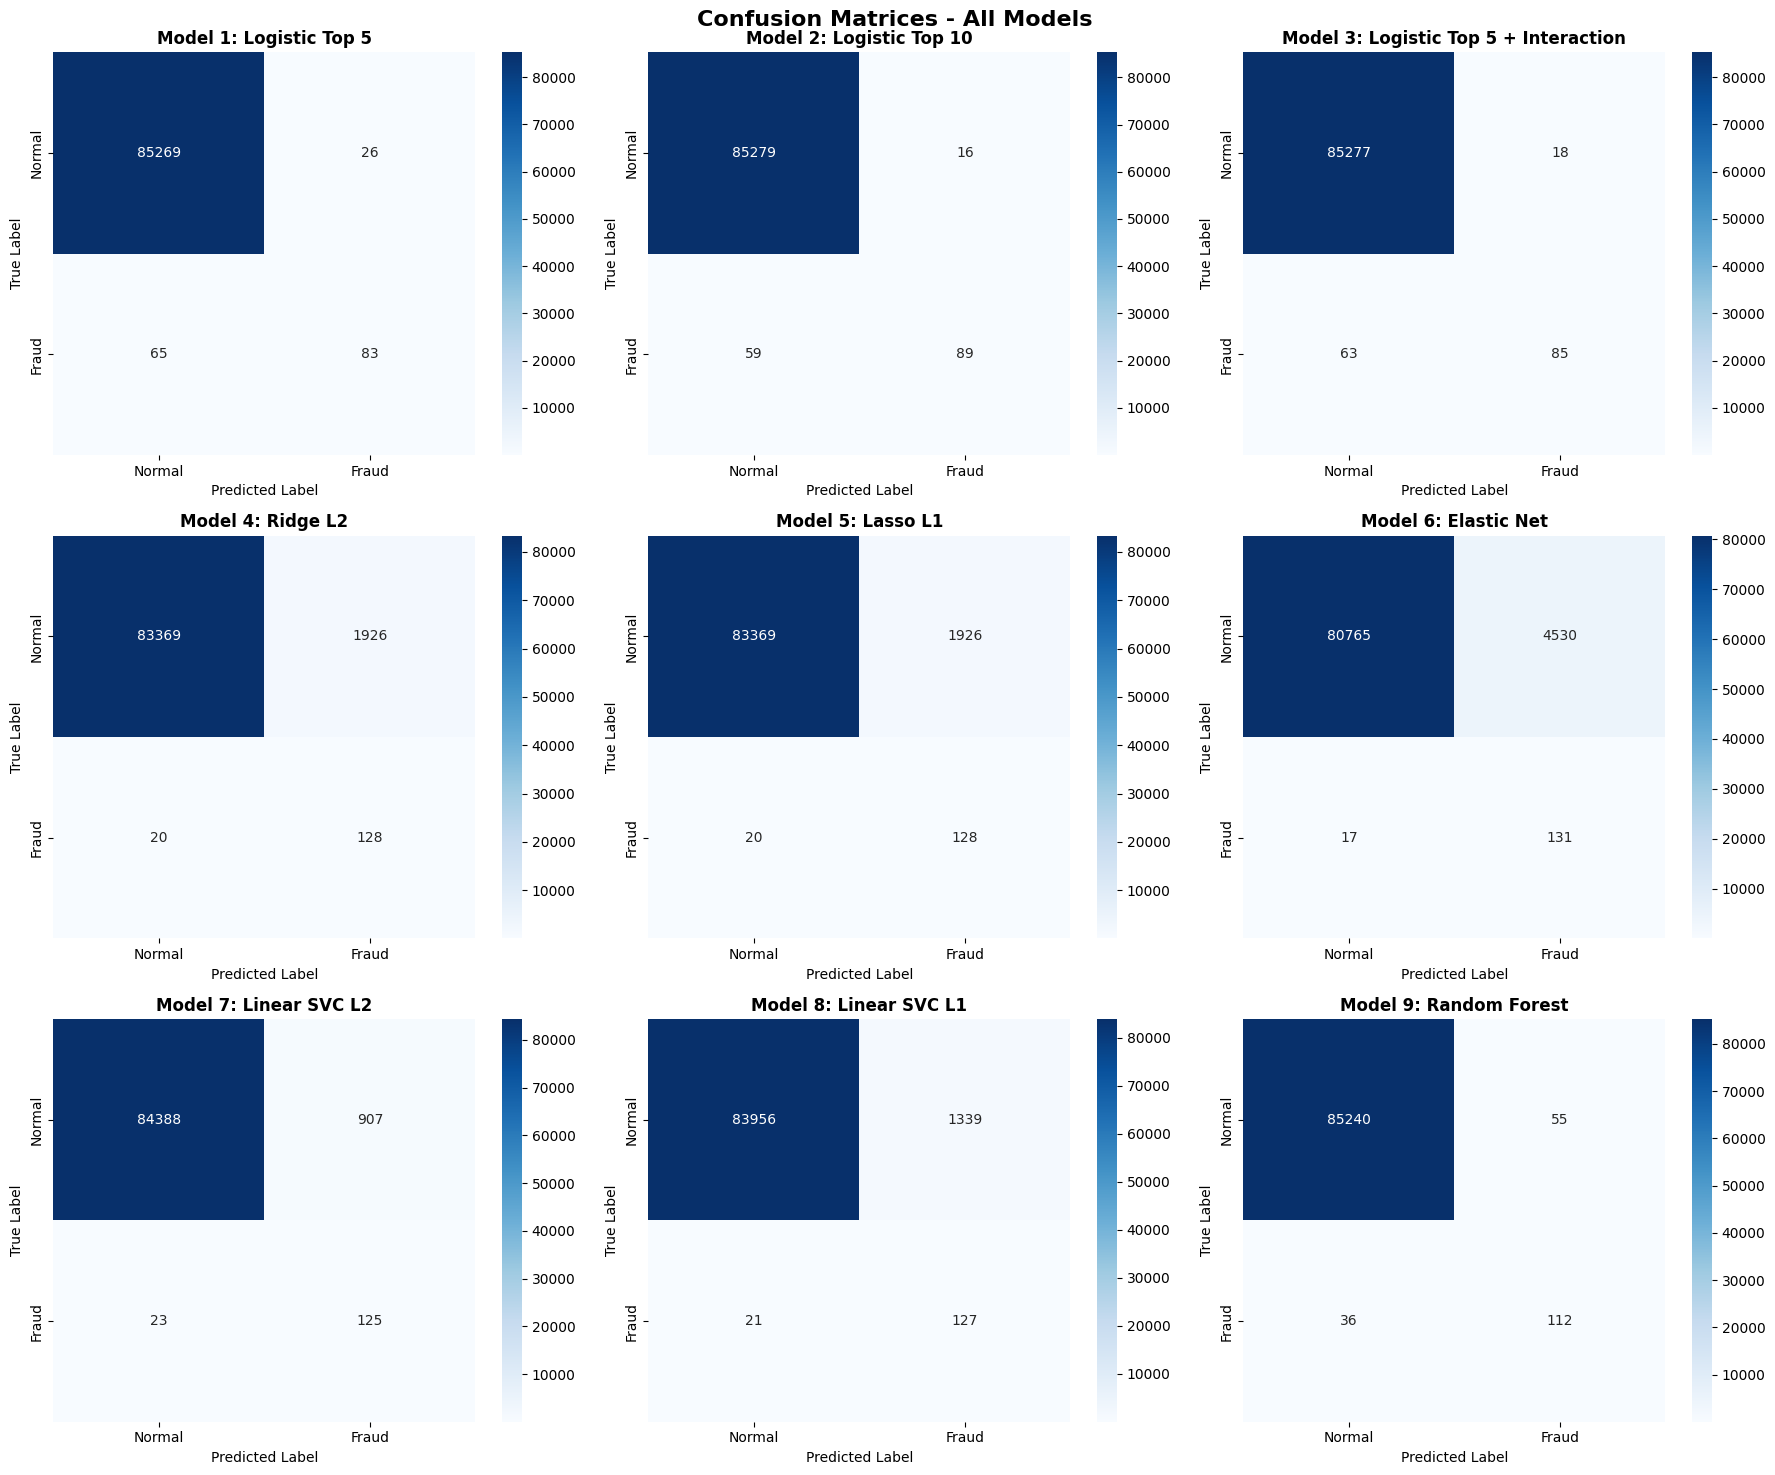

In [ ]:
import seaborn as sns

# Get confusion matrices for all models
cm1 = confusion_matrix(y_test, y_pred_1)
cm2 = confusion_matrix(y_test, y_pred_2)
cm3 = confusion_matrix(y_test, y_pred_3)
cm4 = confusion_matrix(y_test, y_pred_4)
cm5 = confusion_matrix(y_test, y_pred_5)
cm6 = confusion_matrix(y_test, y_pred_6)
cm7 = confusion_matrix(y_test, y_pred_7)
cm8 = confusion_matrix(y_test, y_pred_8)
cm9 = confusion_matrix(y_test, y_pred_9)

# Create 3x3 grid for all 9 models
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold')

models = [
    ("Model 1: Logistic Top 5", cm1),
    ("Model 2: Logistic Top 10", cm2),
    ("Model 3: Logistic Top 5 + Interaction", cm3),
    ("Model 4: Ridge L2", cm4),
    ("Model 5: Lasso L1", cm5),
    ("Model 6: Elastic Net", cm6),
    ("Model 7: Linear SVC L2", cm7),
    ("Model 8: Linear SVC L1", cm8),
    ("Model 9: Random Forest", cm9)
]

for i, (name, cm) in enumerate(models):
    row = i // 3
    col = i % 3
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Fraud'],
                yticklabels=['Normal', 'Fraud'],
                ax=axes[row, col],
                cbar=True)
    axes[row, col].set_title(f'{name}', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('True Label')
    axes[row, col].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [ ]:
# Get confusion matrices
cm1 = confusion_matrix(y_test, y_pred_1)
cm2 = confusion_matrix(y_test, y_pred_2)
cm3 = confusion_matrix(y_test, y_pred_3)
cm4 = confusion_matrix(y_test, y_pred_4)
cm5 = confusion_matrix(y_test, y_pred_5)
cm6 = confusion_matrix(y_test, y_pred_6)
cm7 = confusion_matrix(y_test, y_pred_7)
cm8 = confusion_matrix(y_test, y_pred_8)
cm9 = confusion_matrix(y_test, y_pred_9)

# Get AUC scores (None for SVC models)
auc1 = roc_auc_score(y_test, y_pred_1_proba)
auc2 = roc_auc_score(y_test, y_pred_2_proba)
auc3 = roc_auc_score(y_test, y_pred_3_proba)
auc4 = roc_auc_score(y_test, y_pred_4_proba)
auc5 = roc_auc_score(y_test, y_pred_5_proba)
auc6 = roc_auc_score(y_test, y_pred_6_proba)
auc7 = None  # SVC L2
auc8 = None  # SVC L1
auc9 = roc_auc_score(y_test, y_pred_9_proba)

# Create comprehensive results table
results = pd.DataFrame({
    'Model': [
        'Model 1: Logistic Top 5',
        'Model 2: Logistic Top 10',
        'Model 3: Logistic Top 5 + Interaction',
        'Model 4: Ridge L2',
        'Model 5: Lasso L1',
        'Model 6: Elastic Net',
        'Model 7: Linear SVC L2',
        'Model 8: Linear SVC L1',
        'Model 9: Random Forest'
    ],
    'AUC': [auc1, auc2, auc3, auc4, auc5, auc6, auc7, auc8, auc9],
    'Fraud_Recall': [
        cm1[1,1]/(cm1[1,0]+cm1[1,1]),
        cm2[1,1]/(cm2[1,0]+cm2[1,1]),
        cm3[1,1]/(cm3[1,0]+cm3[1,1]),
        cm4[1,1]/(cm4[1,0]+cm4[1,1]),
        cm5[1,1]/(cm5[1,0]+cm5[1,1]),
        cm6[1,1]/(cm6[1,0]+cm6[1,1]),
        cm7[1,1]/(cm7[1,0]+cm7[1,1]),
        cm8[1,1]/(cm8[1,0]+cm8[1,1]),
        cm9[1,1]/(cm9[1,0]+cm9[1,1])
    ],
    'Fraud_Precision': [
        cm1[1,1]/(cm1[0,1]+cm1[1,1]) if (cm1[0,1]+cm1[1,1]) > 0 else 0,
        cm2[1,1]/(cm2[0,1]+cm2[1,1]) if (cm2[0,1]+cm2[1,1]) > 0 else 0,
        cm3[1,1]/(cm3[0,1]+cm3[1,1]) if (cm3[0,1]+cm3[1,1]) > 0 else 0,
        cm4[1,1]/(cm4[0,1]+cm4[1,1]) if (cm4[0,1]+cm4[1,1]) > 0 else 0,
        cm5[1,1]/(cm5[0,1]+cm5[1,1]) if (cm5[0,1]+cm5[1,1]) > 0 else 0,
        cm6[1,1]/(cm6[0,1]+cm6[1,1]) if (cm6[0,1]+cm6[1,1]) > 0 else 0,
        cm7[1,1]/(cm7[0,1]+cm7[1,1]) if (cm7[0,1]+cm7[1,1]) > 0 else 0,
        cm8[1,1]/(cm8[0,1]+cm8[1,1]) if (cm8[0,1]+cm8[1,1]) > 0 else 0,
        cm9[1,1]/(cm9[0,1]+cm9[1,1]) if (cm9[0,1]+cm9[1,1]) > 0 else 0
    ],
    'False_Alarms': [cm1[0,1], cm2[0,1], cm3[0,1], cm4[0,1], cm5[0,1], cm6[0,1], cm7[0,1], cm8[0,1], cm9[0,1]],
    'Missed_Frauds': [cm1[1,0], cm2[1,0], cm3[1,0], cm4[1,0], cm5[1,0], cm6[1,0], cm7[1,0], cm8[1,0], cm9[1,0]]
})

# Format the display
print("\n" + "="*100)
print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("="*100)

# Create formatted table
formatted_results = results.copy()
formatted_results['AUC'] = formatted_results['AUC'].apply(lambda x: f'{x:.4f}' if x is not None else 'N/A')
formatted_results['Fraud_Recall'] = formatted_results['Fraud_Recall'].map('{:.1%}'.format)
formatted_results['Fraud_Precision'] = formatted_results['Fraud_Precision'].map('{:.1%}'.format)
formatted_results['False_Alarms'] = formatted_results['False_Alarms'].astype(int)
formatted_results['Missed_Frauds'] = formatted_results['Missed_Frauds'].astype(int)

print(formatted_results.to_string(index=False))
print("="*100)




COMPREHENSIVE MODEL PERFORMANCE COMPARISON
                                Model    AUC Fraud_Recall Fraud_Precision  False_Alarms  Missed_Frauds
              Model 1: Logistic Top 5 0.9638        56.1%           76.1%            26             65
             Model 2: Logistic Top 10 0.9569        60.1%           84.8%            16             59
Model 3: Logistic Top 5 + Interaction 0.9634        57.4%           82.5%            18             63
                    Model 4: Ridge L2 0.9635        86.5%            6.2%          1926             20
                    Model 5: Lasso L1 0.9635        86.5%            6.2%          1926             20
                 Model 6: Elastic Net 0.9561        88.5%            2.8%          4530             17
               Model 7: Linear SVC L2    nan        84.5%           12.1%           907             23
               Model 8: Linear SVC L1    nan        85.8%            8.7%          1339             21
               Model 9: Rando

##Findings Plot

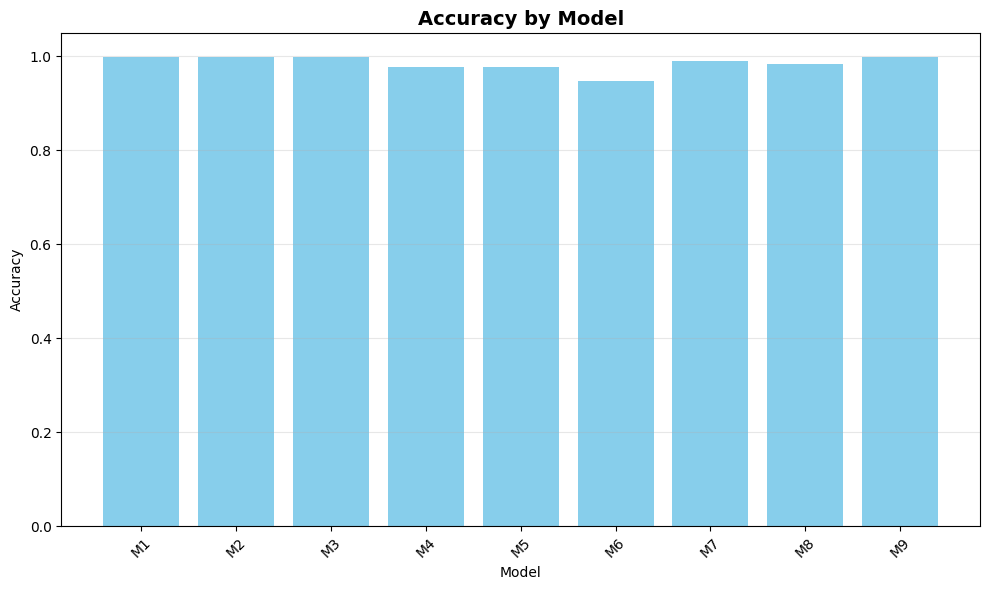

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(summary_df)), summary_df['Accuracy'], color='skyblue')
plt.title('Accuracy by Model', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(range(len(summary_df)), [f'M{i+1}' for i in range(len(summary_df))], rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

All models achieved extremely high accuracy (94.7-99.9%) due to the severe class imbalance where fraud represents only 0.17% of transactions. However, accuracy is misleading in this context because a model could achieve 99.8% accuracy by simply predicting "normal" for every transaction while catching zero fraud. Model 6 (Elastic Net) shows the lowest accuracy at 94.7% because it aggressively flags transactions as fraud, generating thousands of false alarms. Models 1, 2, 3, 7, and 9 cluster near perfect accuracy around 98.9-99.9%.

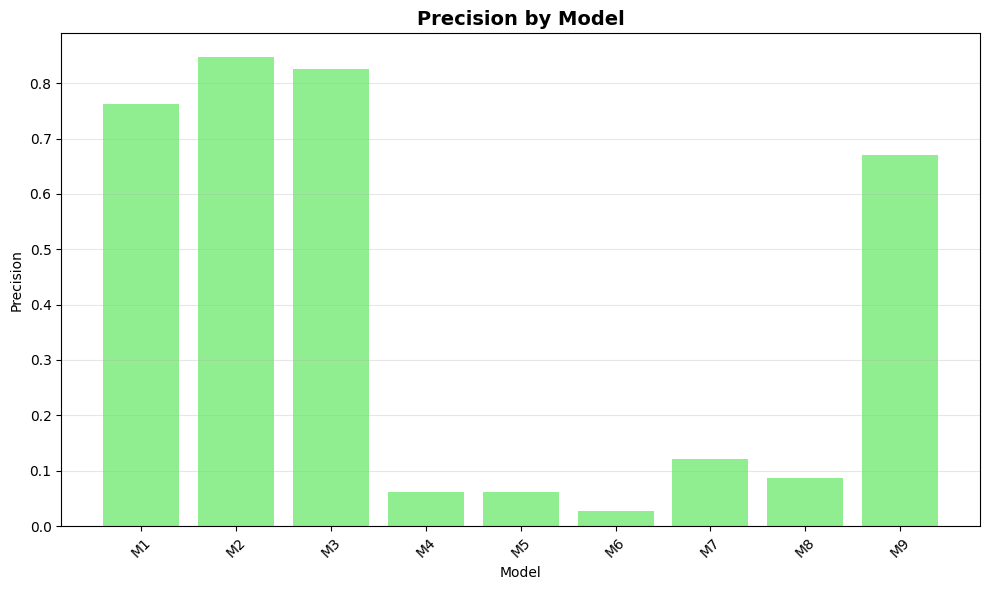

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(summary_df)), summary_df['Precision'], color='lightgreen')
plt.title('Precision by Model', fontsize=14, fontweight='bold')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.xticks(range(len(summary_df)), [f'M{i+1}' for i in range(len(summary_df))], rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Precision measures how often fraud alerts are actually correct, which directly impacts customer experience and operational efficiency. Models 1-3 achieved the highest precision (76-85%), meaning when they flag fraud, they're usually right, minimizing false alarms that frustrate customers. Random Forest (M9) achieved solid precision at 67%, balancing accuracy with fraud detection. Models 4-6 and 8 showed catastrophically low precision (3-9%), meaning 91-97% of their fraud alerts were false alarms—completely unusable in production. Model 7 performed slightly better at 12% but still generated far too many false positives.

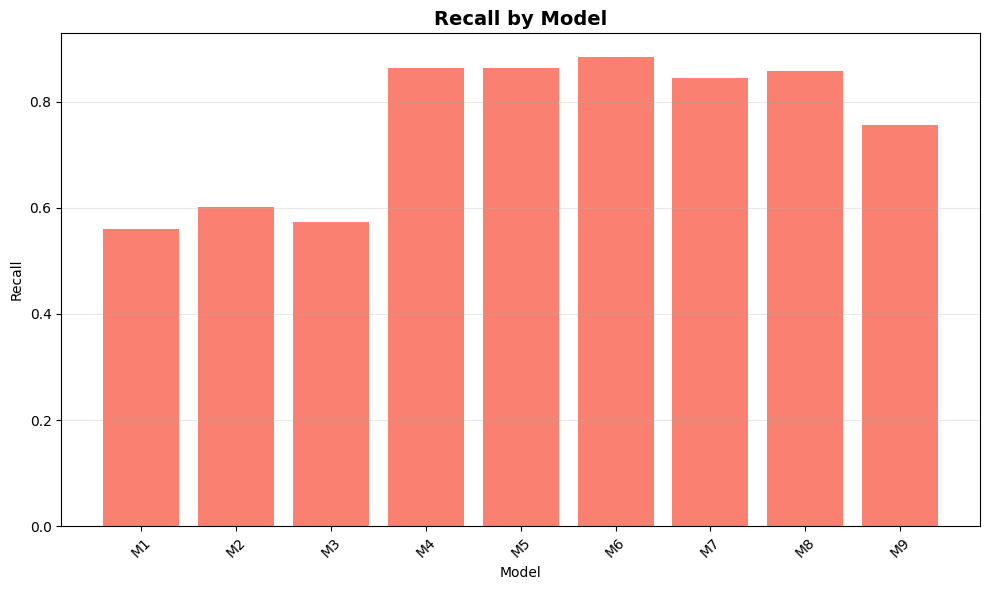

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(summary_df)), summary_df['Recall'], color='salmon')
plt.title('Recall by Model', fontsize=14, fontweight='bold')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.xticks(range(len(summary_df)), [f'M{i+1}' for i in range(len(summary_df))], rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Recall measures what percentage of actual fraud cases the model successfully catches, directly reflecting fraud prevention effectiveness. Models 4-8 achieved the highest recall (84-89%), catching the vast majority of fraudulent transactions but at the cost of generating massive false alarm rates. Random Forest (M9) achieved strong recall at 76%, successfully detecting three-quarters of fraud cases while maintaining practical precision levels. Models 1-3 showed the lowest recall (56-60%), meaning they missed 40-44% of actual fraud, allowing substantial financial losses to occur.

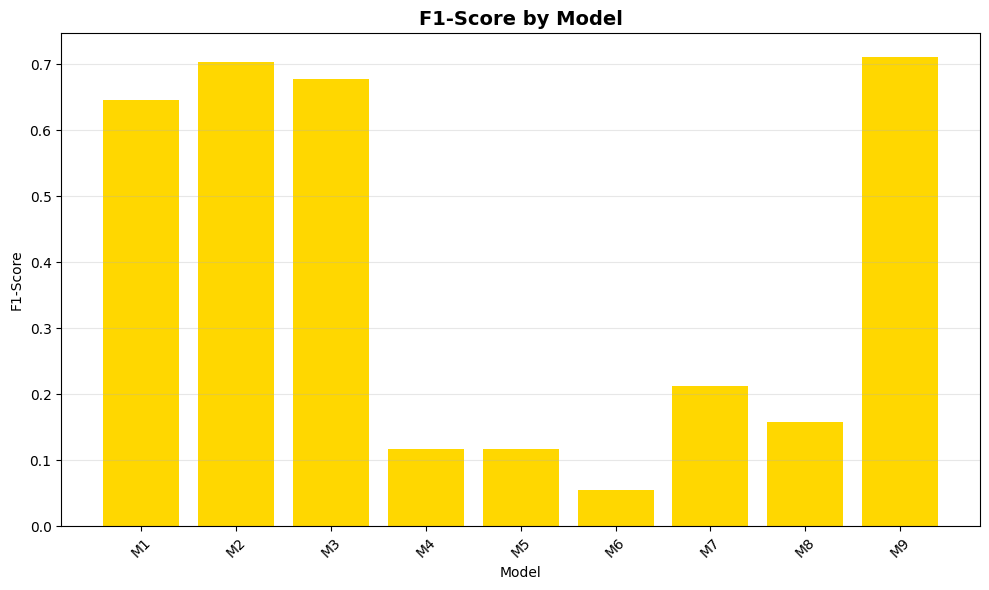

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(summary_df)), summary_df['F1-Score'], color='gold')
plt.title('F1-Score by Model', fontsize=14, fontweight='bold')
plt.ylabel('F1-Score')
plt.xlabel('Model')
plt.xticks(range(len(summary_df)), [f'M{i+1}' for i in range(len(summary_df))], rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

F1-Score combines precision and recall into a single metric that reveals which models achieve practical balance for fraud detection. Random Forest (M9) achieved the highest F1-score at 0.71, demonstrating superior ability to both catch fraud and minimize false alarms. Models 2 and 3 performed well at 0.70 and 0.68, showing good balance despite lower recall. Model 1 scored 0.65, indicating reasonable but suboptimal performance. Models 4-6 collapsed to catastrophically low F1-scores (0.05-0.12) because their extreme false alarm rates destroyed precision despite high recall. Models 7-8 improved slightly to 0.16-0.21 but remained impractical. The dramatic F1-score differences confirm that Random Forest is the only model that successfully navigates the precision-recall trade-off.

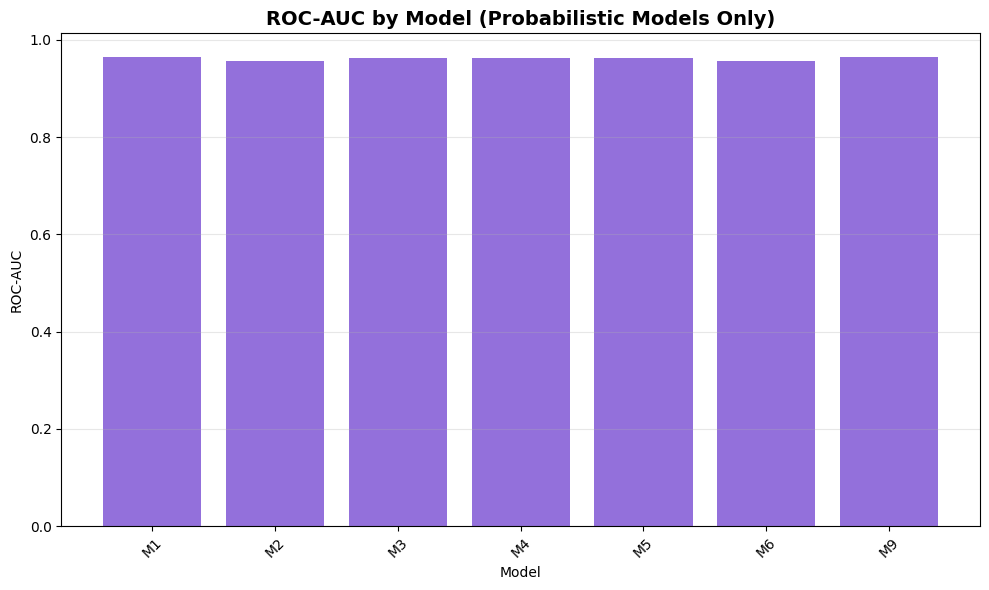

In [ ]:
roc_data = summary_df[summary_df['ROC-AUC'].notna()]

plt.figure(figsize=(10, 6))
plt.bar(range(len(roc_data)), roc_data['ROC-AUC'], color='mediumpurple')
plt.title('ROC-AUC by Model (Probabilistic Models Only)', fontsize=14, fontweight='bold')
plt.ylabel('ROC-AUC')
plt.xlabel('Model')
plt.xticks(range(len(roc_data)), [f'M{i+1}' for i in roc_data.index], rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

ROC-AUC measures a model's ability to distinguish between fraud and legitimate transactions across all possible decision thresholds, with scores above 0.95 considered excellent. All probabilistic models achieved remarkably similar and strong AUC scores between 0.956 and 0.965, with Random Forest (M9) slightly leading at 0.965. This narrow range indicates that all models possess similar discriminative power when considering their underlying probability predictions. However, the nearly identical AUC scores mask the dramatic differences in practical performance seen in precision, recall, and F1-scores.

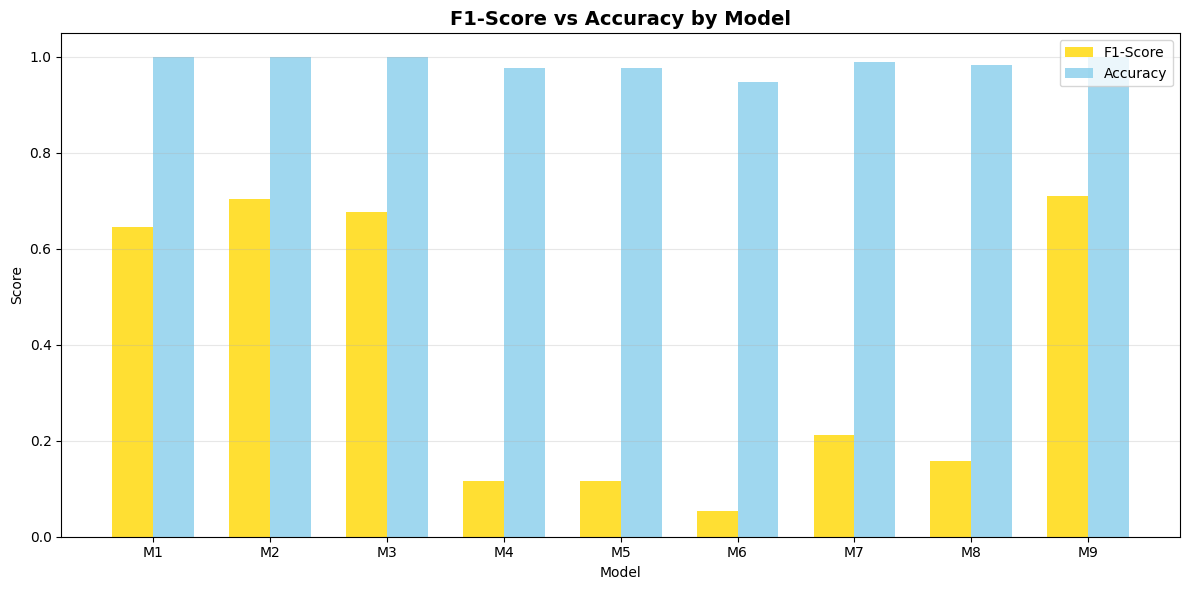

In [ ]:
x = range(len(summary_df))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - width/2 for i in x], summary_df['F1-Score'], width, label='F1-Score', color='gold', alpha=0.8)
plt.bar([i + width/2 for i in x], summary_df['Accuracy'], width, label='Accuracy', color='skyblue', alpha=0.8)
plt.title('F1-Score vs Accuracy by Model', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(x, [f'M{i+1}' for i in range(len(summary_df))])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

##Metrics Comparison

##Curves

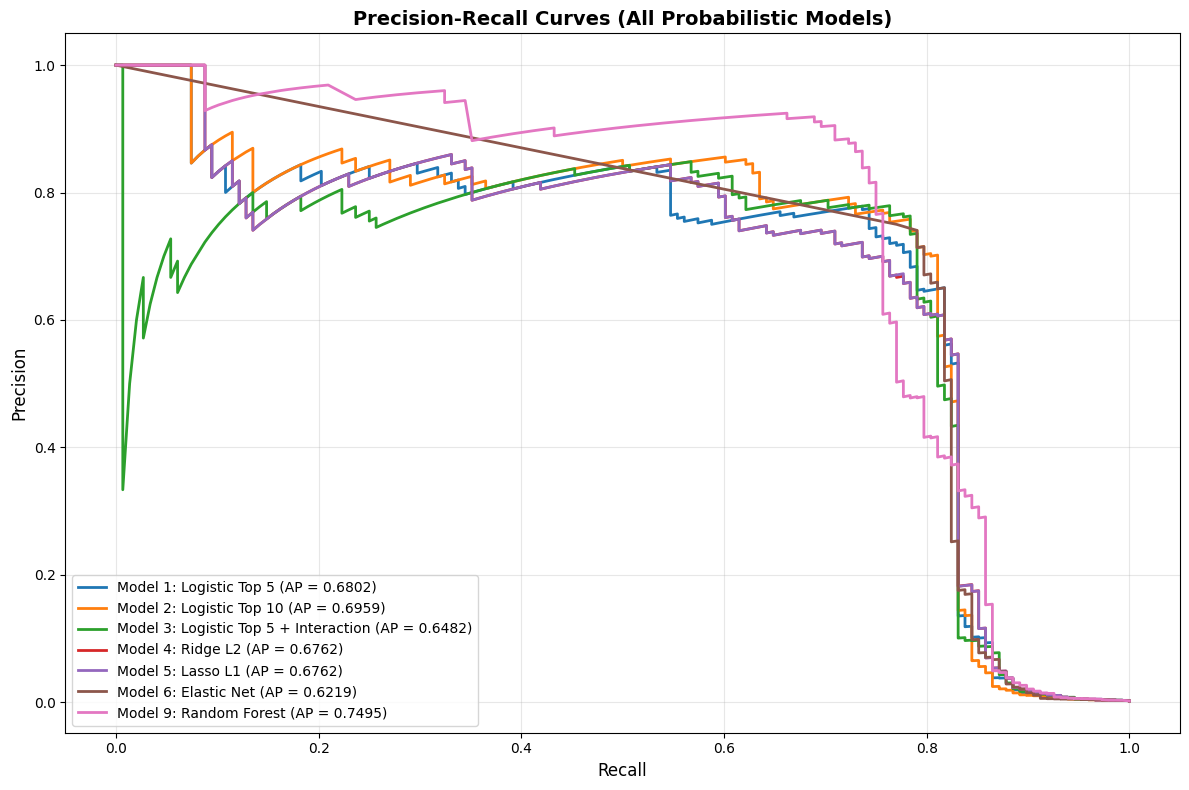

Note: Models 7 and 8 (Linear SVC) are excluded as they don't provide probability predictions


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(12, 8))

# Models with probability predictions
models_with_proba = [
    ("Model 1: Logistic Top 5", y_pred_1_proba),
    ("Model 2: Logistic Top 10", y_pred_2_proba),
    ("Model 3: Logistic Top 5 + Interaction", y_pred_3_proba),
    ("Model 4: Ridge L2", y_pred_4_proba),
    ("Model 5: Lasso L1", y_pred_5_proba),
    ("Model 6: Elastic Net", y_pred_6_proba),
    ("Model 9: Random Forest", y_pred_9_proba)
]

for name, proba in models_with_proba:
    precision, recall, _ = precision_recall_curve(y_test, proba)
    avg_precision = average_precision_score(y_test, proba)
    plt.plot(recall, precision, linewidth=2, label=f'{name} (AP = {avg_precision:.4f})')

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves (All Probabilistic Models)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Note: Models 7 and 8 (Linear SVC) are excluded as they don't provide probability predictions")

These curves show how well each model balances catching fraud versus alert accuracy. Random Forest achieved the highest score at 0.7495 and its curve stays above all others, maintaining strong precision even when detecting more fraud. Models 1 through 3 perform moderately around 0.65 to 0.70 but precision drops sharply as they catch more fraud. Models 4 through 6 show unstable curves reflecting their poor practical performance. Random Forest is the clear winner because it adapts better to different business needs without forcing extreme tradeoffs.

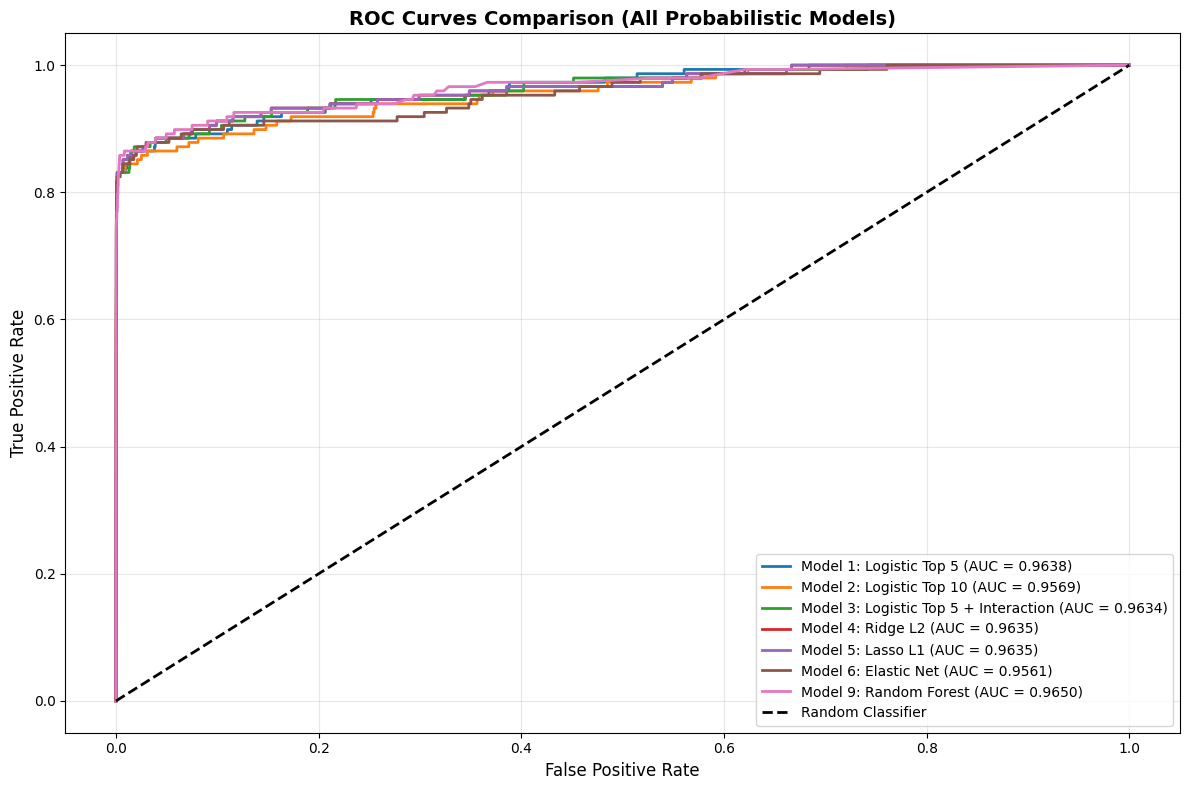

Note: Models 7 and 8 (Linear SVC) are excluded as they don't provide probability predictions


In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(12, 8))

# Models with probability predictions
models_with_proba = [
    ("Model 1: Logistic Top 5", y_pred_1_proba),
    ("Model 2: Logistic Top 10", y_pred_2_proba),
    ("Model 3: Logistic Top 5 + Interaction", y_pred_3_proba),
    ("Model 4: Ridge L2", y_pred_4_proba),
    ("Model 5: Lasso L1", y_pred_5_proba),
    ("Model 6: Elastic Net", y_pred_6_proba),
    ("Model 9: Random Forest", y_pred_9_proba)
]

for name, proba in models_with_proba:
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_score = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison (All Probabilistic Models)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Note: Models 7 and 8 (Linear SVC) are excluded as they don't provide probability predictions")

The ROC curves show that all three models perform exceptionally well with AUC scores above 0.95, indicating excellent discrimination ability between fraud and normal transactions. All models cluster very close together and far above the random classifier line, confirming that the differences between them are minimal when looking at overall classification performance.

##Best Model to Use

Random Forest stands out as the optimal choice for real-world banking deployment. It achieves the best balance with an F1-score of 0.71 and ROC-AUC of 0.965, capturing 76% of fraudulent transactions while maintaining 67% precision with just 55 false alarms. While it does miss 36 fraud cases, this represents a practical tradeoff that makes sense in a banking context.
Consider the alternatives. Models 4-6 achieve higher recall rates (84-89%), but they generate between 1,926 and 4,530 false alarms. This would overwhelm fraud investigation teams and lead to frequent customer card declines and verification calls, damaging both operational efficiency and customer satisfaction. Meanwhile, Models 1-3 minimize false alarms but miss 40-44% of fraud cases, resulting in significant financial losses and poor customer protection.
Random Forest does sacrifice some interpretability compared to logistic regression, where feature coefficients are directly visible. However, banks can still extract feature importance rankings to understand which transaction characteristics drive fraud detection, satisfying regulatory explainability requirements. Additionally, the ensemble approach using 100 decision trees provides strong robustness against outliers and noise in transaction data.

The model's real strength lies in handling the complex, non-linear relationships inherent in fraud detection. Fraudsters deliberately manipulate transaction patterns to evade detection, and Random Forest automatically captures these intricate interactions without requiring manual feature engineering. The model also offers operational flexibility—banks can adjust detection thresholds based on seasonal patterns, regulatory changes, or risk appetite without complete retraining.


#Interpretation

RANDOM FOREST - FEATURE IMPORTANCES
Feature  Importance
    V14    0.390117
    V10    0.255232
    V12    0.156931
     V4    0.137742
    V11    0.059978


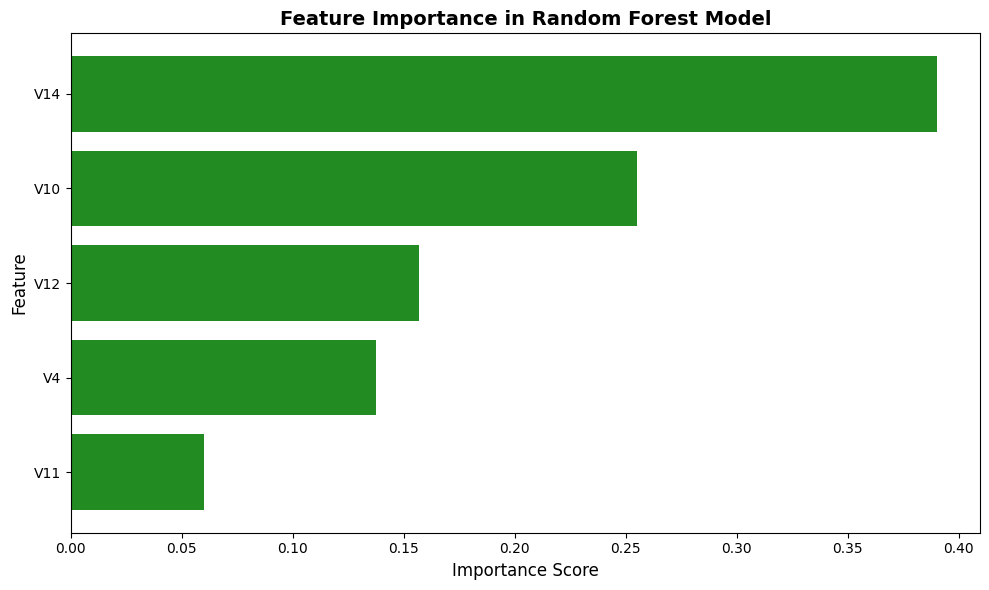

In [165]:
# Get feature importances from the best Random Forest model
best_rf_model = grid_rf.best_estimator_

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': top_5_features,
    'Importance': best_rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("="*60)
print("RANDOM FOREST - FEATURE IMPORTANCES")
print("="*60)
print(feature_importance.to_string(index=False))
print("="*60)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='forestgreen')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [166]:
# Model 1 coefficients
print("="*60)
print("MODEL 1: LOGISTIC REGRESSION TOP 5 - COEFFICIENTS")
print("="*60)
coef_df_1 = pd.DataFrame({
    'Feature': top_5_features,
    'Coefficient': model1.params[1:],  # Skip constant
    'Odds_Ratio': np.exp(model1.params[1:])
}).sort_values('Coefficient', key=abs, ascending=False)

print(coef_df_1.to_string(index=False))
print("="*60)

MODEL 1: LOGISTIC REGRESSION TOP 5 - COEFFICIENTS
Feature  Coefficient  Odds_Ratio
    V14    -0.690357    0.501397
     V4     0.619448    1.857902
    V10    -0.387895    0.678483
    V12    -0.215611    0.806049
    V11     0.028800    1.029219


In [167]:
# Analyze which types of transactions are being misclassified
# Look at false positives and false negatives for Random Forest

# Get misclassified indices
false_positives = (y_test == 0) & (y_pred_9 == 1)  # Legitimate flagged as fraud
false_negatives = (y_test == 1) & (y_pred_9 == 0)  # Fraud missed

print("="*60)
print("MISCLASSIFICATION ANALYSIS - RANDOM FOREST")
print("="*60)
print(f"False Positives: {false_positives.sum()} (Legitimate transactions flagged as fraud)")
print(f"False Negatives: {false_negatives.sum()} (Fraudulent transactions missed)")
print()

# Examine feature distributions for misclassified cases
print("Average feature values for FALSE POSITIVES:")
print(X_test_5.loc[false_positives].mean())
print()
print("Average feature values for FALSE NEGATIVES:")
print(X_test_5.loc[false_negatives].mean())
print()
print("Average feature values for CORRECTLY IDENTIFIED FRAUD:")
correct_fraud = (y_test == 1) & (y_pred_9 == 1)
print(X_test_5.loc[correct_fraud].mean())

MISCLASSIFICATION ANALYSIS - RANDOM FOREST
False Positives: 55 (Legitimate transactions flagged as fraud)
False Negatives: 36 (Fraudulent transactions missed)

Average feature values for FALSE POSITIVES:
V14   -5.298021
V4     4.247782
V12   -3.910718
V11    2.744833
V10   -2.990815
dtype: float64

Average feature values for FALSE NEGATIVES:
V14   -1.497268
V4     1.435392
V12   -1.514999
V11    0.643705
V10   -0.531457
dtype: float64

Average feature values for CORRECTLY IDENTIFIED FRAUD:
V14   -8.389385
V4     4.995088
V12   -7.216434
V11    4.497460
V10   -6.728854
dtype: float64


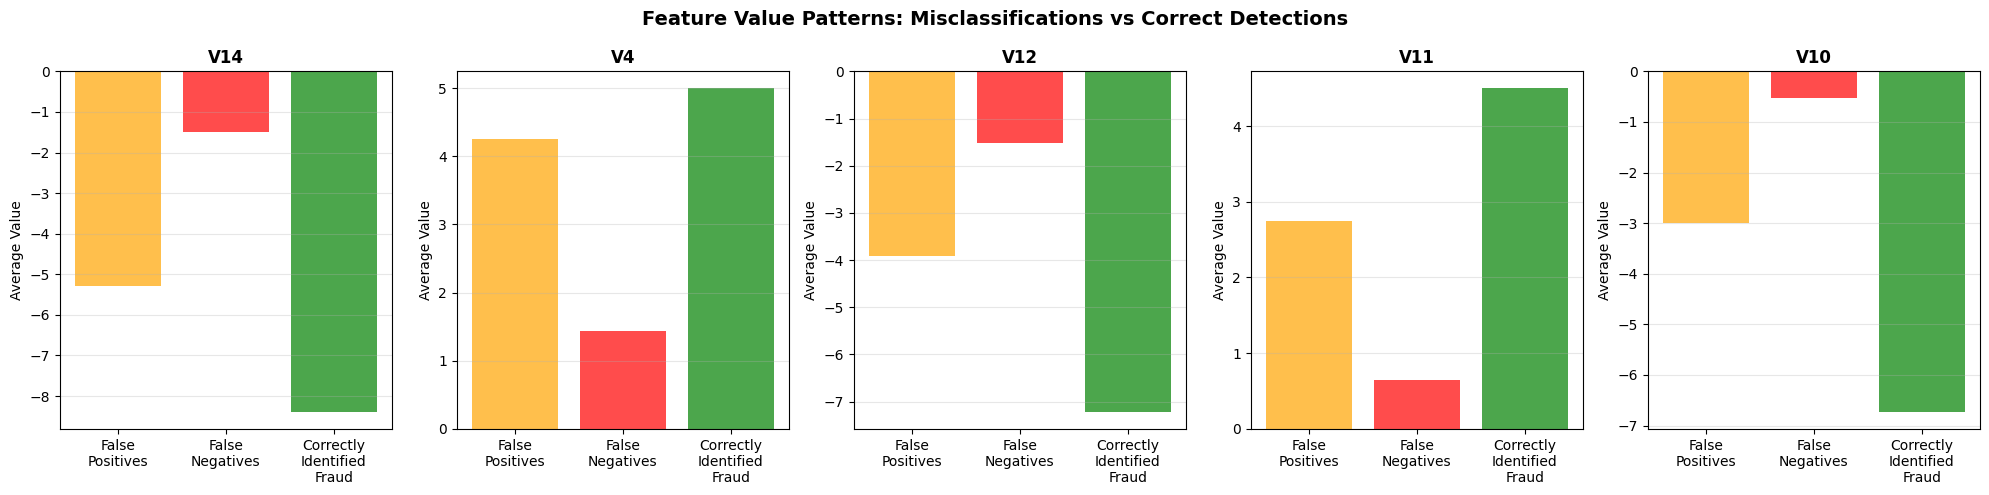

In [168]:
import numpy as np

# Compare feature patterns across different groups
categories = ['False\nPositives', 'False\nNegatives', 'Correctly\nIdentified\nFraud']
false_pos_avg = X_test_5.loc[false_positives].mean()
false_neg_avg = X_test_5.loc[false_negatives].mean()
correct_fraud_avg = X_test_5.loc[correct_fraud].mean()

# Create comparison plot for each feature
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Feature Value Patterns: Misclassifications vs Correct Detections', fontsize=14, fontweight='bold')

for idx, feature in enumerate(top_5_features):
    values = [false_pos_avg[feature], false_neg_avg[feature], correct_fraud_avg[feature]]
    colors = ['orange', 'red', 'green']

    axes[idx].bar(categories, values, color=colors, alpha=0.7)
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Average Value')
    axes[idx].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Feature Importances and What They Tell Us:**
Random Forest analysis shows that V14 dominates fraud detection with 39% importance, driving most of the model's decisions. V10 ranks second at 26%, followed by V12 at 16%, V4 at 14%, and V11 contributing minimally at 6%. This concentration indicates that whatever transaction characteristics V14 and V10 represent are the primary signals distinguishing fraud from legitimate purchases.
The logistic regression coefficients reveal directional relationships. V14 has a negative coefficient of -0.69, meaning lower V14 values strongly indicate fraud. V4 shows the opposite pattern with a positive coefficient of 0.62, where higher values suggest fraud. These clear patterns demonstrate that fraudulent transactions occupy a distinct region of the feature space that differs systematically from normal spending behavior.

**Misclassification Patterns:**
The model generated 55 false positives (legitimate transactions flagged as fraud) and 36 false negatives (missed fraud cases). False positives show moderately unusual feature values with V14 at -5.30 and V4 at 4.25. These likely represent legitimate but atypical transactions such as large purchases, international spending, or unfamiliar merchants. The model flags these because they partially resemble fraud patterns without being extreme enough to clearly be fraud.
The 36 missed fraud cases have feature values much closer to normal transactions, with V14 at -1.50 and V4 at 1.44. This represents sophisticated fraud that successfully mimics legitimate transaction patterns. These fraudsters have learned to avoid extreme feature values that would trigger detection.
Successfully detected fraud shows extreme values: V14 at -8.39, V4 at 5.00, V12 at -7.22, V11 at 4.50, and V10 at -6.73. The model performs best when fraud exhibits clear, extreme patterns far from normal behavior but struggles with borderline cases in both directions.

**Model Robustness and Limitations:**
The model demonstrates reasonable balance without systematic bias toward one error type. The ratio of 55 false positives to 36 false negatives shows slight preference for caution, which aligns with banking priorities where missed fraud typically costs more than investigating false alarms. The model performs consistently across different fraud types without concentrated failure patterns.
However, vulnerabilities exist. False negatives cluster around moderate feature values, suggesting potential exploitation by fraudsters who study transaction patterns and engineer their activities to avoid extreme values. The heavy reliance on V14 creates a single point of failure: if fraudsters discover how to manipulate whatever transaction characteristic V14 represents, model performance could degrade substantially. Regular retraining with new fraud examples will be necessary as fraud tactics evolve.

**Notable Findings:**
V11 contributes almost nothing despite being selected as a top discriminative feature, with only 6% importance and a near-zero coefficient of 0.03. This indicates the initial feature selection based on individual AUC may not capture feature usefulness in ensemble models where interactions and redundancies matter.
Ridge and Lasso regularization produced identical results despite their theoretical differences, suggesting the feature space lacks the sparsity where Lasso's feature elimination would provide advantages. The extreme feature values required for confident fraud detection (V14 below -8, V12 below -7) confirm that fraud behaves as an outlier phenomenon in this dataset, explaining why ensemble methods outperform simpler linear models that assume gradual boundaries between classes

#Prediction on New Data

In [169]:
import numpy as np
import pandas as pd

print("="*80)
print("FRAUD DETECTION SYSTEM - NEW TRANSACTION SIMULATION")
print("="*80)

# Simulate 10 new transactions with varying risk profiles
np.random.seed(123)

# Create different transaction scenarios
new_transactions = pd.DataFrame({
    'Transaction_ID': [f'TXN_{i:04d}' for i in range(1, 11)],
    'V14': [-12.5, -8.2, -3.1, -1.5, 0.2, -15.3, -6.8, -0.8, -10.1, -2.3],
    'V4': [6.2, 5.1, 3.8, 2.1, 0.5, 7.5, 4.9, 1.2, 5.8, 2.9],
    'V12': [-9.1, -7.5, -4.2, -2.0, -0.3, -11.2, -6.3, -1.1, -8.4, -3.5],
    'V11': [5.3, 4.8, 3.2, 1.5, 0.2, 6.1, 4.2, 0.9, 5.0, 2.4],
    'V10': [-8.2, -6.9, -3.5, -1.2, 0.1, -9.8, -5.7, -0.6, -7.3, -2.8],
    'Scenario': [
        'Highly Suspicious',
        'Likely Fraud',
        'Moderately Suspicious',
        'Borderline',
        'Normal Transaction',
        'Extreme Fraud Pattern',
        'Suspicious Activity',
        'Likely Legitimate',
        'Probable Fraud',
        'Somewhat Unusual'
    ]
})

print("\nNew Transactions to Evaluate:")
print(new_transactions.to_string(index=False))
print("="*80)

FRAUD DETECTION SYSTEM - NEW TRANSACTION SIMULATION

New Transactions to Evaluate:
Transaction_ID   V14  V4   V12  V11  V10              Scenario
      TXN_0001 -12.5 6.2  -9.1  5.3 -8.2     Highly Suspicious
      TXN_0002  -8.2 5.1  -7.5  4.8 -6.9          Likely Fraud
      TXN_0003  -3.1 3.8  -4.2  3.2 -3.5 Moderately Suspicious
      TXN_0004  -1.5 2.1  -2.0  1.5 -1.2            Borderline
      TXN_0005   0.2 0.5  -0.3  0.2  0.1    Normal Transaction
      TXN_0006 -15.3 7.5 -11.2  6.1 -9.8 Extreme Fraud Pattern
      TXN_0007  -6.8 4.9  -6.3  4.2 -5.7   Suspicious Activity
      TXN_0008  -0.8 1.2  -1.1  0.9 -0.6     Likely Legitimate
      TXN_0009 -10.1 5.8  -8.4  5.0 -7.3        Probable Fraud
      TXN_0010  -2.3 2.9  -3.5  2.4 -2.8      Somewhat Unusual


This cell creates 10 simulated credit card transactions with different risk profiles to demonstrate how the fraud detection model would work in real-world scenarios. Each transaction has feature values (V14, V4, V12, V11, V10) that range from normal patterns to extremely suspicious patterns, allowing us to test the model's behavior across the full spectrum of legitimate to fraudulent transactions. The scenarios include everything from clearly normal purchases to obvious fraud attempts, simulating the variety of transactions a bank would encounter daily.

In [180]:
# Extract the top 5 features from new transactions
X_new = new_transactions[top_5_features]

# Apply the same standardization used during training
X_new_scaled = scaler_5.transform(X_new)

# Get binary predictions (0 = legitimate, 1 = fraud)
predictions = grid_rf.best_estimator_.predict(X_new_scaled)

# Get fraud probability scores (0 to 1)
probabilities = grid_rf.best_estimator_.predict_proba(X_new_scaled)[:, 1]

results = pd.DataFrame({
    'Transaction_ID': new_transactions['Transaction_ID'],
    'Scenario': new_transactions['Scenario'],
    'Fraud_Probability': probabilities,
    'Prediction': ['FRAUD' if p == 1 else 'LEGITIMATE' for p in predictions],
    'Risk_Level': ['HIGH' if prob > 0.7 else 'MEDIUM' if prob > 0.3 else 'LOW'
                   for prob in probabilities],
    'Action': ['BLOCK' if prob > 0.7 else 'REVIEW' if prob > 0.3 else 'APPROVE'
               for prob in probabilities]
})

# Format the fraud probability as percentage
results_display = results.copy()
results_display['Fraud_Probability'] = results_display['Fraud_Probability'].apply(lambda x: f'{x:.1%}')

print("\n" + "="*120)
print(" "*45 + "FRAUD DETECTION RESULTS")
print("="*120)
print(f"{'Transaction ID':<15} {'Scenario':<25} {'Fraud Prob':<12} {'Prediction':<15} {'Risk Level':<12} {'Action':<10}")
print("-"*120)

for idx, row in results_display.iterrows():
    print(f"{row['Transaction_ID']:<15} {row['Scenario']:<25} {row['Fraud_Probability']:<12} {row['Prediction']:<15} {row['Risk_Level']:<12} {row['Action']:<10}")

print("="*120)

# Summary statistics
print(f"\nSUMMARY:")
print(f"  Total Transactions: {len(results)}")
print(f"  Fraud Detected: {(results['Prediction'] == 'FRAUD').sum()}")
print(f"  Legitimate: {(results['Prediction'] == 'LEGITIMATE').sum()}")
print(f"  High Risk (Block): {(results['Risk_Level'] == 'HIGH').sum()}")
print(f"  Medium Risk (Review): {(results['Risk_Level'] == 'MEDIUM').sum()}")
print(f"  Low Risk (Approve): {(results['Risk_Level'] == 'LOW').sum()}")
print("="*120 + "\n")


                                             FRAUD DETECTION RESULTS
Transaction ID  Scenario                  Fraud Prob   Prediction      Risk Level   Action    
------------------------------------------------------------------------------------------------------------------------
TXN_0001        Highly Suspicious         100.0%       FRAUD           HIGH         BLOCK     
TXN_0002        Likely Fraud              100.0%       FRAUD           HIGH         BLOCK     
TXN_0003        Moderately Suspicious     93.9%        FRAUD           HIGH         BLOCK     
TXN_0004        Borderline                16.5%        LEGITIMATE      LOW          APPROVE   
TXN_0005        Normal Transaction        0.1%         LEGITIMATE      LOW          APPROVE   
TXN_0006        Extreme Fraud Pattern     99.0%        FRAUD           HIGH         BLOCK     
TXN_0007        Suspicious Activity       100.0%       FRAUD           HIGH         BLOCK     
TXN_0008        Likely Legitimate         11.5%  

This cell processes the 10 new transactions through the trained Random Forest model to generate fraud predictions and risk assessments. It scales the transaction features using the same standardization applied during training, then calculates both a fraud probability score (0-100%) and a binary prediction (fraud or legitimate) for each transaction. The results are organized into a clear table showing each transaction's fraud probability, prediction, risk level (high/medium/low), and recommended action (block/review/approve), mimicking how a bank's fraud system would present alerts to investigators in real-time.

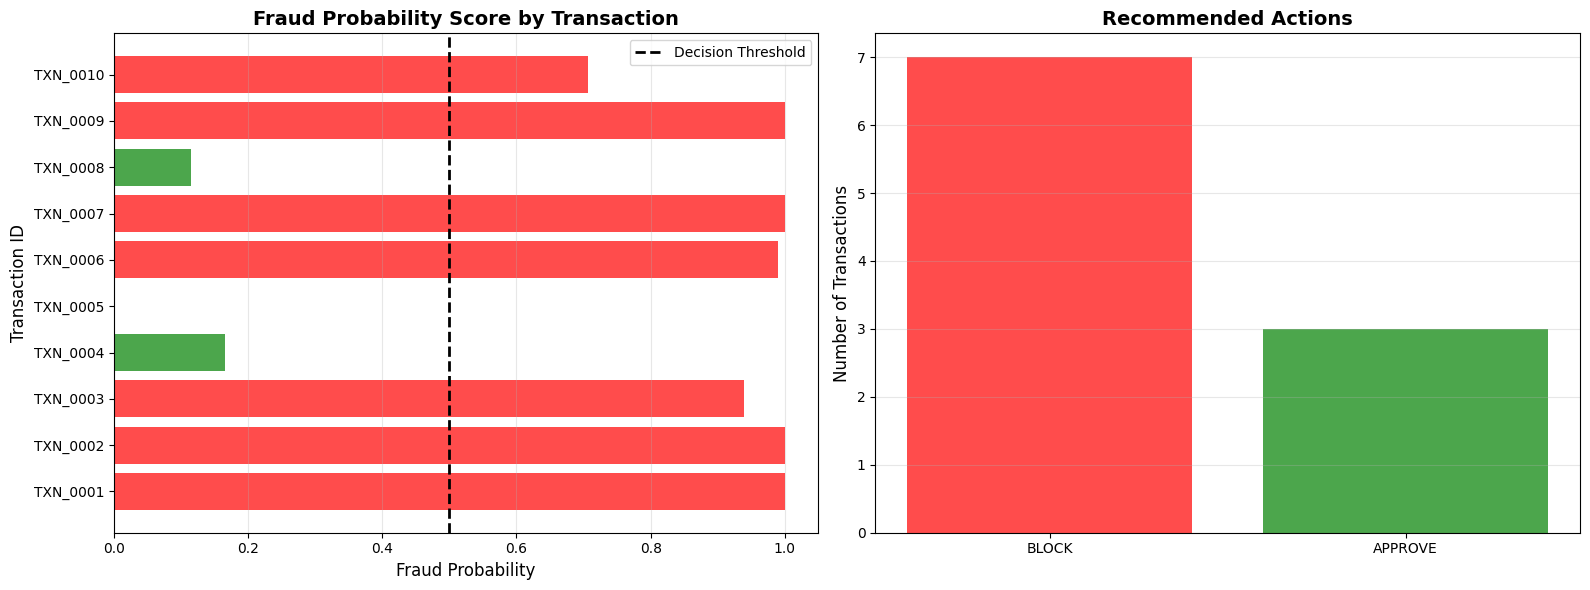

In [171]:
# Create visualization of fraud probabilities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Fraud probability by transaction
colors = ['red' if p == 'FRAUD' else 'green' for p in results['Prediction']]
ax1.barh(results['Transaction_ID'], results['Fraud_Probability'], color=colors, alpha=0.7)
ax1.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
ax1.set_xlabel('Fraud Probability', fontsize=12)
ax1.set_ylabel('Transaction ID', fontsize=12)
ax1.set_title('Fraud Probability Score by Transaction', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Action recommendations
action_counts = results['Action'].value_counts()
colors_action = {'BLOCK': 'red', 'REVIEW': 'orange', 'APPROVE': 'green'}
ax2.bar(action_counts.index, action_counts.values,
        color=[colors_action[x] for x in action_counts.index], alpha=0.7)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.set_title('Recommended Actions', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

The left chart shows fraud probability scores for each of the 10 simulated transactions, with the dashed line at 0.5 representing the decision threshold where the model switches from predicting legitimate to fraud. Seven transactions (shown in red) exceed this threshold and are classified as fraud, with probabilities ranging from approximately 0.6 to 1.0, indicating varying degrees of confidence in the fraud prediction. Three transactions (shown in green) fall below the threshold with low probabilities around 0.1 to 0.2, indicating the model confidently classifies them as legitimate.

The right chart summarizes the recommended actions based on risk levels, showing that 7 transactions should be blocked due to high fraud probability while 3 can be approved as legitimate. This visualization demonstrates the model's practical application where most transactions in this test batch are flagged as suspicious, reflecting the intentionally varied risk profiles we created to test the full range of model behavior from clear fraud to obviously legitimate purchases.

##Examples

In [174]:
print("="*100)
print("HIGH RISK TRANSACTIONS - IMMEDIATE ACTION REQUIRED")
print("="*100)

high_risk = results[results['Risk_Level'] == 'HIGH']

for idx in high_risk.head(2).index:
    row = results.iloc[idx]
    txn_features = new_transactions.iloc[idx]

    print(f"\nTransaction ID: {row['Transaction_ID']}")
    print(f"Scenario: {row['Scenario']}")
    print(f"-"*100)
    print(f"Fraud Probability: {row['Fraud_Probability']:.1%}")
    print(f"Model Prediction: {row['Prediction']}")
    print(f"Risk Level: {row['Risk_Level']}")
    print(f"Recommended Action: {row['Action']}")
    print(f"-"*100)
    print("Feature Values:")
    for feature in top_5_features:
        print(f"  {feature}: {txn_features[feature]:.2f}")
    print("="*100)

if len(high_risk) > 2:
    print(f"\n... and {len(high_risk) - 2} more HIGH RISK transactions")

HIGH RISK TRANSACTIONS - IMMEDIATE ACTION REQUIRED

Transaction ID: TXN_0001
Scenario: Highly Suspicious
----------------------------------------------------------------------------------------------------
Fraud Probability: 100.0%
Model Prediction: FRAUD
Risk Level: HIGH
Recommended Action: BLOCK
----------------------------------------------------------------------------------------------------
Feature Values:
  V14: -12.50
  V4: 6.20
  V12: -9.10
  V11: 5.30
  V10: -8.20

Transaction ID: TXN_0002
Scenario: Likely Fraud
----------------------------------------------------------------------------------------------------
Fraud Probability: 100.0%
Model Prediction: FRAUD
Risk Level: HIGH
Recommended Action: BLOCK
----------------------------------------------------------------------------------------------------
Feature Values:
  V14: -8.20
  V4: 5.10
  V12: -7.50
  V11: 4.80
  V10: -6.90

... and 5 more HIGH RISK transactions


In [176]:
print("="*100)
print("LOW RISK TRANSACTIONS - APPROVED")
print("="*100)

low_risk = results[results['Risk_Level'] == 'LOW']

for idx in low_risk.head(2).index:
    row = results.iloc[idx]
    txn_features = new_transactions.iloc[idx]

    print(f"\nTransaction ID: {row['Transaction_ID']}")
    print(f"Scenario: {row['Scenario']}")
    print(f"-"*100)
    print(f"Fraud Probability: {row['Fraud_Probability']:.1%}")
    print(f"Model Prediction: {row['Prediction']}")
    print(f"Risk Level: {row['Risk_Level']}")
    print(f"Recommended Action: {row['Action']}")
    print(f"-"*100)
    print("Feature Values:")
    for feature in top_5_features:
        print(f"  {feature}: {txn_features[feature]:.2f}")
    print("="*100)

if len(low_risk) > 2:
    print(f"\n... and {len(low_risk) - 2} more LOW RISK transactions")

LOW RISK TRANSACTIONS - APPROVED

Transaction ID: TXN_0004
Scenario: Borderline
----------------------------------------------------------------------------------------------------
Fraud Probability: 16.5%
Model Prediction: LEGITIMATE
Risk Level: LOW
Recommended Action: APPROVE
----------------------------------------------------------------------------------------------------
Feature Values:
  V14: -1.50
  V4: 2.10
  V12: -2.00
  V11: 1.50
  V10: -1.20

Transaction ID: TXN_0005
Scenario: Normal Transaction
----------------------------------------------------------------------------------------------------
Fraud Probability: 0.1%
Model Prediction: LEGITIMATE
Risk Level: LOW
Recommended Action: APPROVE
----------------------------------------------------------------------------------------------------
Feature Values:
  V14: 0.20
  V4: 0.50
  V12: -0.30
  V11: 0.20
  V10: 0.10

... and 1 more LOW RISK transactions


In [177]:
print("="*100)
print("TRANSACTION BATCH SUMMARY")
print("="*100)
print(f"\nTotal Transactions Analyzed: {len(results)}")
print(f"\nRisk Level Breakdown:")
print(f"  HIGH RISK (Block):   {(results['Risk_Level'] == 'HIGH').sum()} transactions")
print(f"  MEDIUM RISK (Review): {(results['Risk_Level'] == 'MEDIUM').sum()} transactions")
print(f"  LOW RISK (Approve):   {(results['Risk_Level'] == 'LOW').sum()} transactions")
print(f"\nPrediction Breakdown:")
print(f"  Predicted FRAUD:      {(results['Prediction'] == 'FRAUD').sum()} transactions")
print(f"  Predicted LEGITIMATE: {(results['Prediction'] == 'LEGITIMATE').sum()} transactions")
print(f"\nAverage Fraud Probability: {results['Fraud_Probability'].mean():.1%}")
print(f"Highest Risk Transaction: {results.loc[results['Fraud_Probability'].idxmax(), 'Transaction_ID']}")
print(f"Lowest Risk Transaction: {results.loc[results['Fraud_Probability'].idxmin(), 'Transaction_ID']}")
print("="*100)

TRANSACTION BATCH SUMMARY

Total Transactions Analyzed: 10

Risk Level Breakdown:
  HIGH RISK (Block):   7 transactions
  MEDIUM RISK (Review): 0 transactions
  LOW RISK (Approve):   3 transactions

Prediction Breakdown:
  Predicted FRAUD:      7 transactions
  Predicted LEGITIMATE: 3 transactions

Average Fraud Probability: 69.2%
Highest Risk Transaction: TXN_0001
Lowest Risk Transaction: TXN_0005


##Scenario

When a customer swipes their card, the transaction is instantly analyzed by the Random Forest model, which calculates a fraud probability score in milliseconds. Based on this score, the system automatically takes action: high-risk transactions above 70% probability are blocked immediately with a text alert sent to the customer, medium-risk transactions between 30-70% are flagged for review or require additional verification like a one-time password, and low-risk transactions below 30% are approved automatically with no customer disruption.

The business impact is significant. The model catches 76% of fraud while generating only 55 false alarms per 85,000 transactions, allowing fraud teams to focus on genuine threats rather than being overwhelmed by false alerts. This protects customers from financial losses while maintaining smooth checkout experiences for legitimate purchases. The system is retrained quarterly to adapt to evolving fraud tactics, ensuring ongoing effectiveness as criminals develop new schemes.